<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
# Time series seasonal - exercises

--- 

In [1]:
# this will filter out a lot of future warnings from statsmodels
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import seaborn as sns
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The following dataset contains seasonally non-adjusted quarterly data on income and consumption in the UK.

In [5]:
df = pd.read_csv('IncomeUK.csv')

In [6]:
df.head()

income  consumption
0    9014         8016
1    9659         8798
2    9848         9184
3   10316         9755
4   10254         9113

In [7]:
df.consumption.describe()

count       58.000000
mean     26772.862069
std      13927.303000
min       8016.000000
25%      13798.250000
50%      23904.500000
75%      38955.250000
max      52063.000000
Name: consumption, dtype: float64

### 0. The values represent quarterly data from 01/01/1971 to 30/06/1985.

Create the corresponding datetime index.

In [8]:
df['date'] = pd.date_range(start='1971-01-01',end='1985-06-30',freq='Q')
df.set_index('date', inplace=True, drop=True)

df.head()

income  consumption
date                           
1971-03-31    9014         8016
1971-06-30    9659         8798
1971-09-30    9848         9184
1971-12-31   10316         9755
1972-03-31   10254         9113

### 1. Plot the time series for consumption.

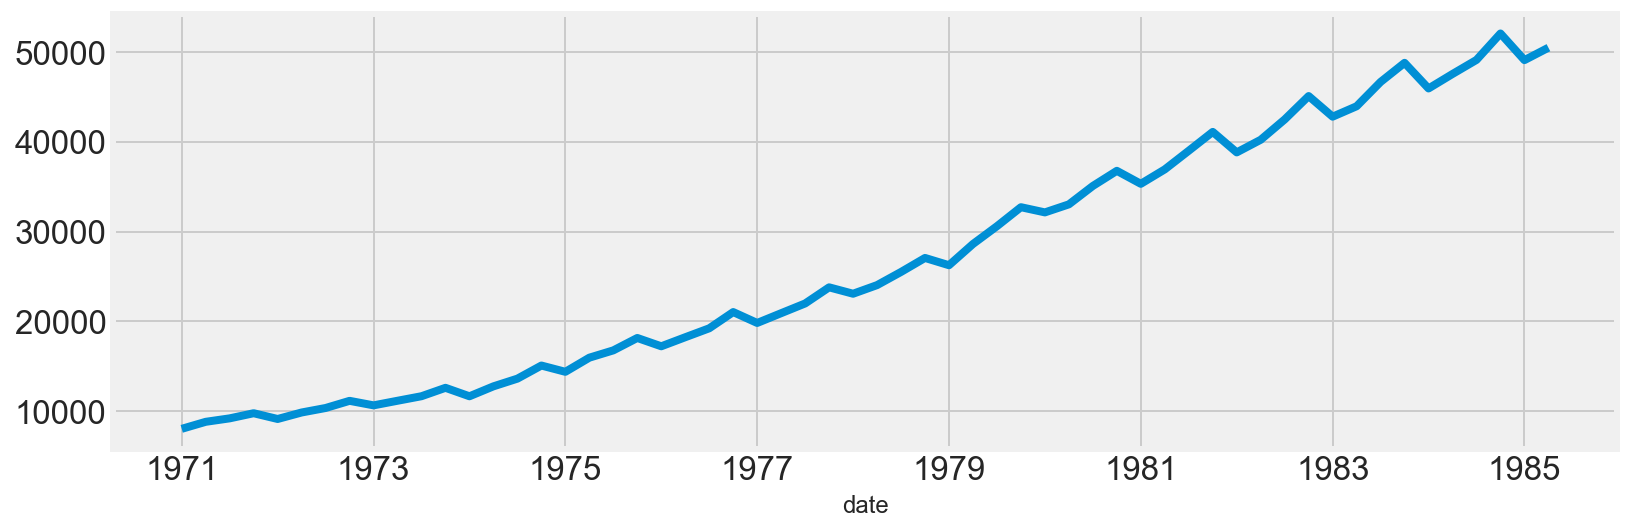

In [9]:
df.consumption.plot(figsize=(12,4))
plt.show()

### 2. Which order of differencing would you recommend?

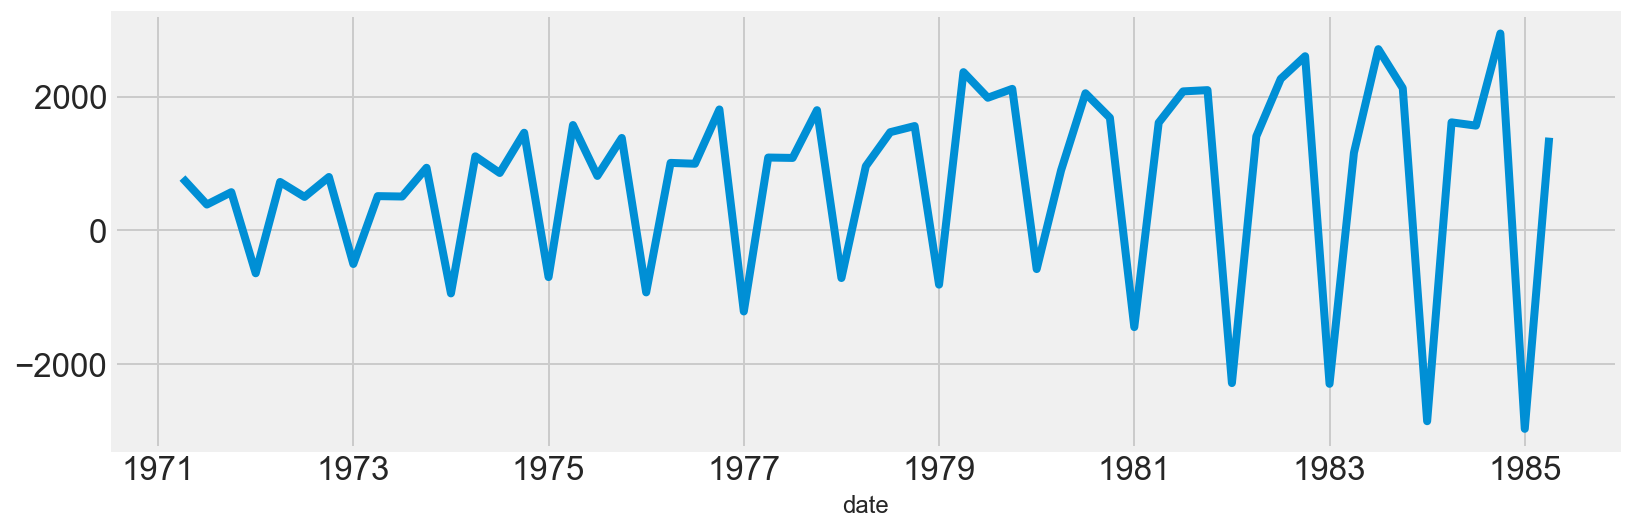

In [10]:
df.consumption.diff().dropna().plot(figsize=(12,4));

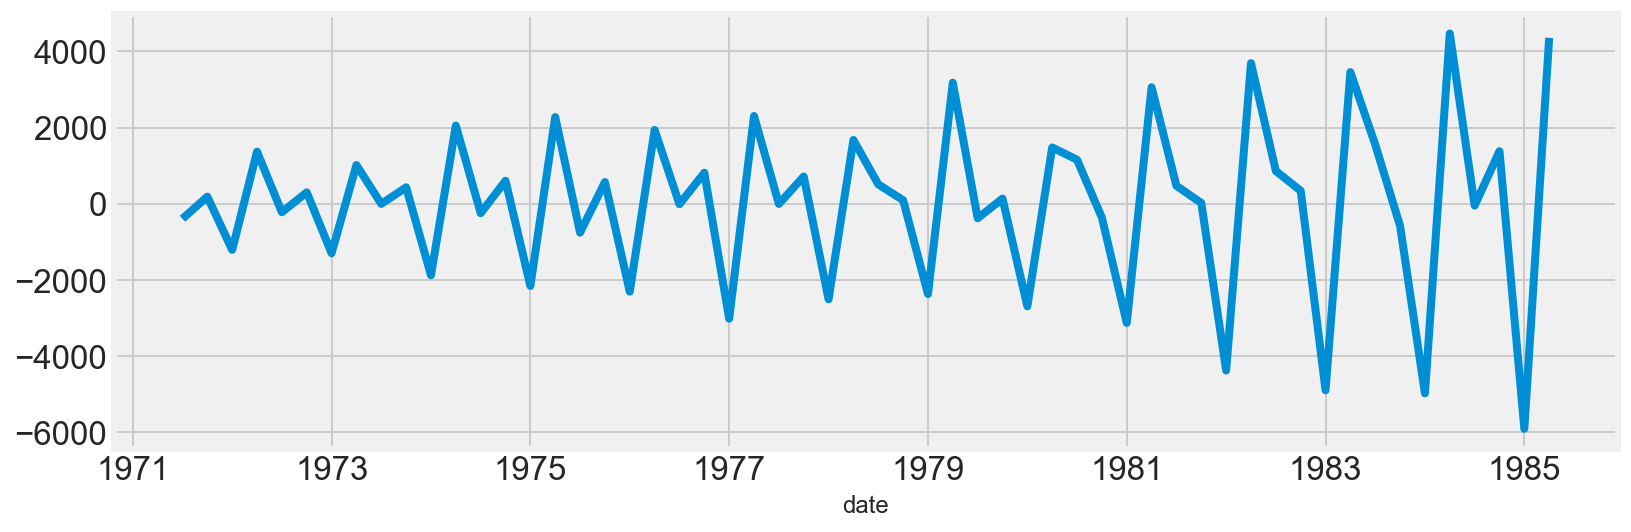

In [11]:
df.consumption.diff().diff().dropna().plot(figsize=(12,4));

we will chose the change of the values (one diff) , to make the data more stationary  

### 3. Look at the autocorrelations and partial autocorrelations of consumption and its differences. Describe.

In [12]:
def plot_acf_pacv(df):
    fig, ax = plt.subplots(ncols=2, figsize=(15, 6))
    plot_acf(df, ax=ax[0]);
    plot_pacf(df,lags=50 , ax=ax[1]);
    return fig, ax

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


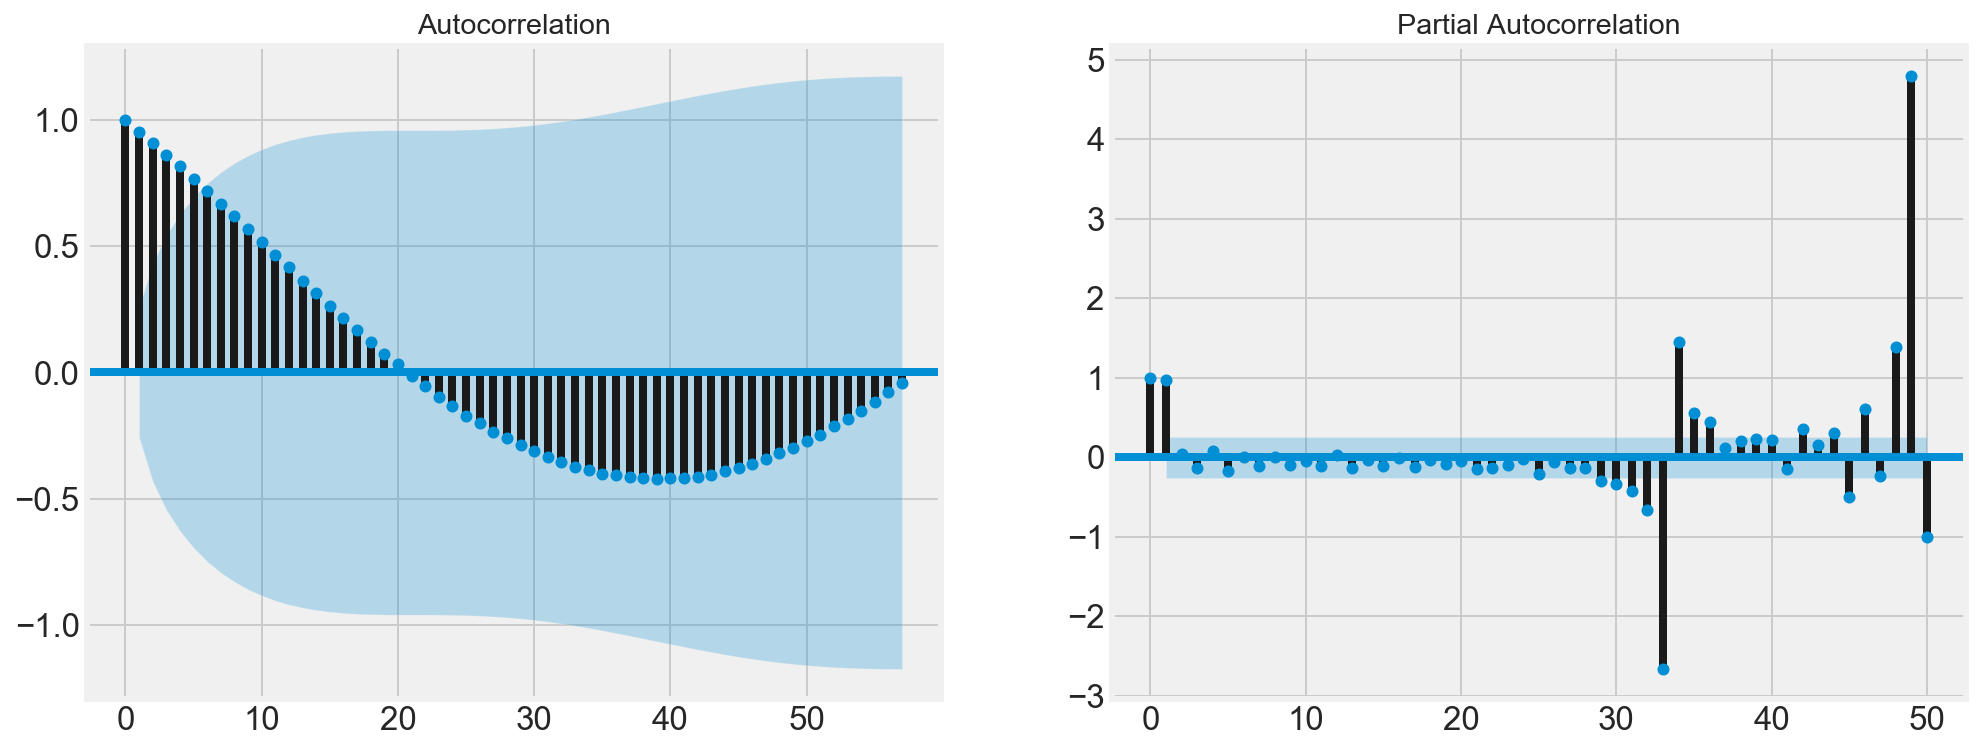

In [13]:
fig, ax = plot_acf_pacv(df.consumption);

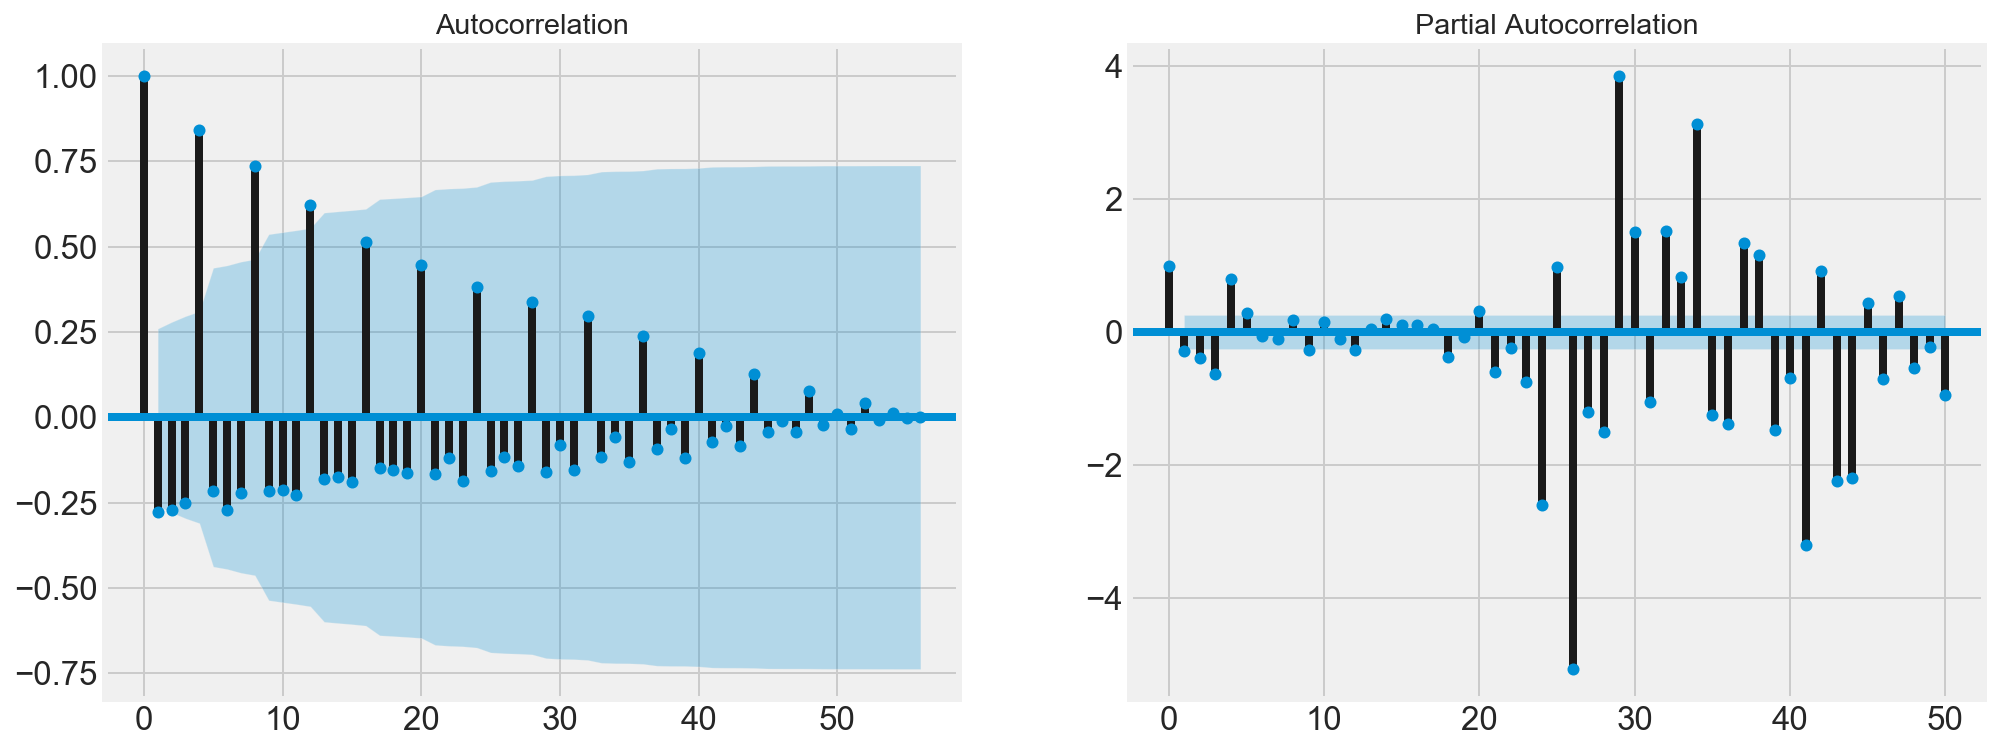

In [14]:
fig, ax = plot_acf_pacv(df.consumption.diff().dropna());

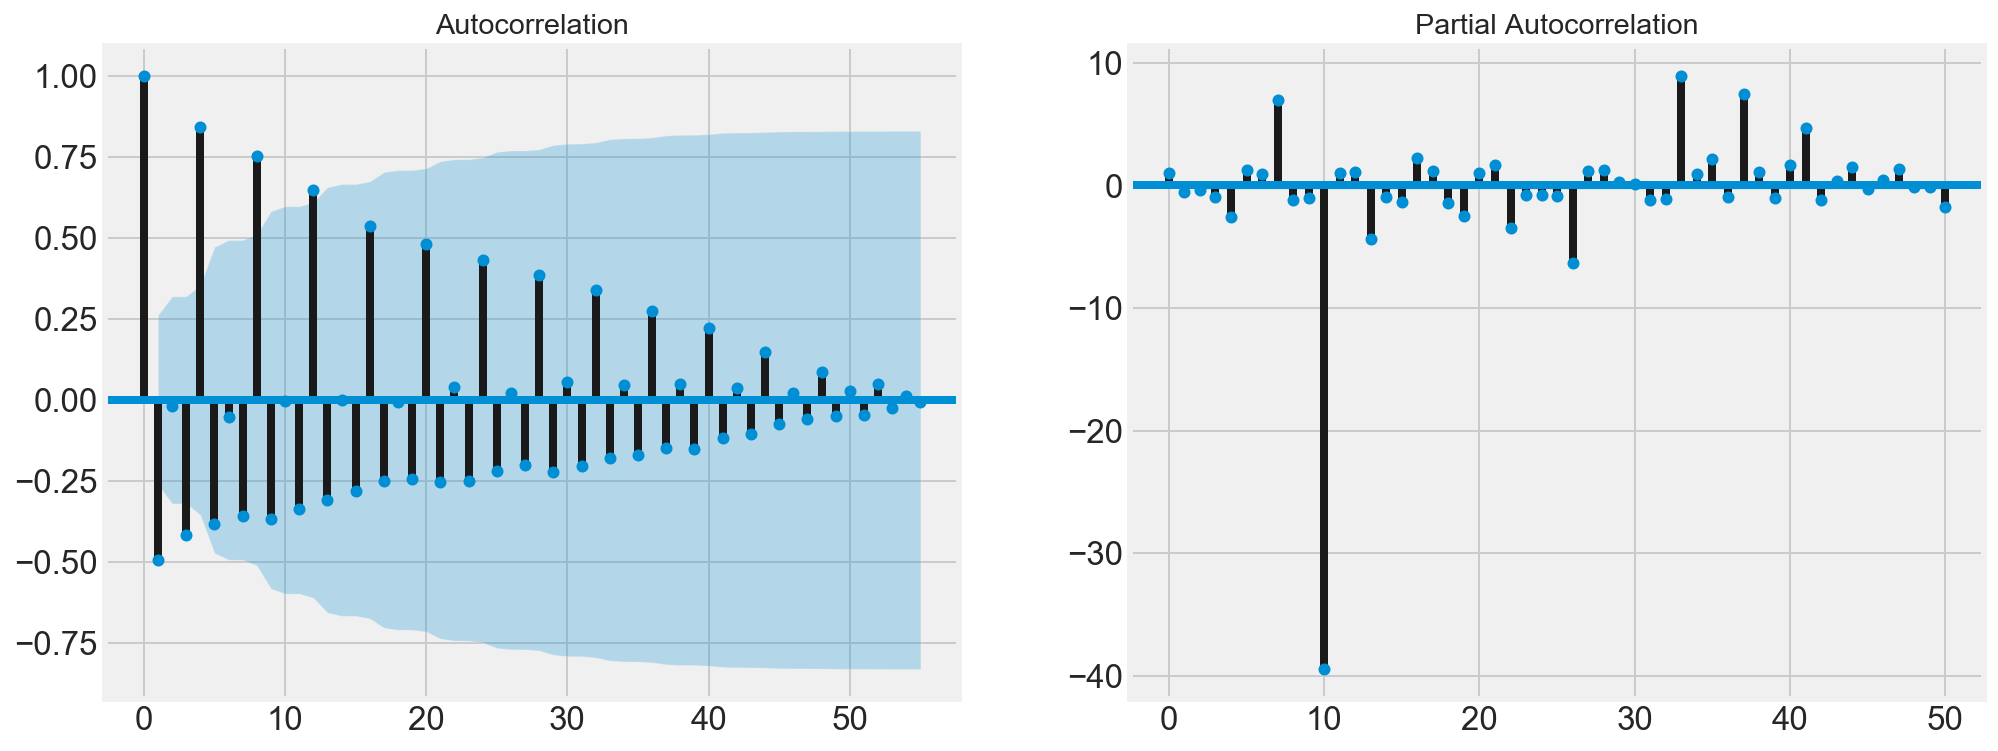

In [15]:
fig, ax = plot_acf_pacv(df.consumption.diff().diff().dropna());

### 4. Decompose into seasonal and non-seasonal parts.

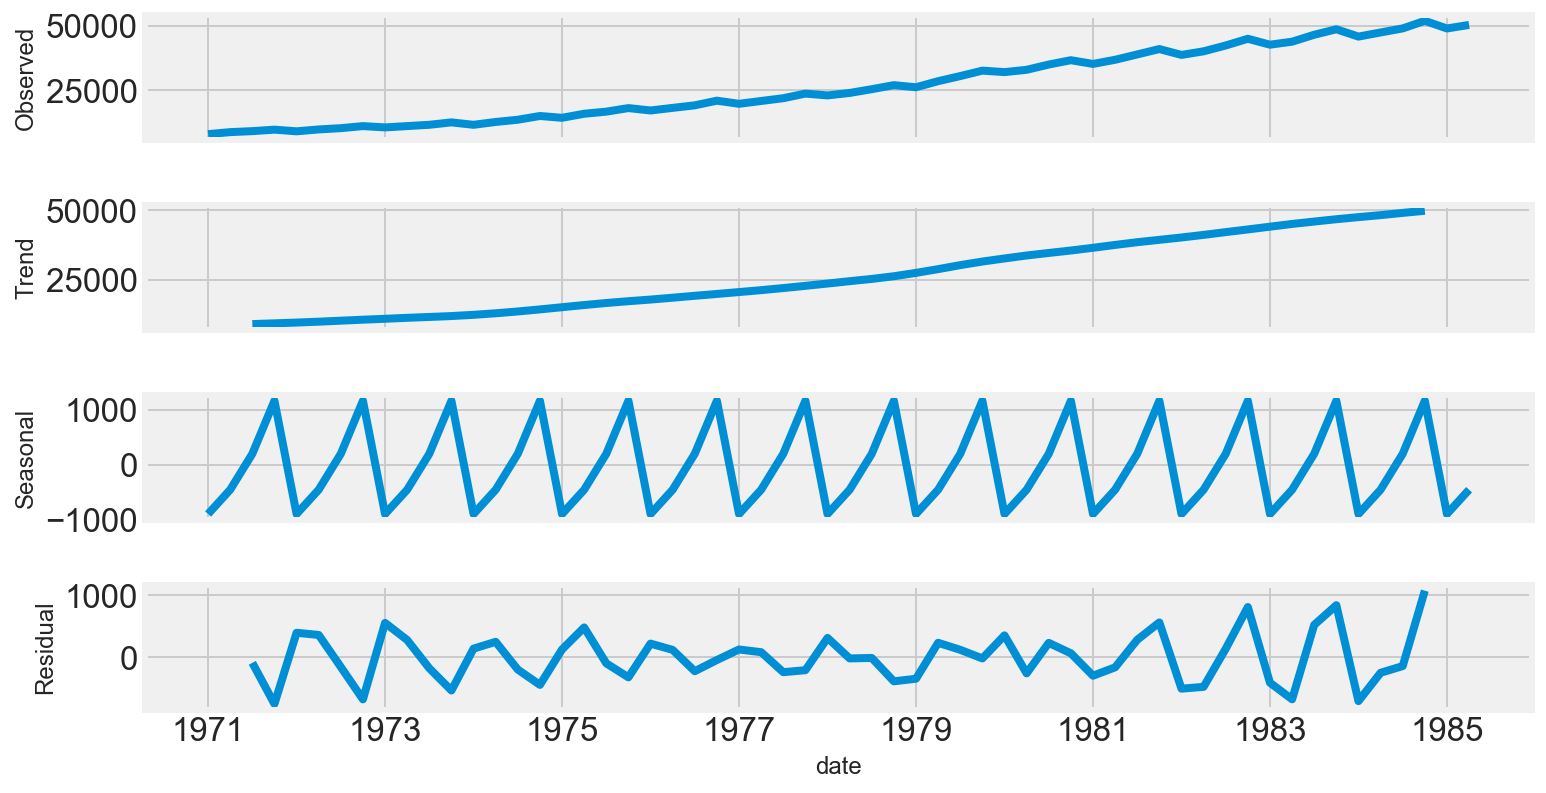

In [16]:
decomposition = seasonal_decompose(df.consumption,freq=4)  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)
plt.show()

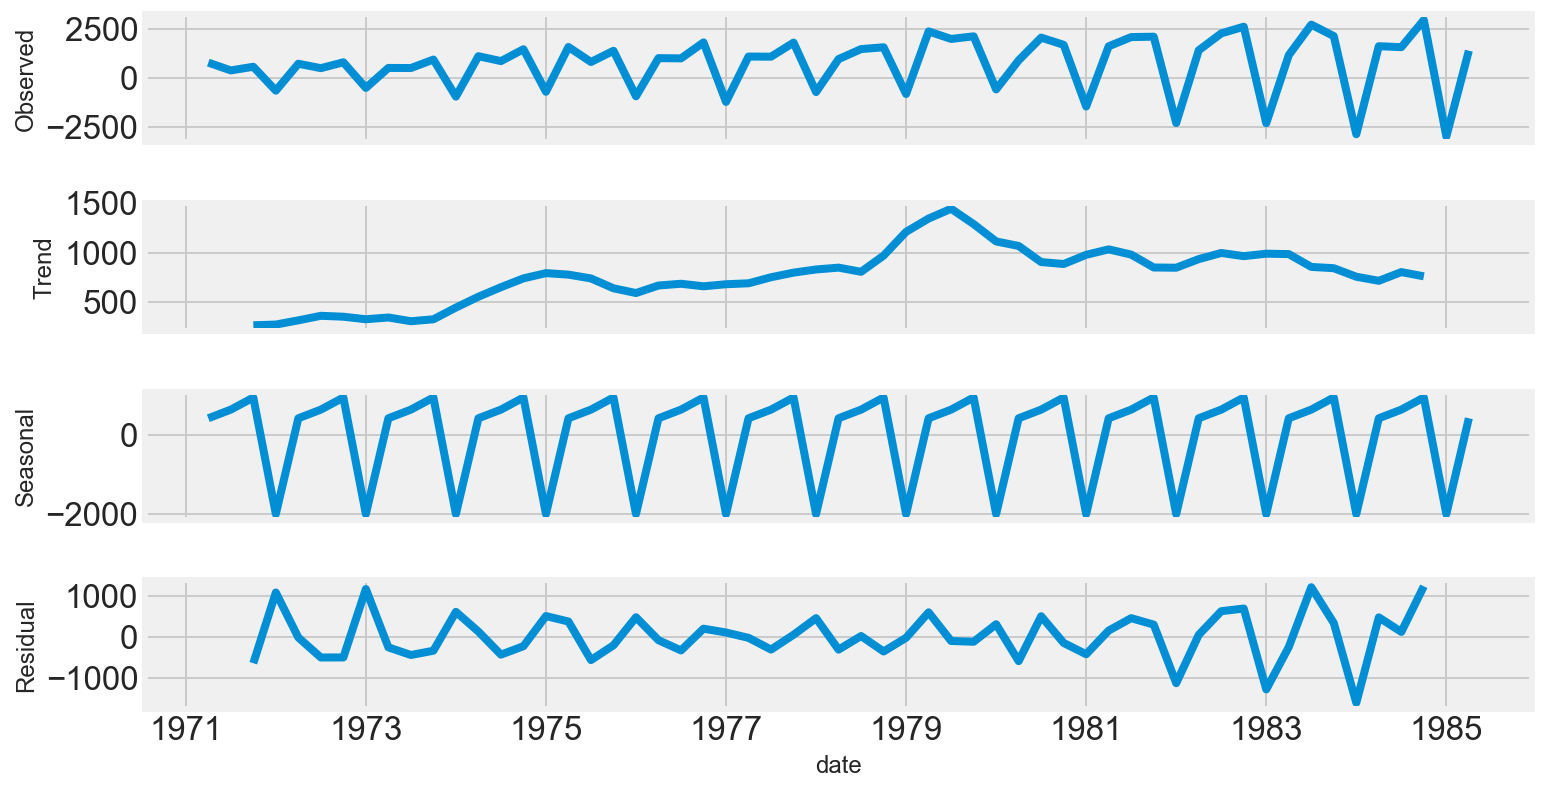

In [17]:
decomposition = seasonal_decompose(df.consumption.diff().dropna(),freq=4)  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)
plt.show()

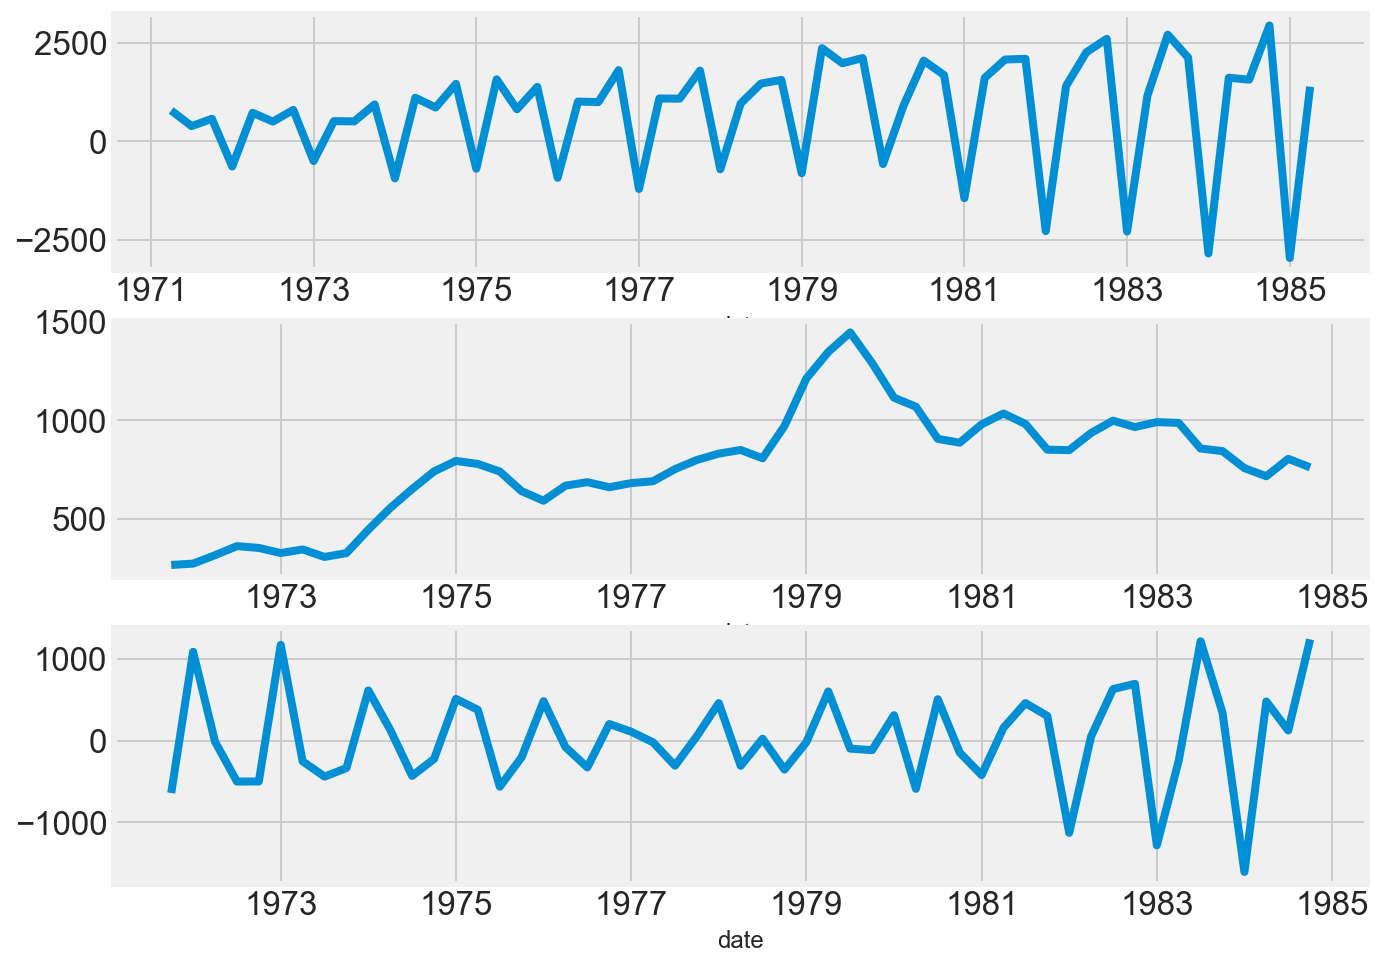

In [18]:
decomposition = seasonal_decompose(df.consumption.diff().dropna())  
plt.subplots(3,1)

plt.subplot(311)
decomposition.observed.plot(figsize=(10,8));


plt.subplot(312)
decomposition.trend.plot();


plt.subplot(313)
decomposition.resid.plot();


plt.show()

### 5. Perform a Dickey-Fuller test for stationarity on consumption and its differences.

In [19]:
# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries,maxlag=None,regression='c',autolag='AIC'):
    '''Perform Dickey-Fuller test and print out results'''
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries,maxlag=maxlag,regression=regression,autolag=autolag)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in list(dftest[4].items()):
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput) 

def rolling(timeseries,window=12,center=True,figsize=(12,8)):
    '''
    Plot original timeseries, 
    rolling mean over given window size and rolling 
    mean plus/minus standard deviation
    '''
    
    rolmean = timeseries.rolling(window=window, center=center).mean()
    rolstd = timeseries.rolling(window=window, center=center).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=figsize)
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std_plus = plt.plot(rolmean+rolstd, color='red',ls='--', label = 'Rolling Mean +/- Rolling Std')
    std_minus = plt.plot(rolmean-rolstd, color='red',ls='--',label= '')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()  

def autocorrelation_plot(timeseries,lags=None):
    '''Plot autocorrelations and partial autocorrelations'''
    fig, ax = plt.subplots(ncols=2,figsize=(12,4))
    plot_acf(timeseries, lags=lags, ax=ax[0])
    plot_pacf(timeseries, lags=lags, ax=ax[1])
    plt.show()

def test_and_vis(timeseries):
    '''
    Perform Dickey-Fuller test, 
    plot timeseries with rolling mean and autocorrelations
    '''
    test_stationarity(timeseries.dropna())
    rolling(timeseries)
    autocorrelation_plot(timeseries.dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -0.334698
p-value                         0.920444
#Lags Used                      8.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


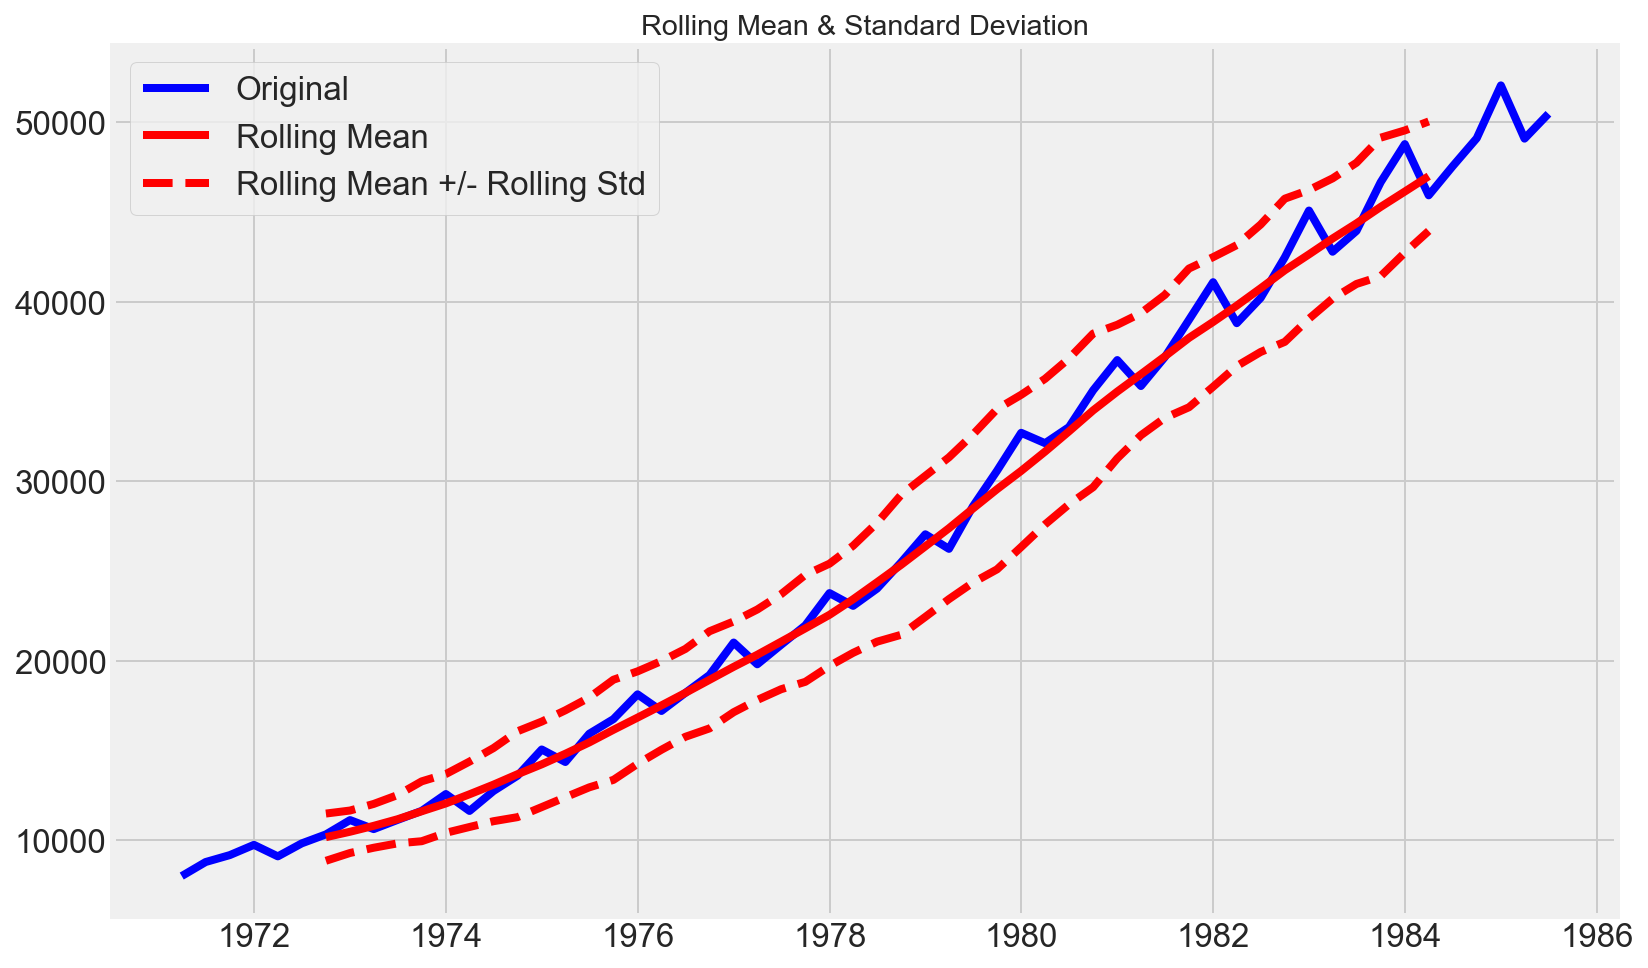

/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


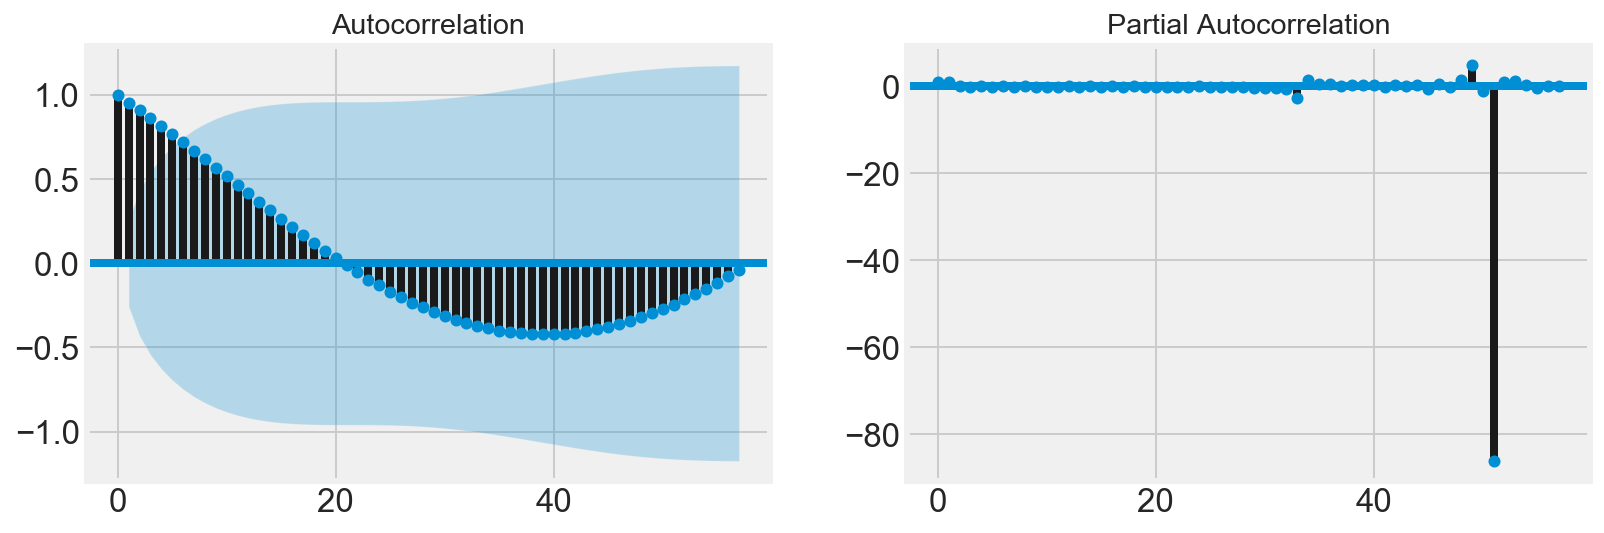

In [20]:
test_and_vis(df.consumption)

Results of Dickey-Fuller Test:
Test Statistic                 -1.647875
p-value                         0.458149
#Lags Used                      7.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


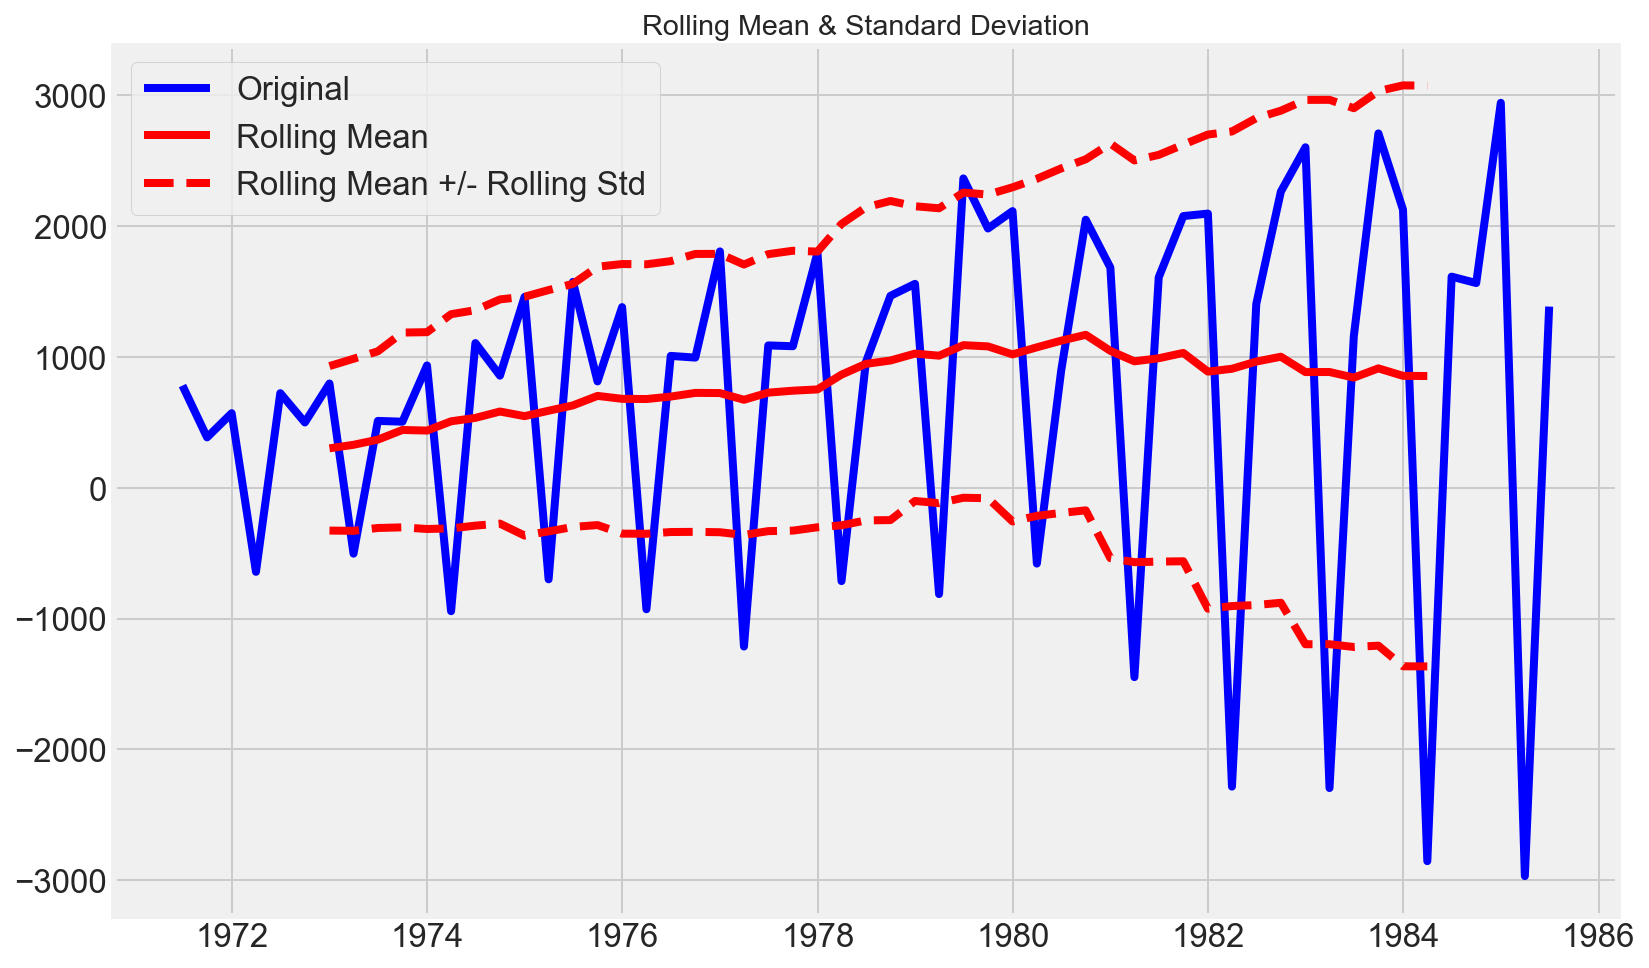

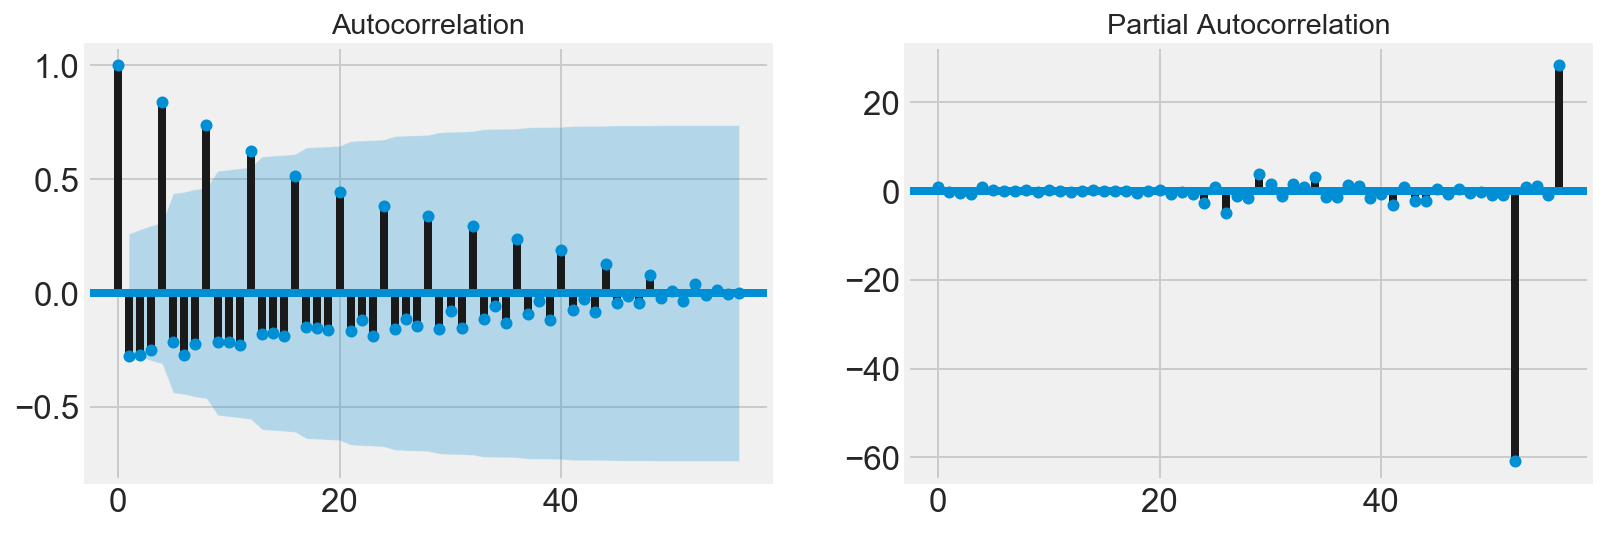

In [21]:
test_and_vis(df.consumption.diff().dropna())

Results of Dickey-Fuller Test:
Test Statistic                 -5.135772
p-value                         0.000012
#Lags Used                      6.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


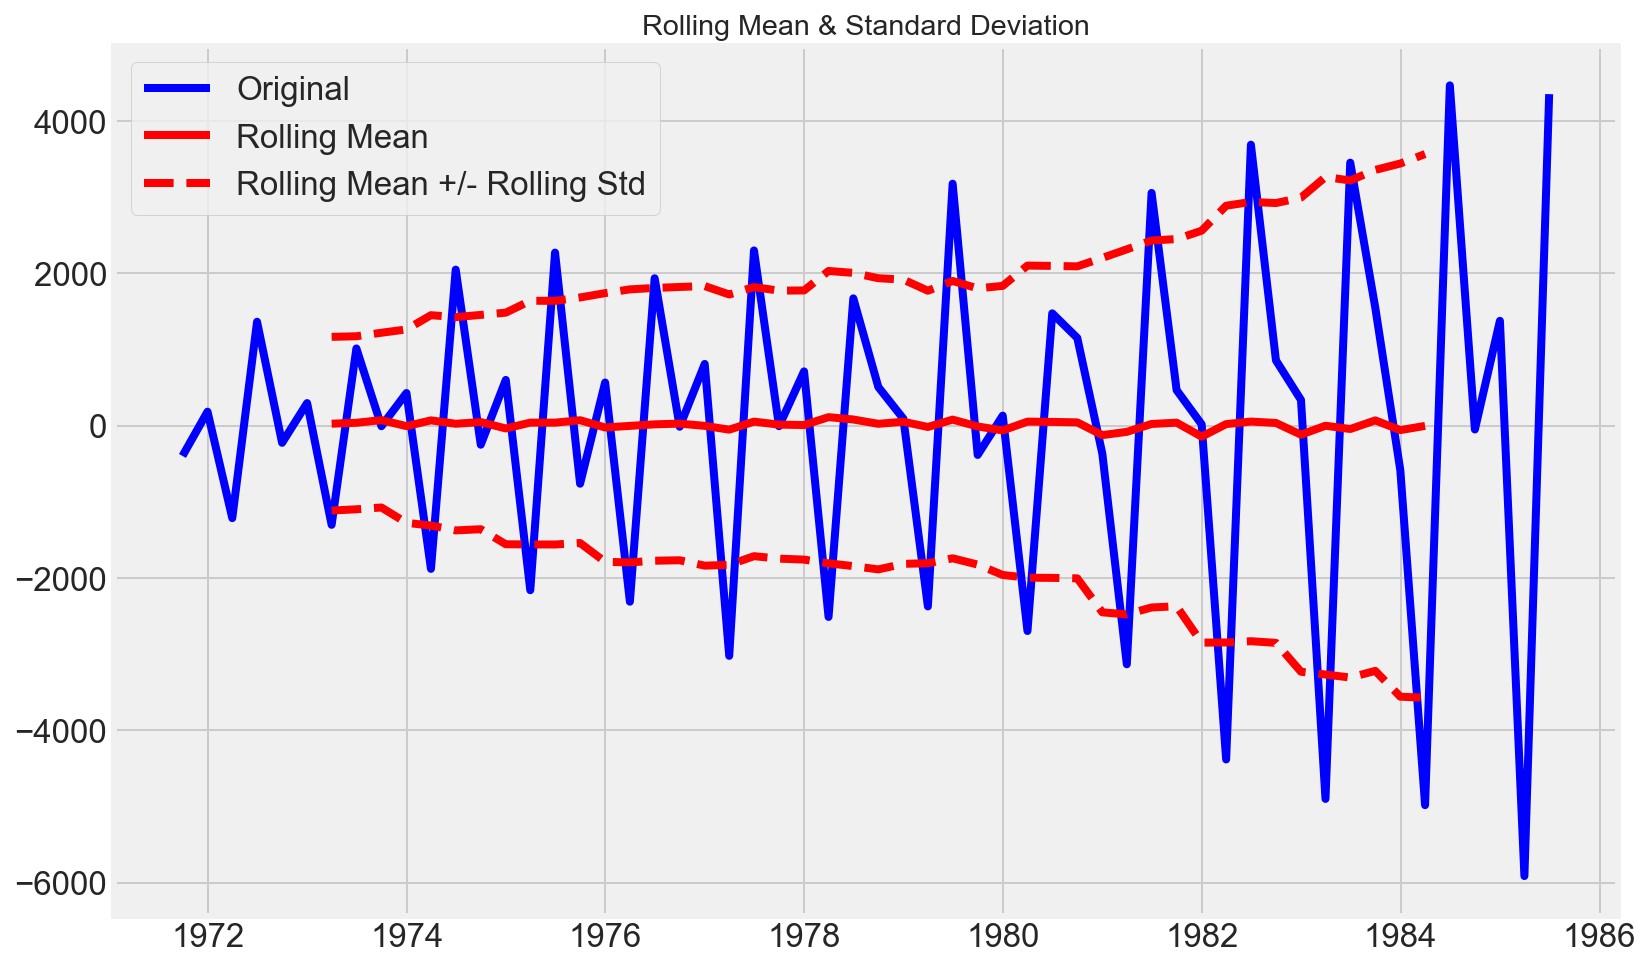

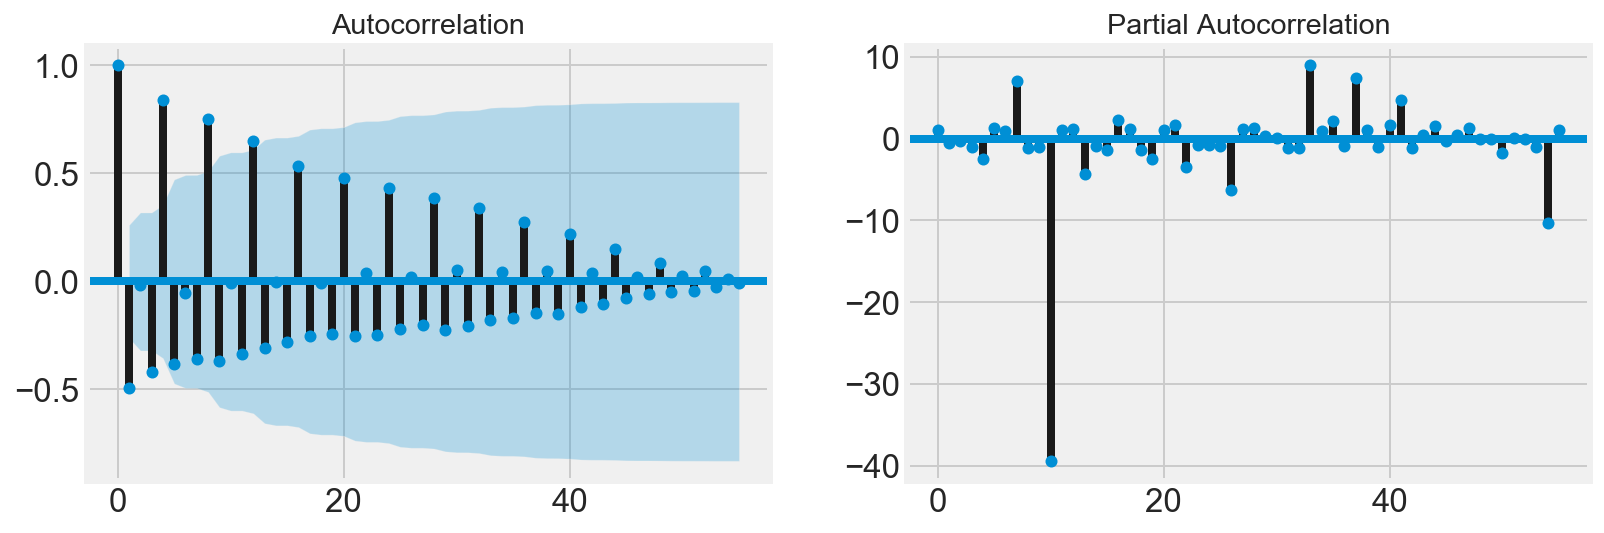

In [22]:
test_and_vis(df.consumption.diff().diff().dropna())

### 6. Do you get better results in the Dickey-Fuller test if you take into account seasonality effects?

Results of Dickey-Fuller Test:
Test Statistic                 -4.817405
p-value                         0.000050
#Lags Used                      3.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


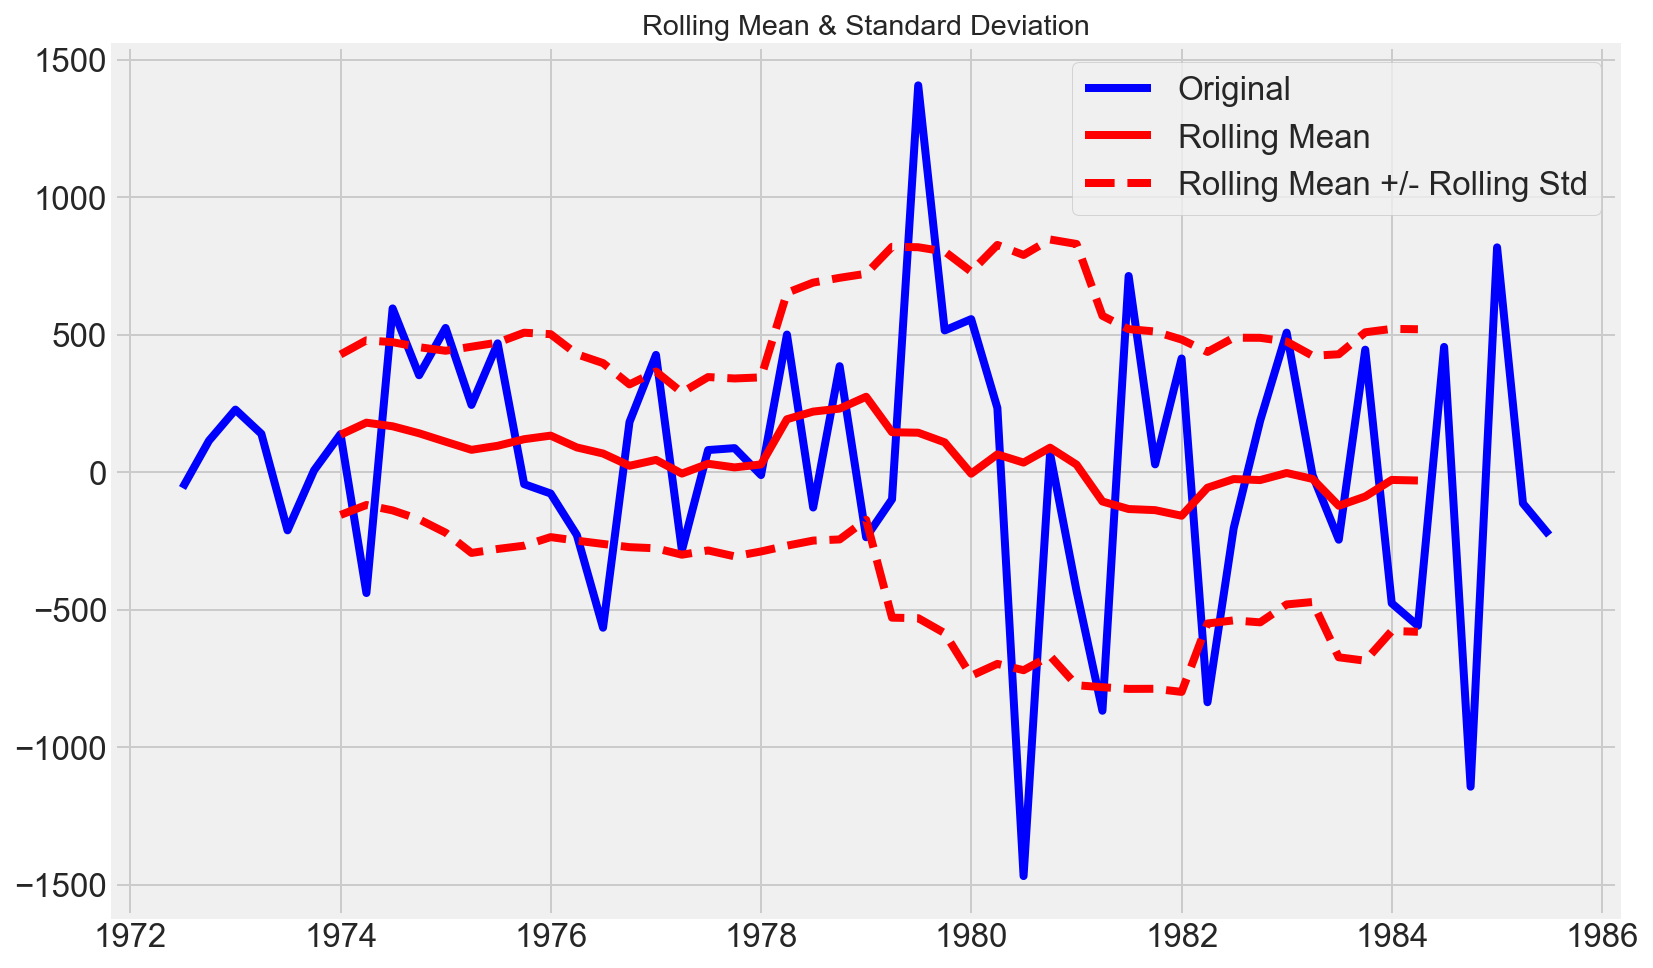

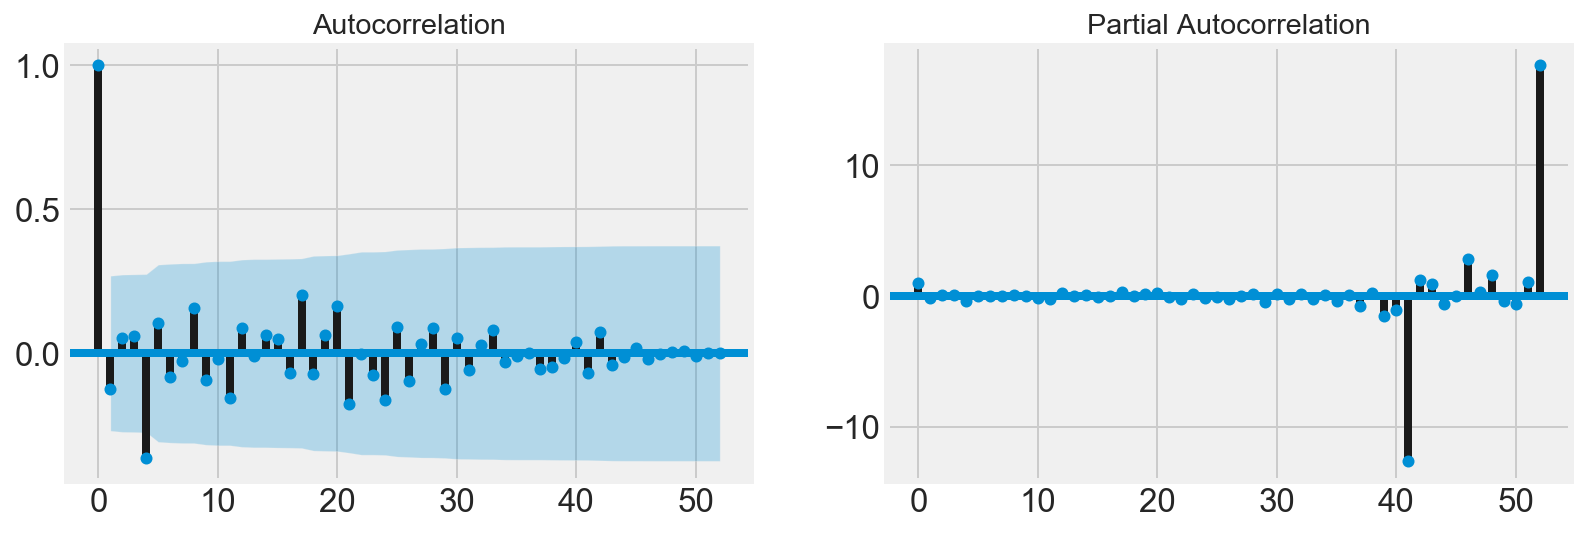

In [23]:
test_and_vis((df.consumption.diff()-df.consumption.diff().shift(4)).dropna())

### 7. Irrespective of your previous answers, fit a SARIMA model to consumption. Which parameters did you choose for the non-seasonal and seasonal components?

In [24]:
import statsmodels.api as sm

In [25]:
model = sm.tsa.statespace.SARIMAX(df.consumption.values, order=(0,1,1), 
                                  seasonal_order=(0,1,1,4))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   58
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 4)   Log Likelihood                -401.285
Date:                           Sun, 20 Jan 2019   AIC                            808.570
Time:                                   20:39:41   BIC                            814.481
Sample:                                        0   HQIC                           810.843
                                            - 58                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0728      0.137     -0.530      0.596      -0.342       0.196
ma.S.L4       -0.2522      0.114     -2.203      0.028      -0.477      -0.028
sigma2      2.162e+05   3.82e+04      5.656      0.000    1.41e+05    2.91e+05
===================================================================================
Ljung-Box (Q):                       27.21   Jarque-Bera (JB):                 1.49
Prob(Q):                              0.94   Prob(JB):                         0.48
Heteroskedasticity (H):               2.56   Skew:                            -0.24
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
model = sm.tsa.statespace.SARIMAX(df.consumption.values, order=(2,2,0), 
                                  seasonal_order=(1,1,0,4))
results = model.fit(maxiter=2000)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   58
Model:             SARIMAX(2, 2, 0)x(1, 1, 0, 4)   Log Likelihood                -403.419
Date:                           Sun, 20 Jan 2019   AIC                            814.839
Time:                                   20:39:42   BIC                            822.644
Sample:                                        0   HQIC                           817.831
                                            - 58                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6019      0.098     -6.121      0.000      -0.795      -0.409
ar.L2         -0.2491      0.106     -2.342      0.019      -0.458      -0.041
ar.S.L4       -0.3209      0.113     -2.828      0.005      -0.543      -0.098
sigma2      2.773e+05   5.83e+04      4.759      0.000    1.63e+05    3.91e+05
===================================================================================
Ljung-Box (Q):                       38.63   Jarque-Bera (JB):                 0.33
Prob(Q):                              0.53   Prob(JB):                         0.85
Heteroskedasticity (H):               1.97   Skew:                            -0.20
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
models = []
results = []
results_scores = []
max = 4
for p in range(3):
    for q in range(2):
        for p_s in range(3):
            for q_s in range(2):
                try:
                    model = sm.tsa.statespace.SARIMAX(df.consumption.values, 
                                      order=(p,1,q), 
                                      seasonal_order=(p_s,1,q_s,4))
                    result = model.fit()
                    models.append(model)
                    results.append(result)
                    results_scores.append([p,q,p_s,q_s,result.aic,result.bic])
                except:
                    results_scores.append([p,q,p_s,q_s,np.nan,np.nan])

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [28]:
results_scores

[[0, 0, 0, 0, 810.2145812046817, 812.1848731182339],
 [0, 0, 0, 1, 806.9270965704104, 810.8676803975146],
 [0, 0, 1, 0, 805.0221289943271, 808.9627128214313],
 [0, 0, 1, 1, 806.7901519991848, 812.7010277398412],
 [0, 0, 2, 0, 806.5510124557247, 812.4618881963811],
 [0, 0, 2, 1, 804.4074071331495, 812.288574787358],
 [0, 1, 0, 0, 811.7083829693411, 815.6489667964453],
 [0, 1, 0, 1, 808.5702039291795, 814.4810796698358],
 [0, 1, 1, 0, 806.8355660005172, 812.7464417411736],
 [0, 1, 1, 1, 808.6171275498531, 816.4982952040616],
 [0, 1, 2, 0, 808.4109288999365, 816.292096554145],
 [0, 1, 2, 1, 806.7883400053537, 816.6397995731143],
 [1, 0, 0, 0, 811.6850447963092, 815.6256286234134],
 [1, 0, 0, 1, 808.5527430795815, 814.4636188202379],
 [1, 0, 1, 0, 806.8225777294865, 812.7334534701429],
 [1, 0, 1, 1, 808.6027753229406, 816.4839429771491],
 [1, 0, 2, 0, 808.3972434530683, 816.2784111072768],
 [1, 0, 2, 1, 807.0085108991196, 816.8599704668802],
 [1, 1, 0, 0, 813.6585797548362, 819.56945549549

In [29]:
results_scores = np.array(results_scores)
results_scores = results_scores[results_scores[:,4]>0]
results_scores

array([[  0.        ,   0.        ,   0.        ,   0.        ,
        810.2145812 , 812.18487312],
       [  0.        ,   0.        ,   0.        ,   1.        ,
        806.92709657, 810.8676804 ],
       [  0.        ,   0.        ,   1.        ,   0.        ,
        805.02212899, 808.96271282],
       [  0.        ,   0.        ,   1.        ,   1.        ,
        806.790152  , 812.70102774],
       [  0.        ,   0.        ,   2.        ,   0.        ,
        806.55101246, 812.4618882 ],
       [  0.        ,   0.        ,   2.        ,   1.        ,
        804.40740713, 812.28857479],
       [  0.        ,   1.        ,   0.        ,   0.        ,
        811.70838297, 815.6489668 ],
       [  0.        ,   1.        ,   0.        ,   1.        ,
        808.57020393, 814.48107967],
       [  0.        ,   1.        ,   1.        ,   0.        ,
        806.835566  , 812.74644174],
       [  0.        ,   1.        ,   1.        ,   1.        ,
        808.61712755, 816.4

In [30]:
best_params_aic = results_scores[results_scores[:,4].argmin()][:4]
best_params_bic = results_scores[results_scores[:,5].argmin()][:4]

print("AIC:", results_scores[:,4].argmin(), best_params_aic)
print("BIC:", results_scores[:,5].argmin(), best_params_bic)


AIC: 5 [0. 0. 2. 1.]
BIC: 2 [0. 0. 1. 0.]


In [31]:
model_ = sm.tsa.statespace.SARIMAX(df.consumption.values, order=(0,1,0), 
                                  seasonal_order=(2,1,1,4))
results_ = model_.fit()
results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                   58
Model:             SARIMAX(0, 1, 0)x(2, 1, 1, 4)   Log Likelihood                -398.204
Date:                           Sun, 20 Jan 2019   AIC                            804.407
Time:                                   20:39:49   BIC                            812.289
Sample:                                        0   HQIC                           807.438
                                            - 58                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.5585      0.125      4.459      0.000       0.313       0.804
ar.S.L8        0.4413      0.122      3.626      0.000       0.203       0.680
ma.S.L4       -0.9927      0.173     -5.737      0.000      -1.332      -0.654
sigma2      1.798e+05   1.04e-06   1.73e+11      0.000     1.8e+05     1.8e+05
===================================================================================
Ljung-Box (Q):                       30.09   Jarque-Bera (JB):                 4.37
Prob(Q):                              0.87   Prob(JB):                         0.11
Heteroskedasticity (H):               2.45   Skew:                            -0.31
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.33e+27. Standard errors may be unstable.
"""

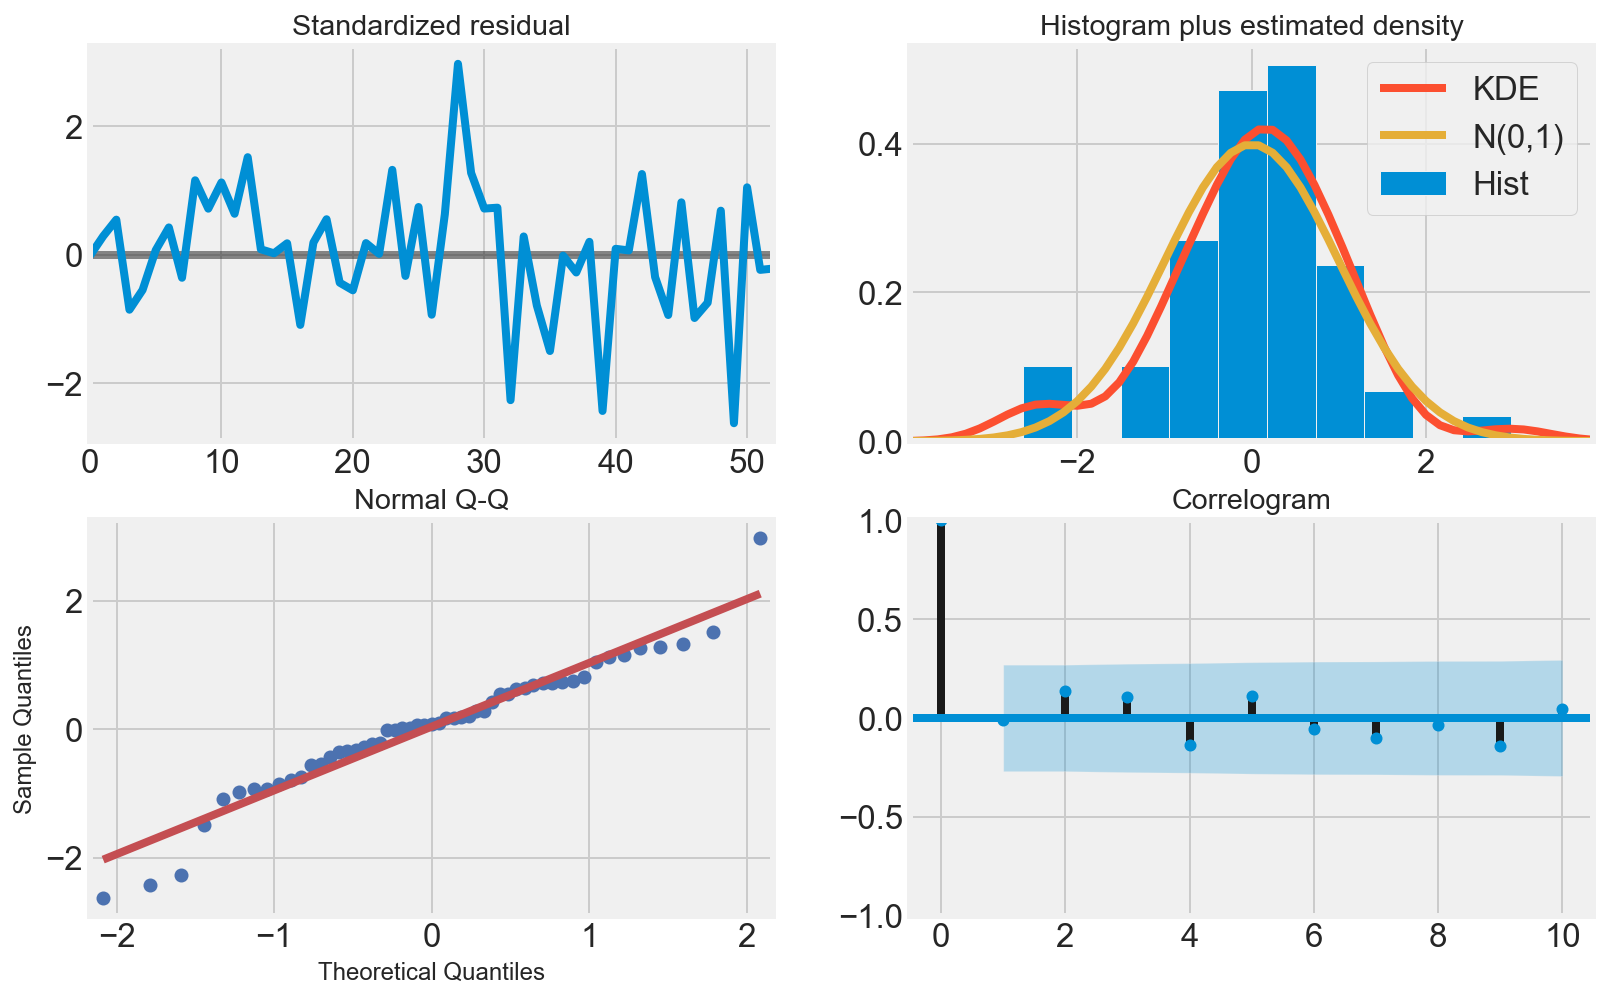

In [32]:
results_.plot_diagnostics(figsize=(12,8));


### 8. Describe your diagnostic plots of the residuals. Check for residual autocorrelations.



 Model parameters [0. 0. 0. 0.]


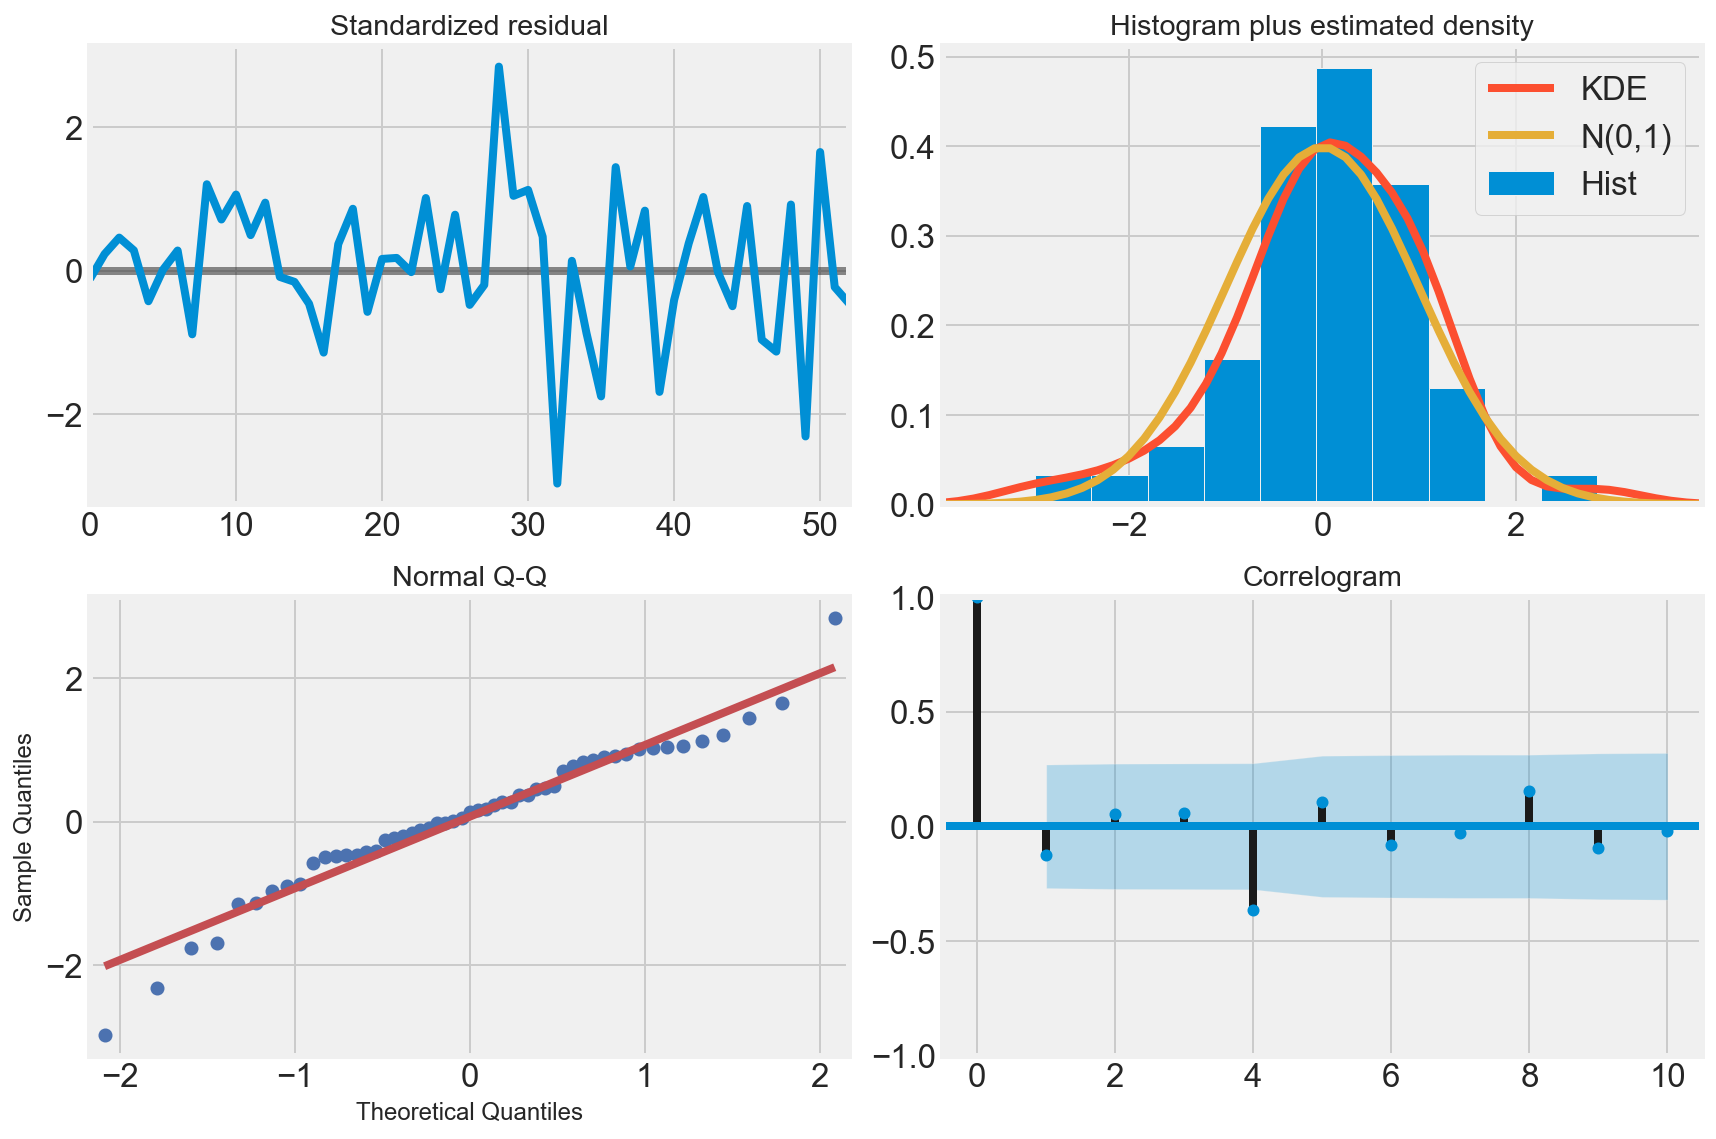



 Model parameters [0. 0. 0. 1.]


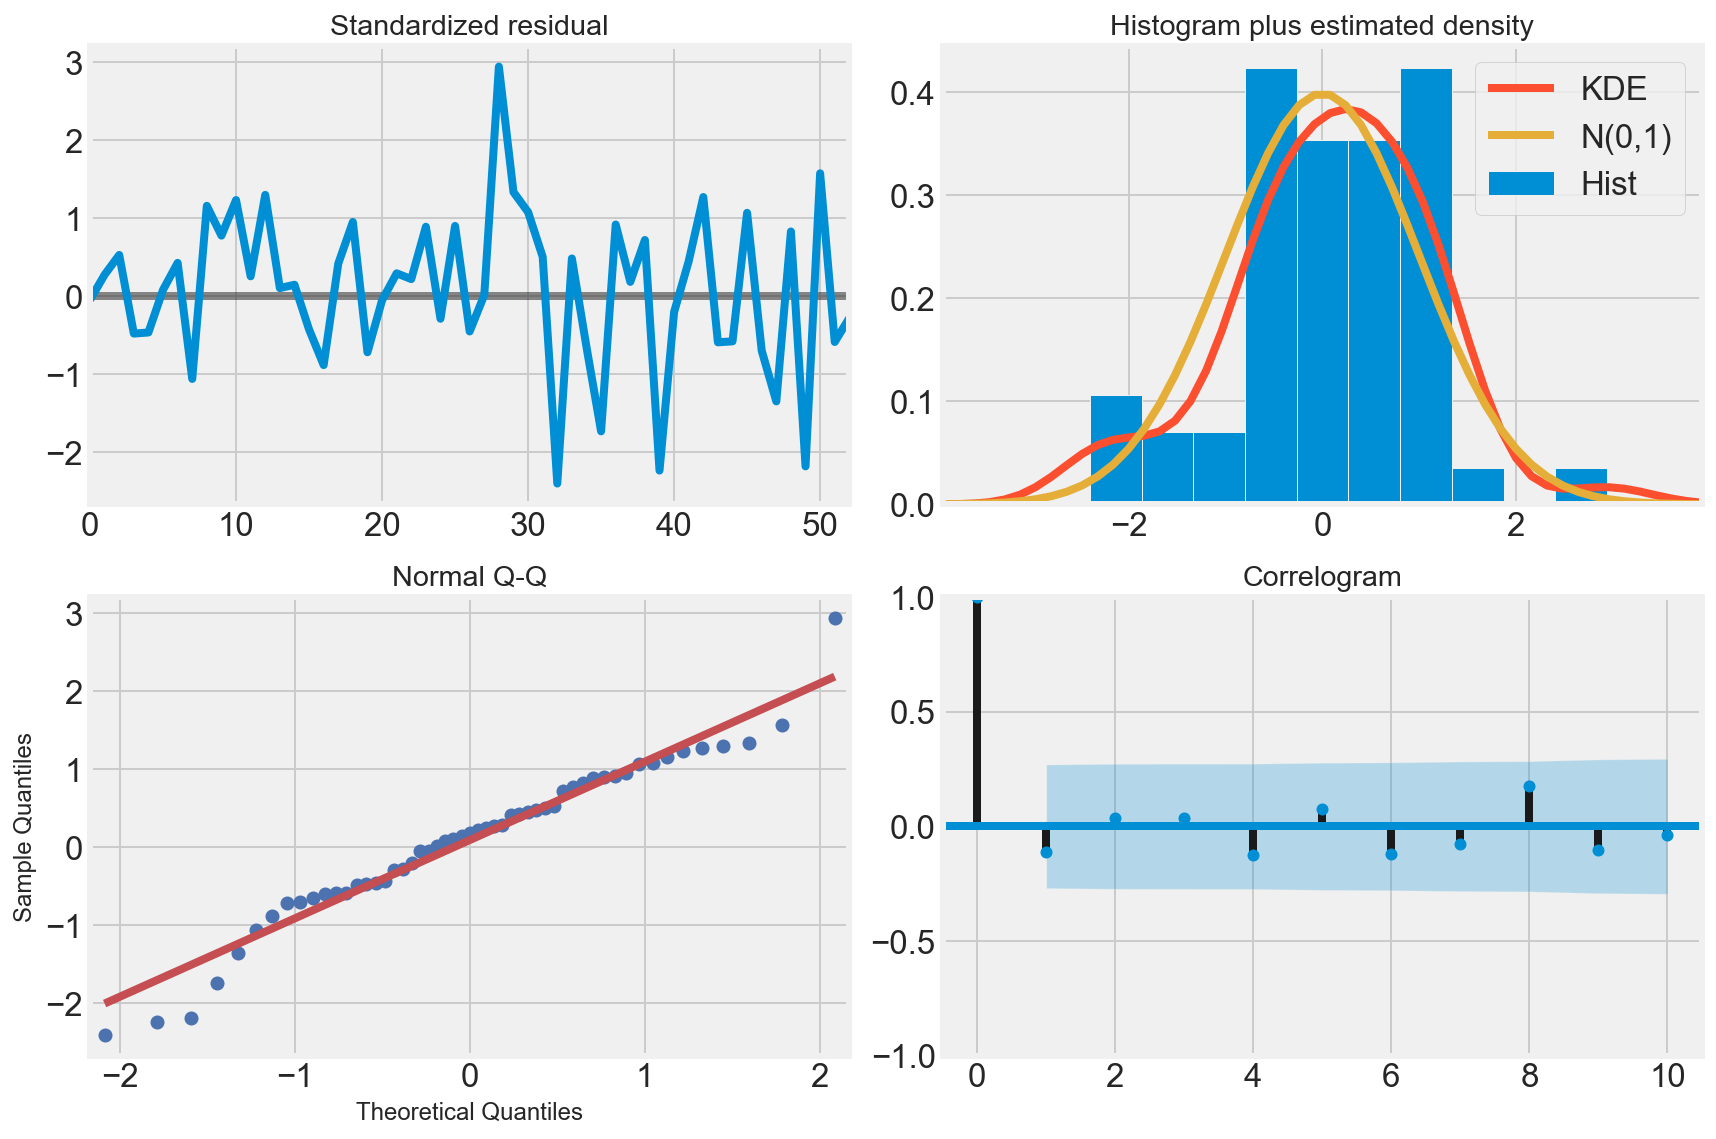



 Model parameters [0. 0. 1. 0.]


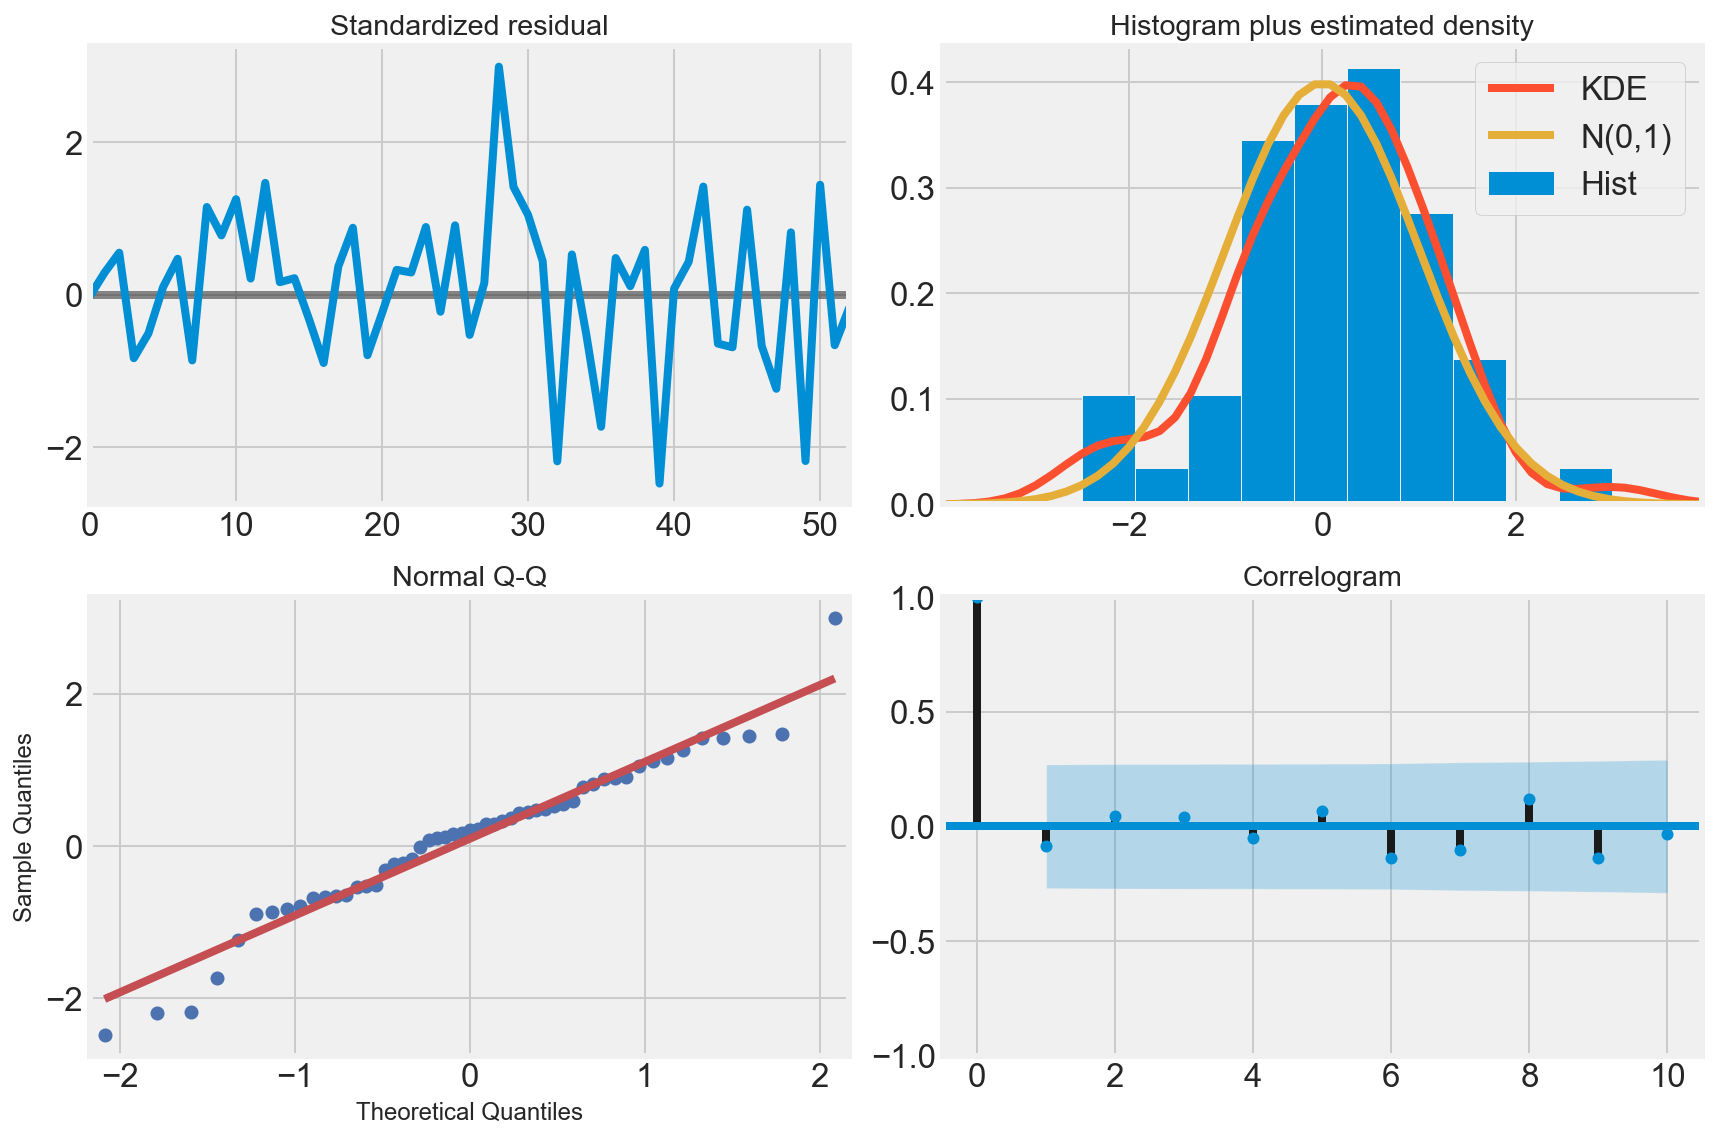



 Model parameters [0. 0. 1. 1.]


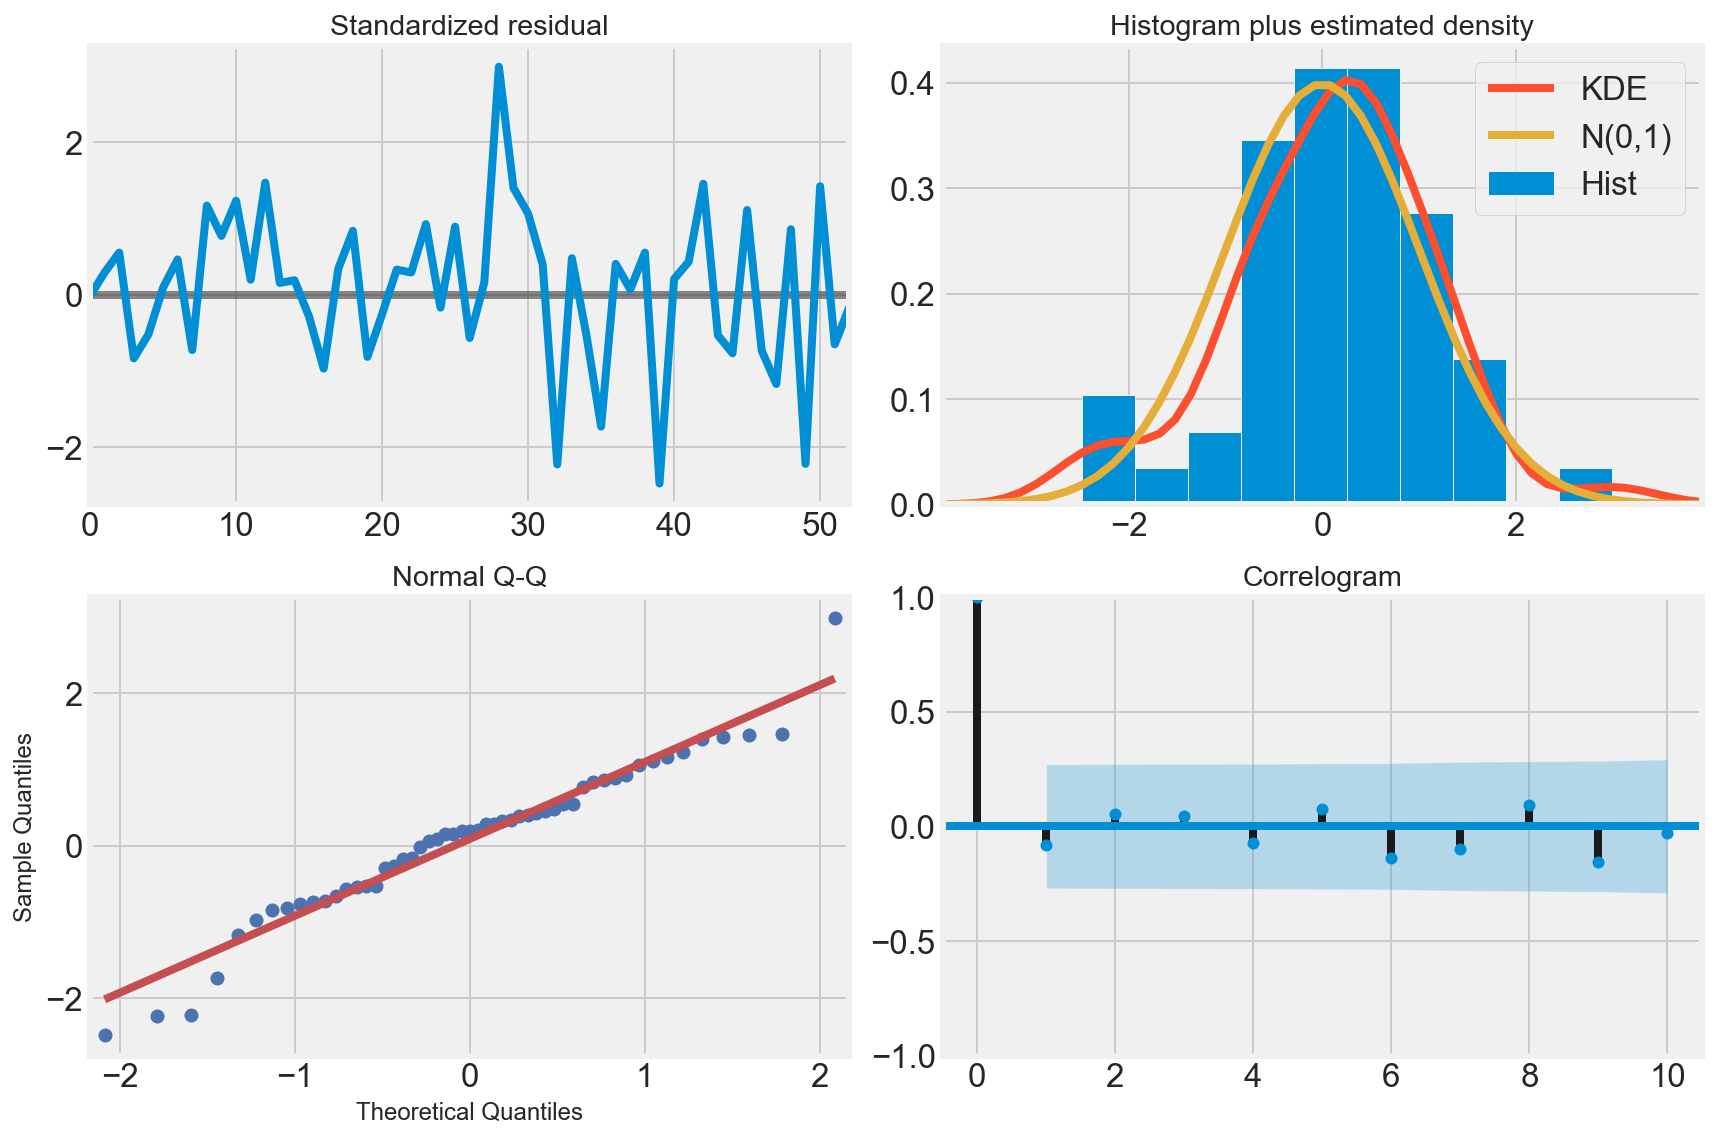



 Model parameters [0. 0. 2. 0.]


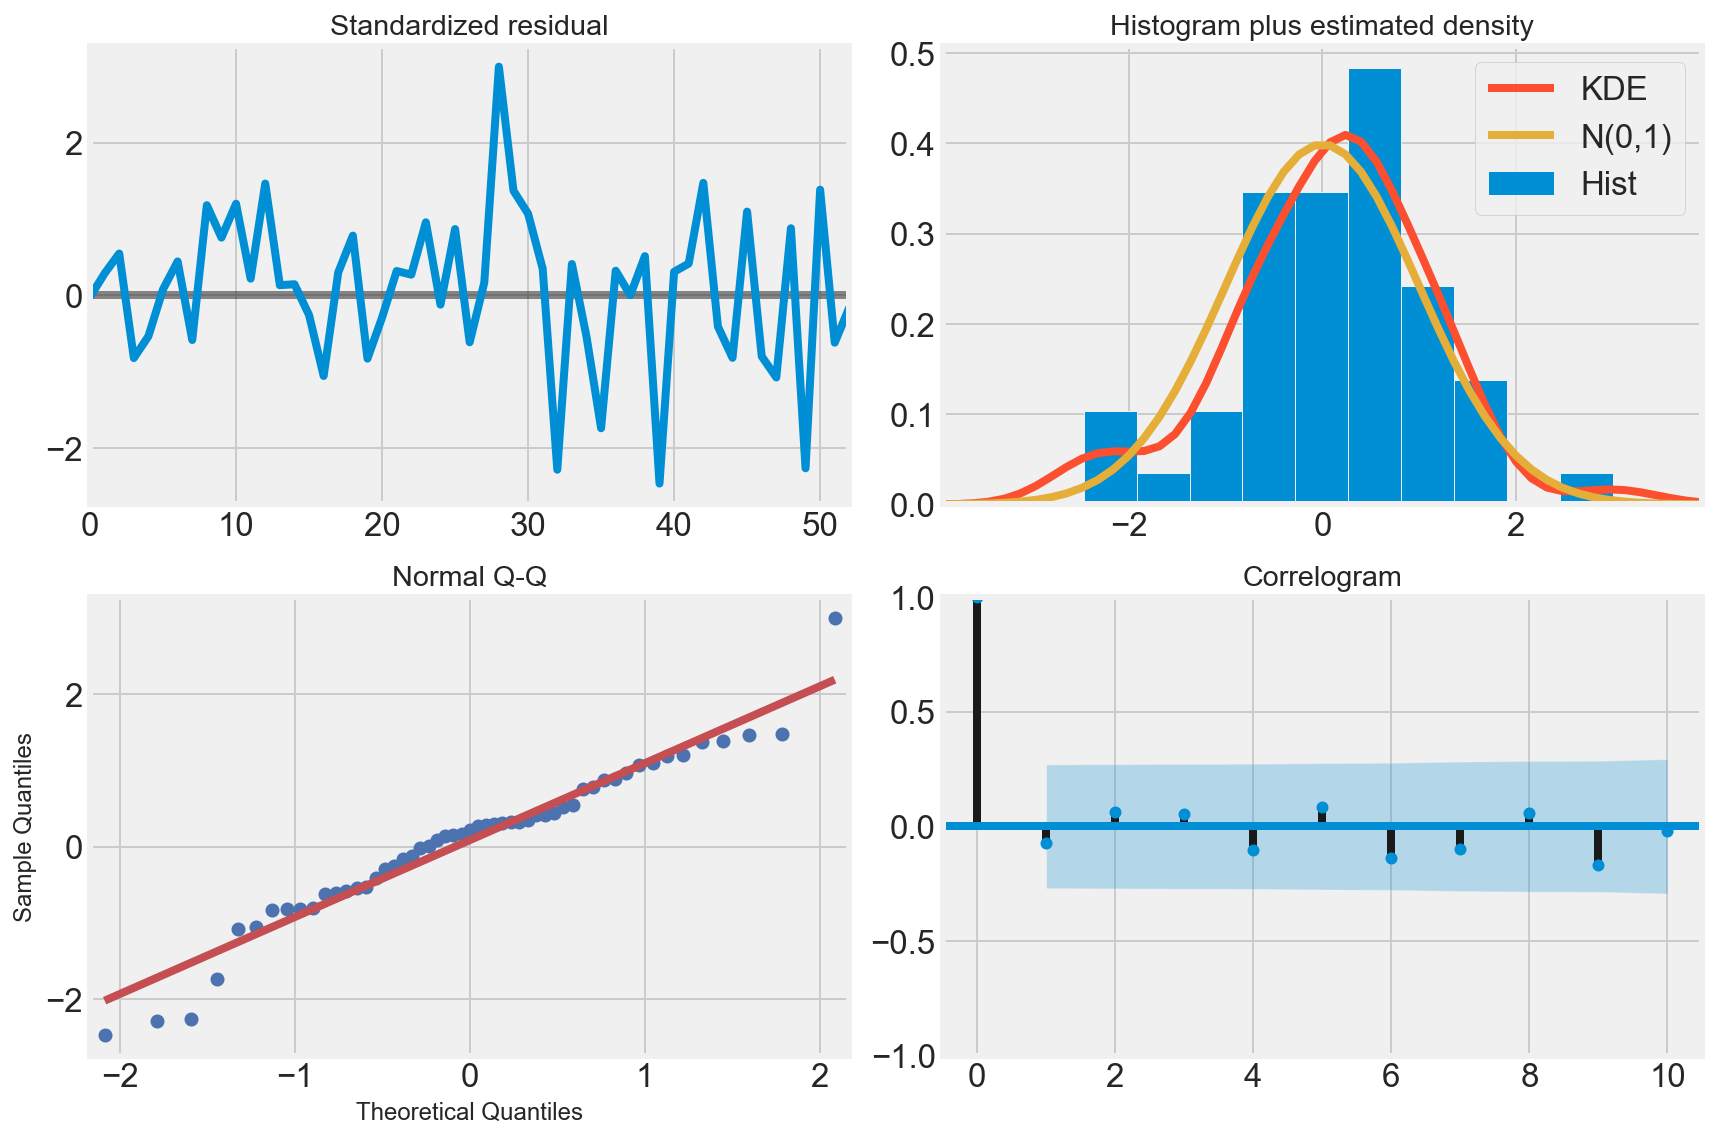



 Model parameters [0. 0. 2. 1.]


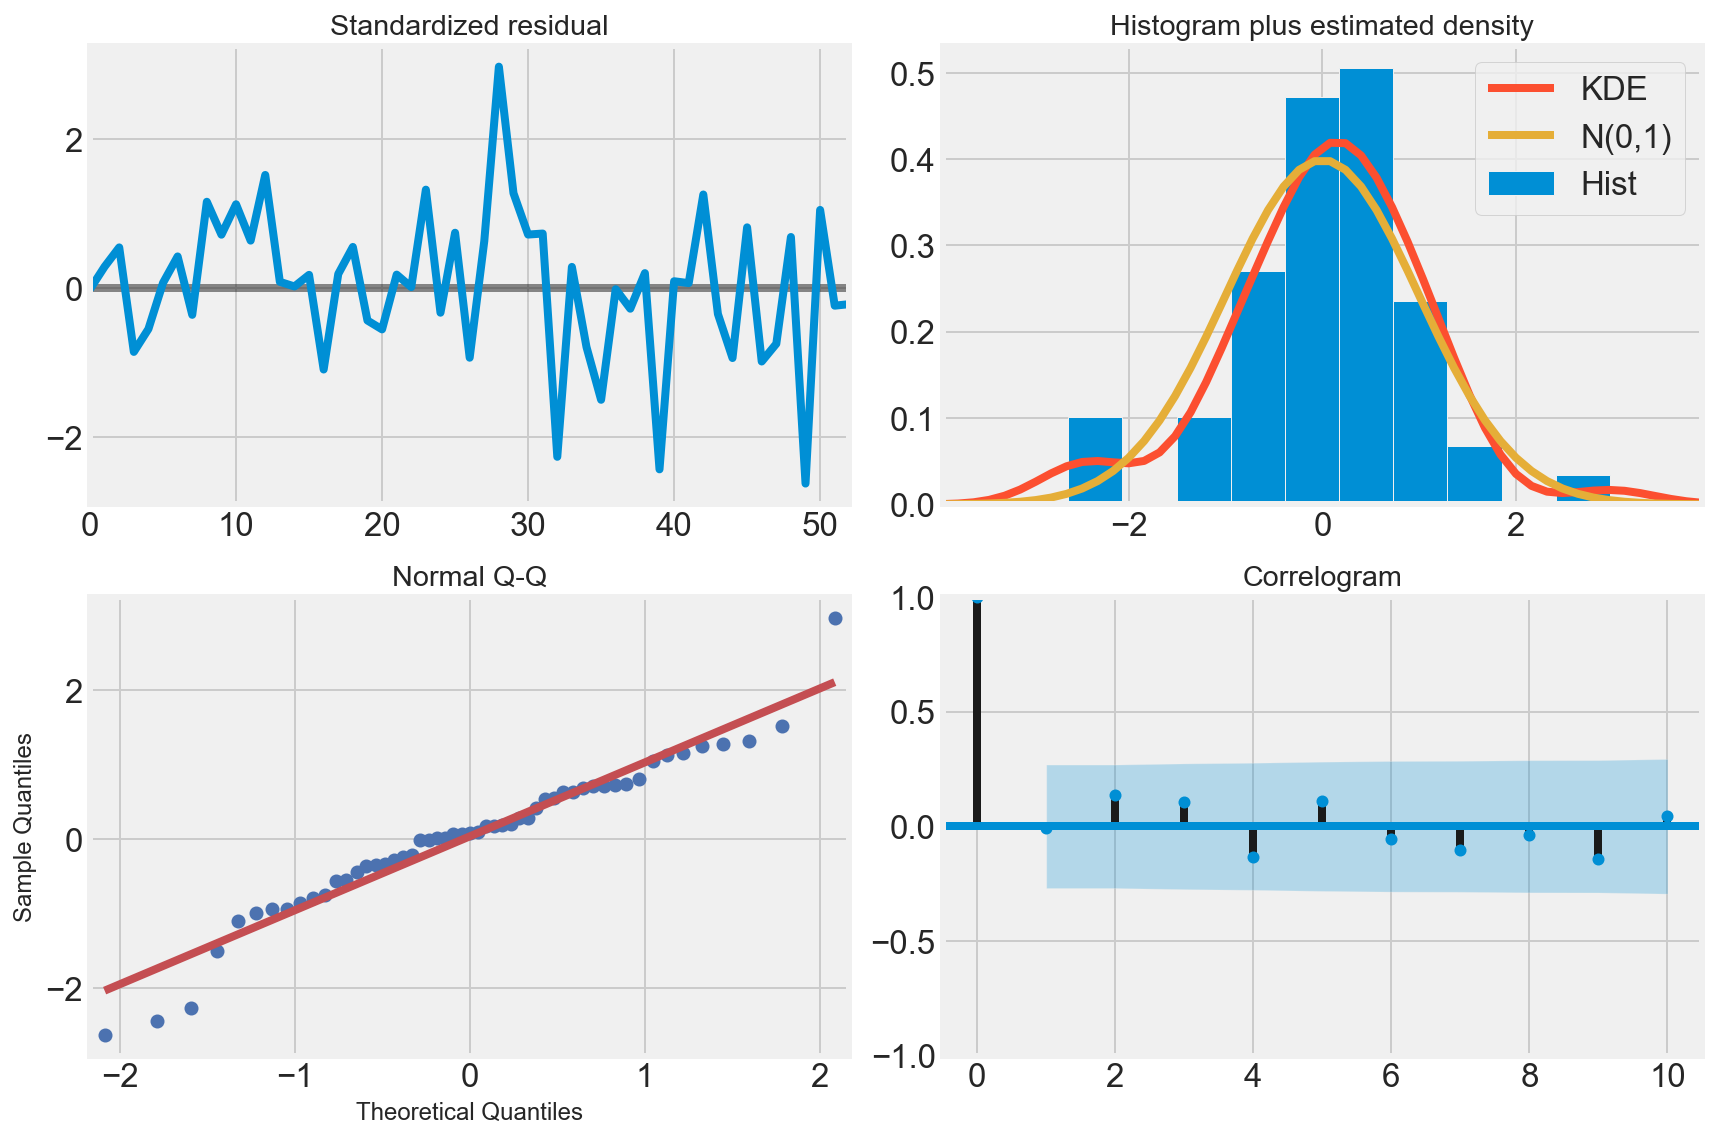



 Model parameters [0. 1. 0. 0.]


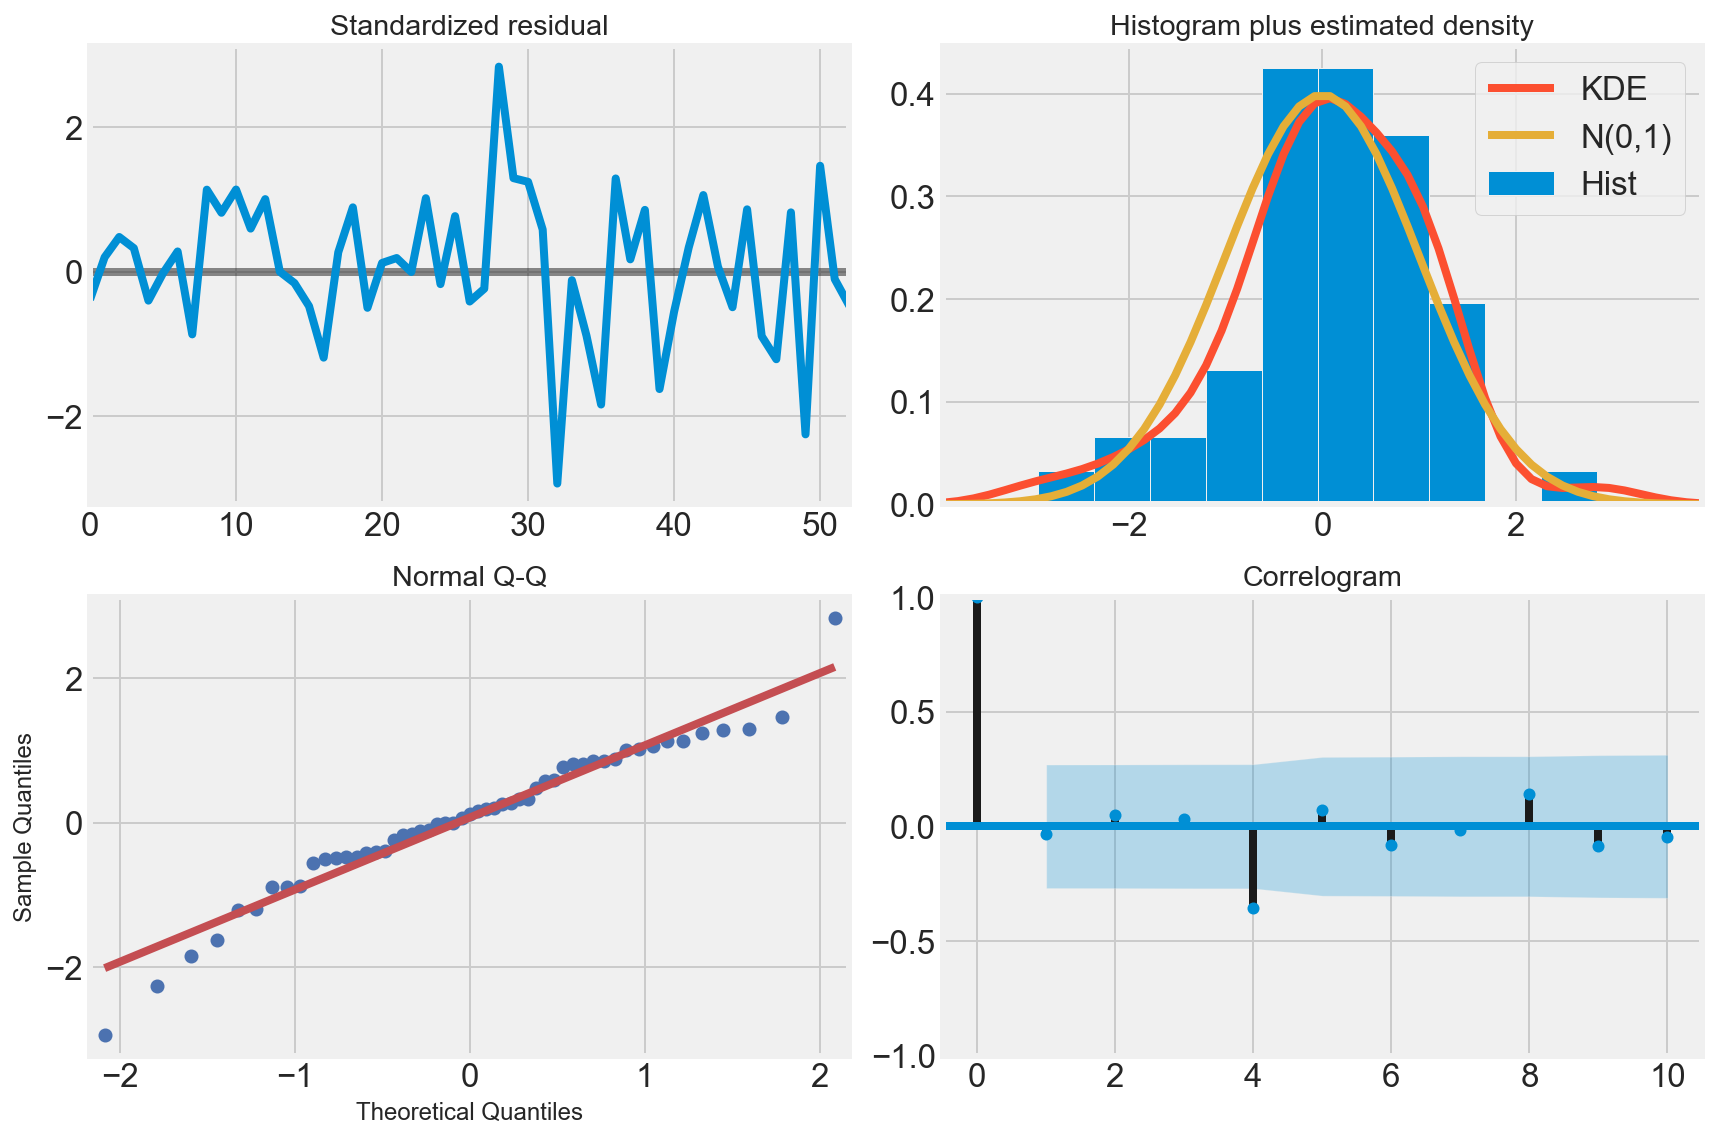



 Model parameters [0. 1. 0. 1.]


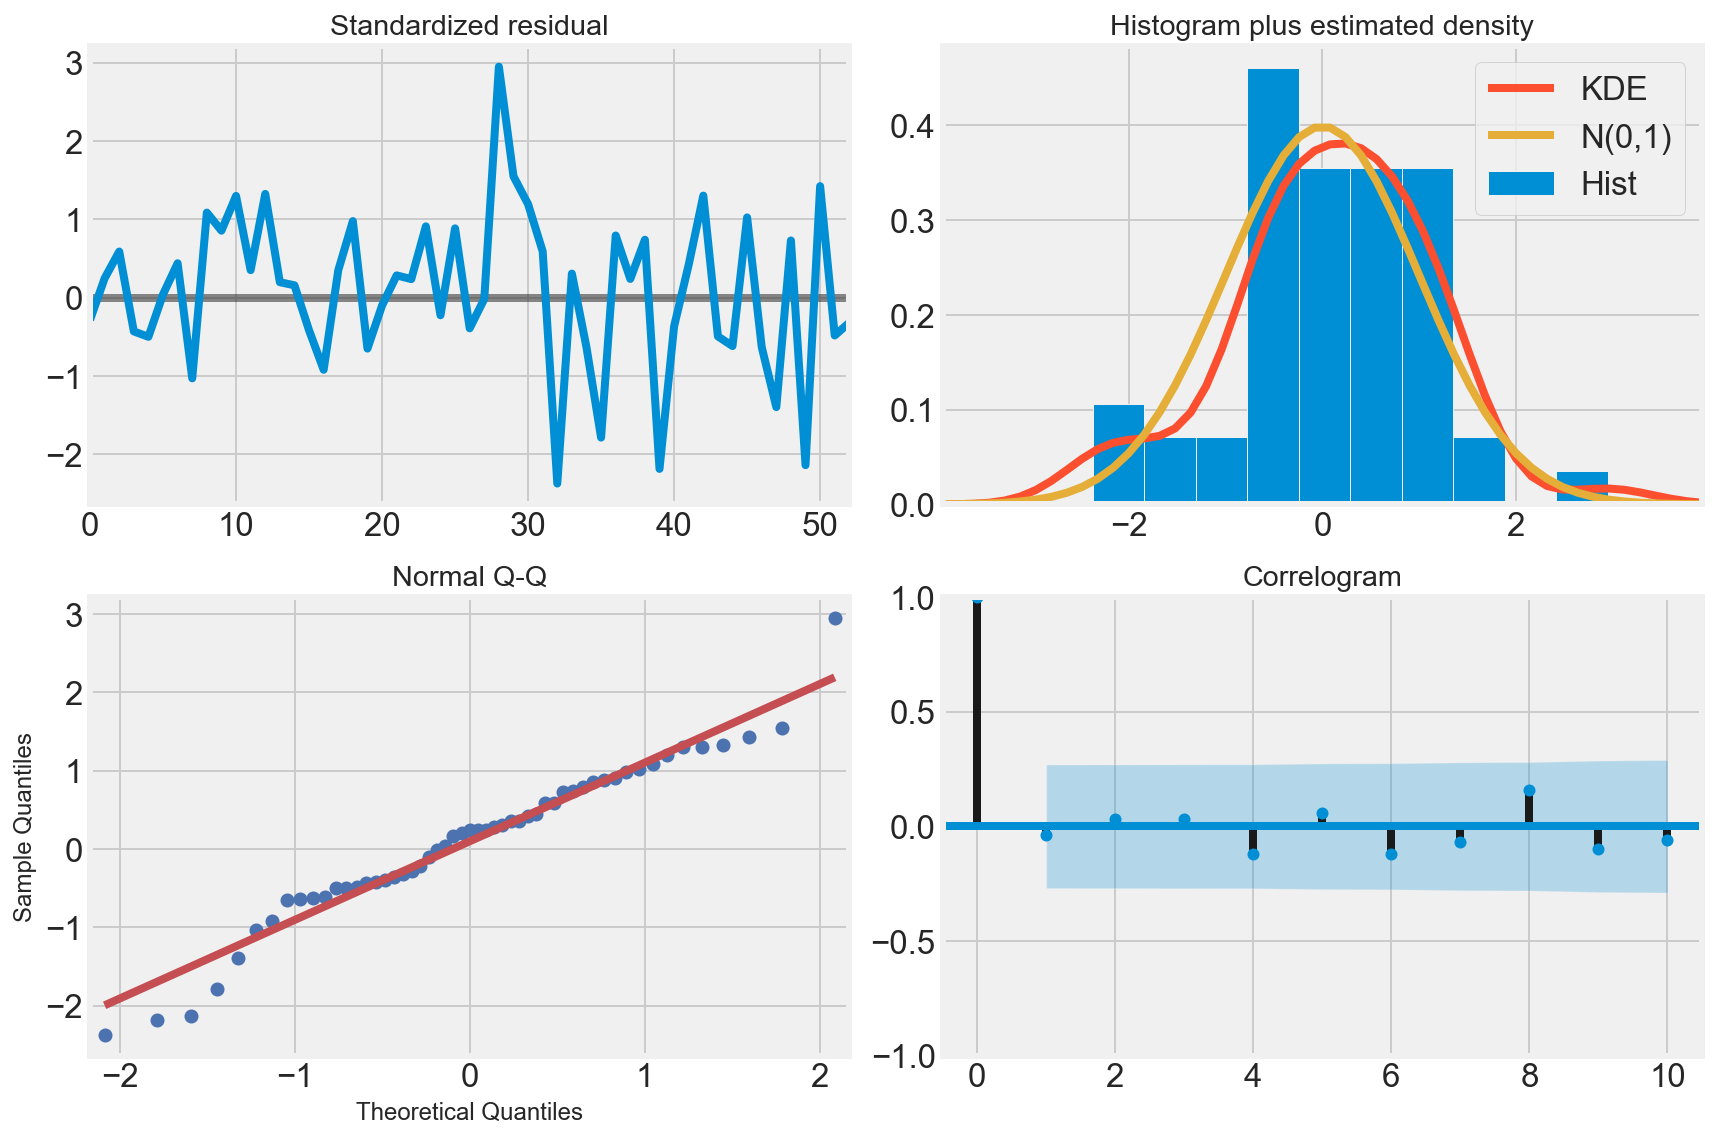



 Model parameters [0. 1. 1. 0.]


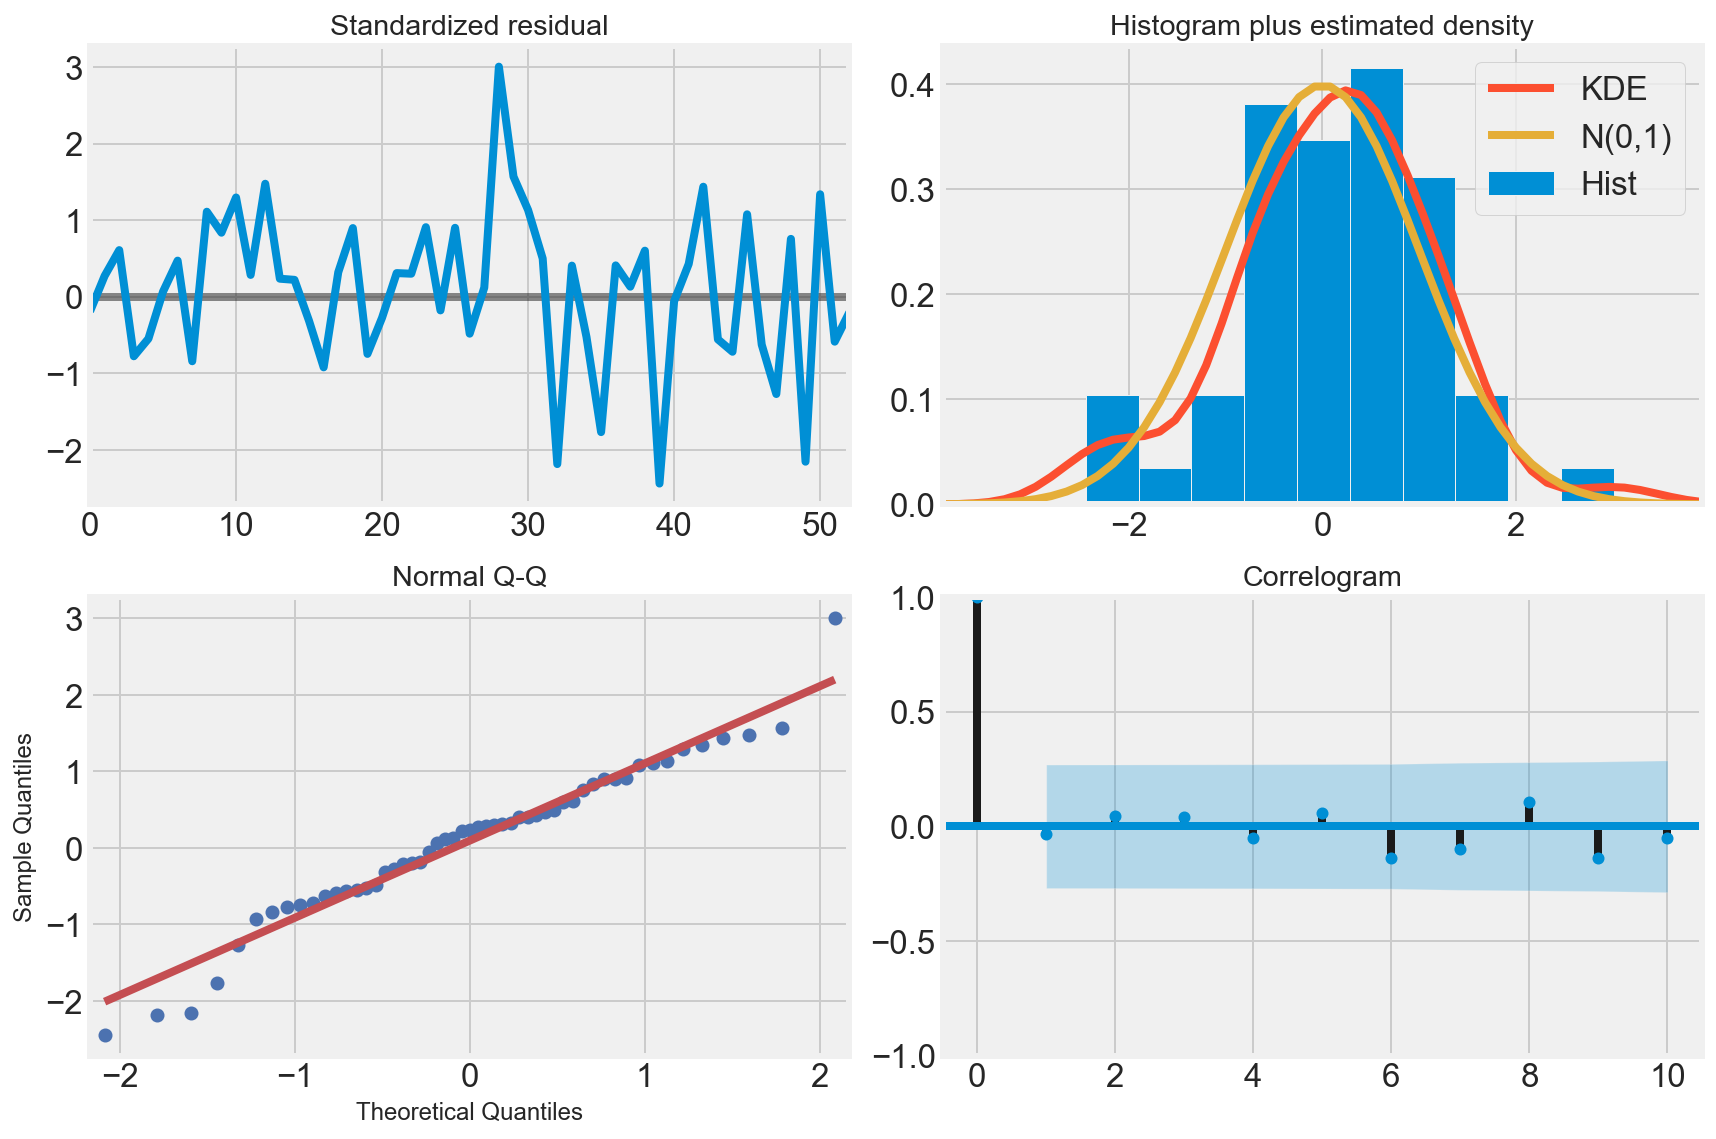



 Model parameters [0. 1. 1. 1.]


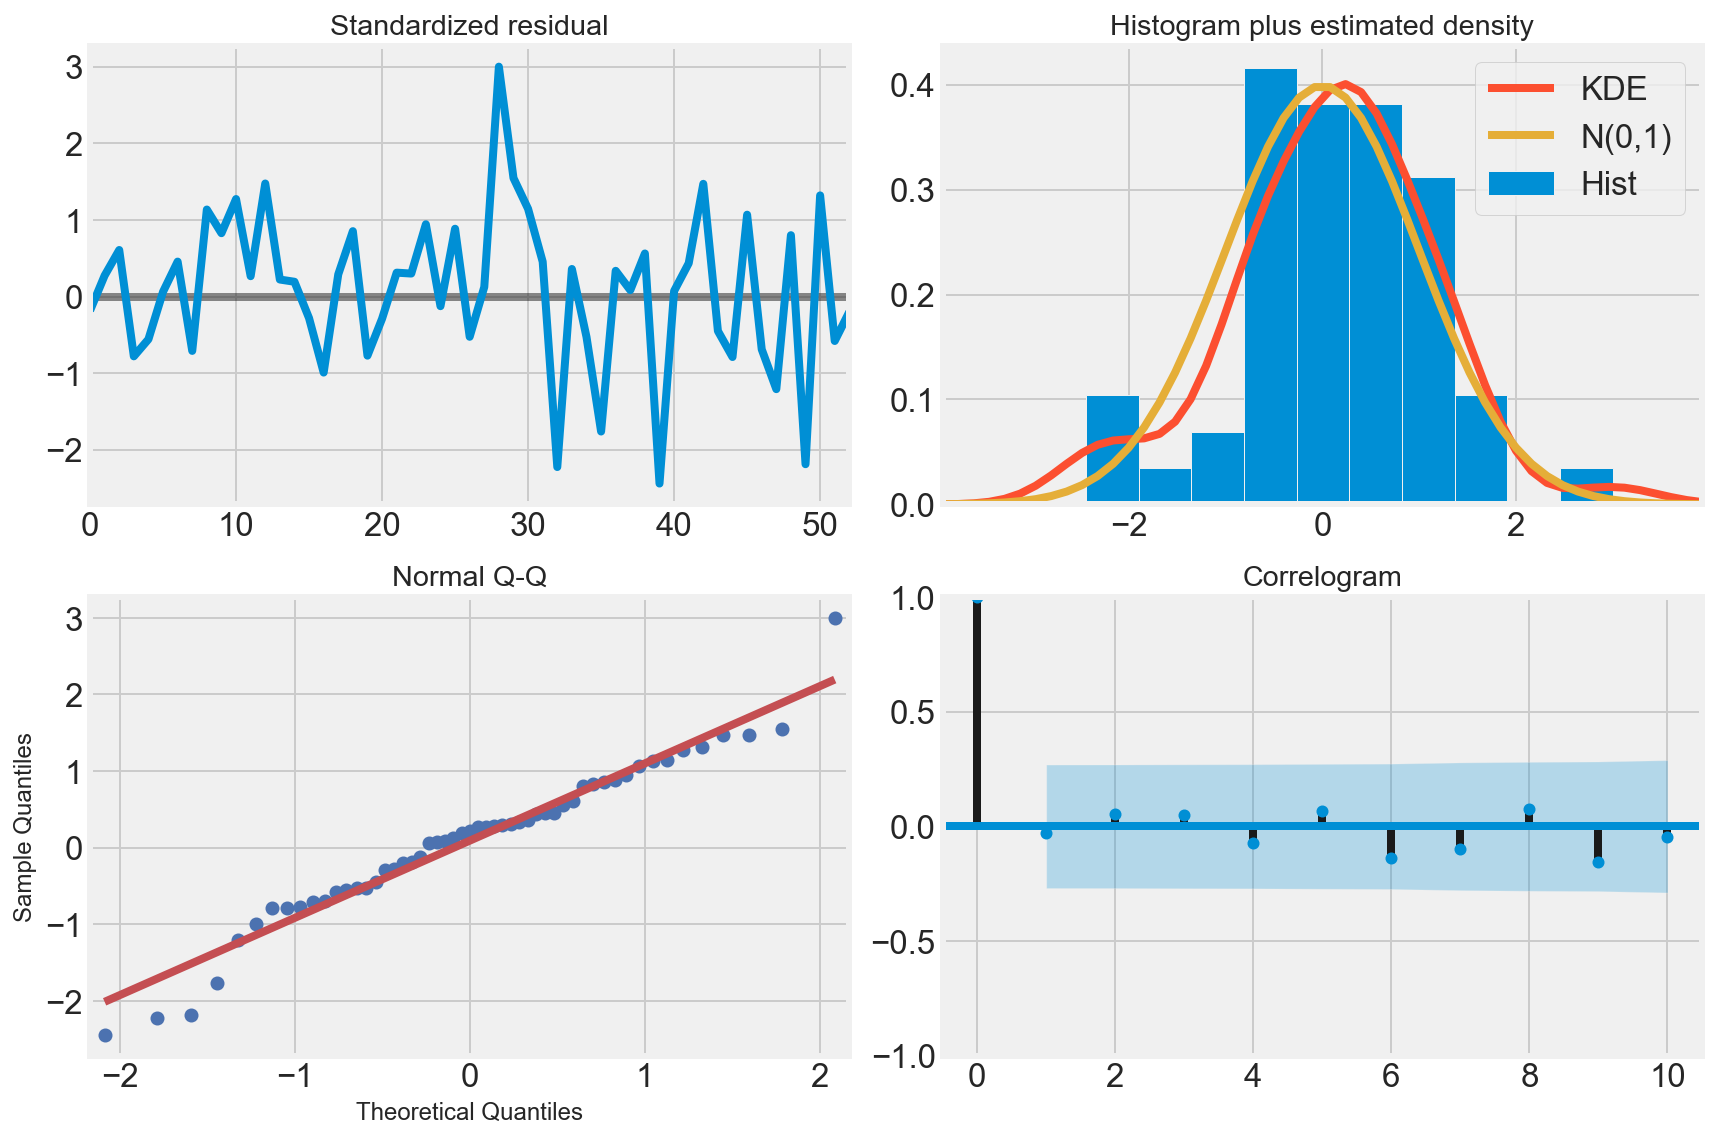



 Model parameters [0. 1. 2. 0.]


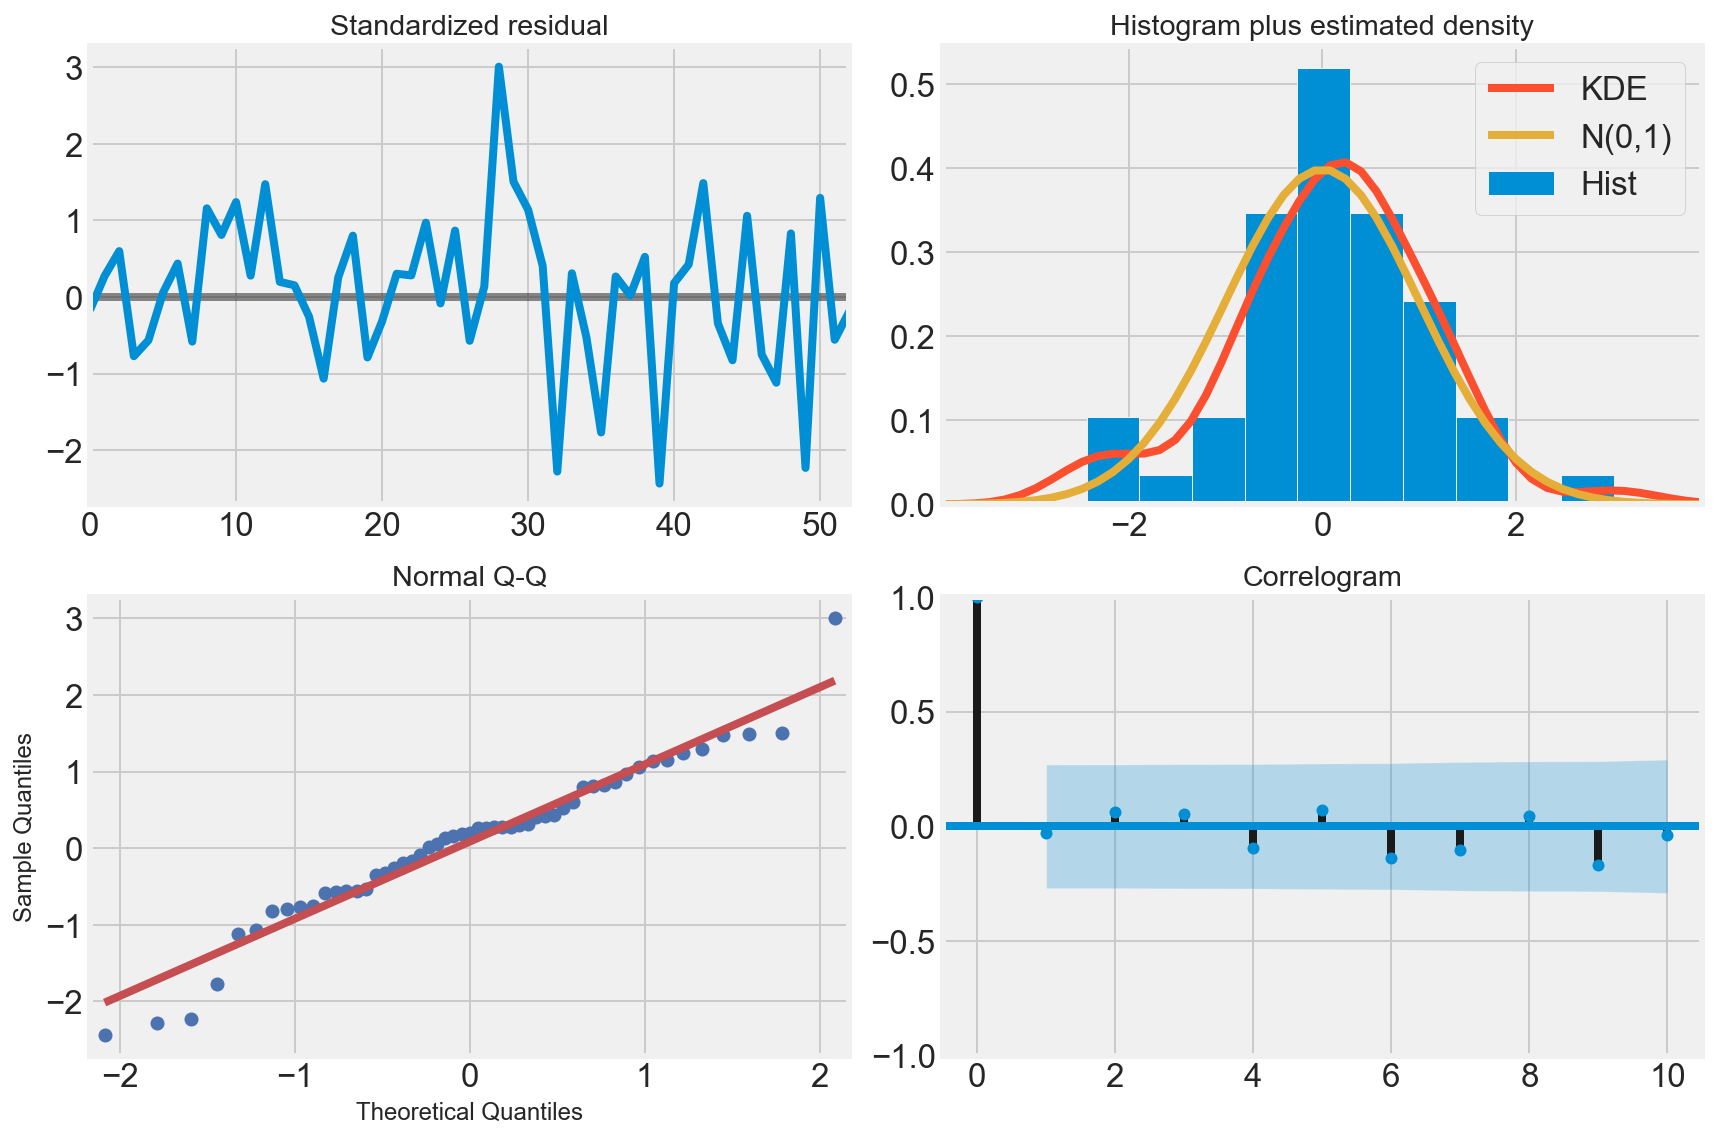



 Model parameters [0. 1. 2. 1.]


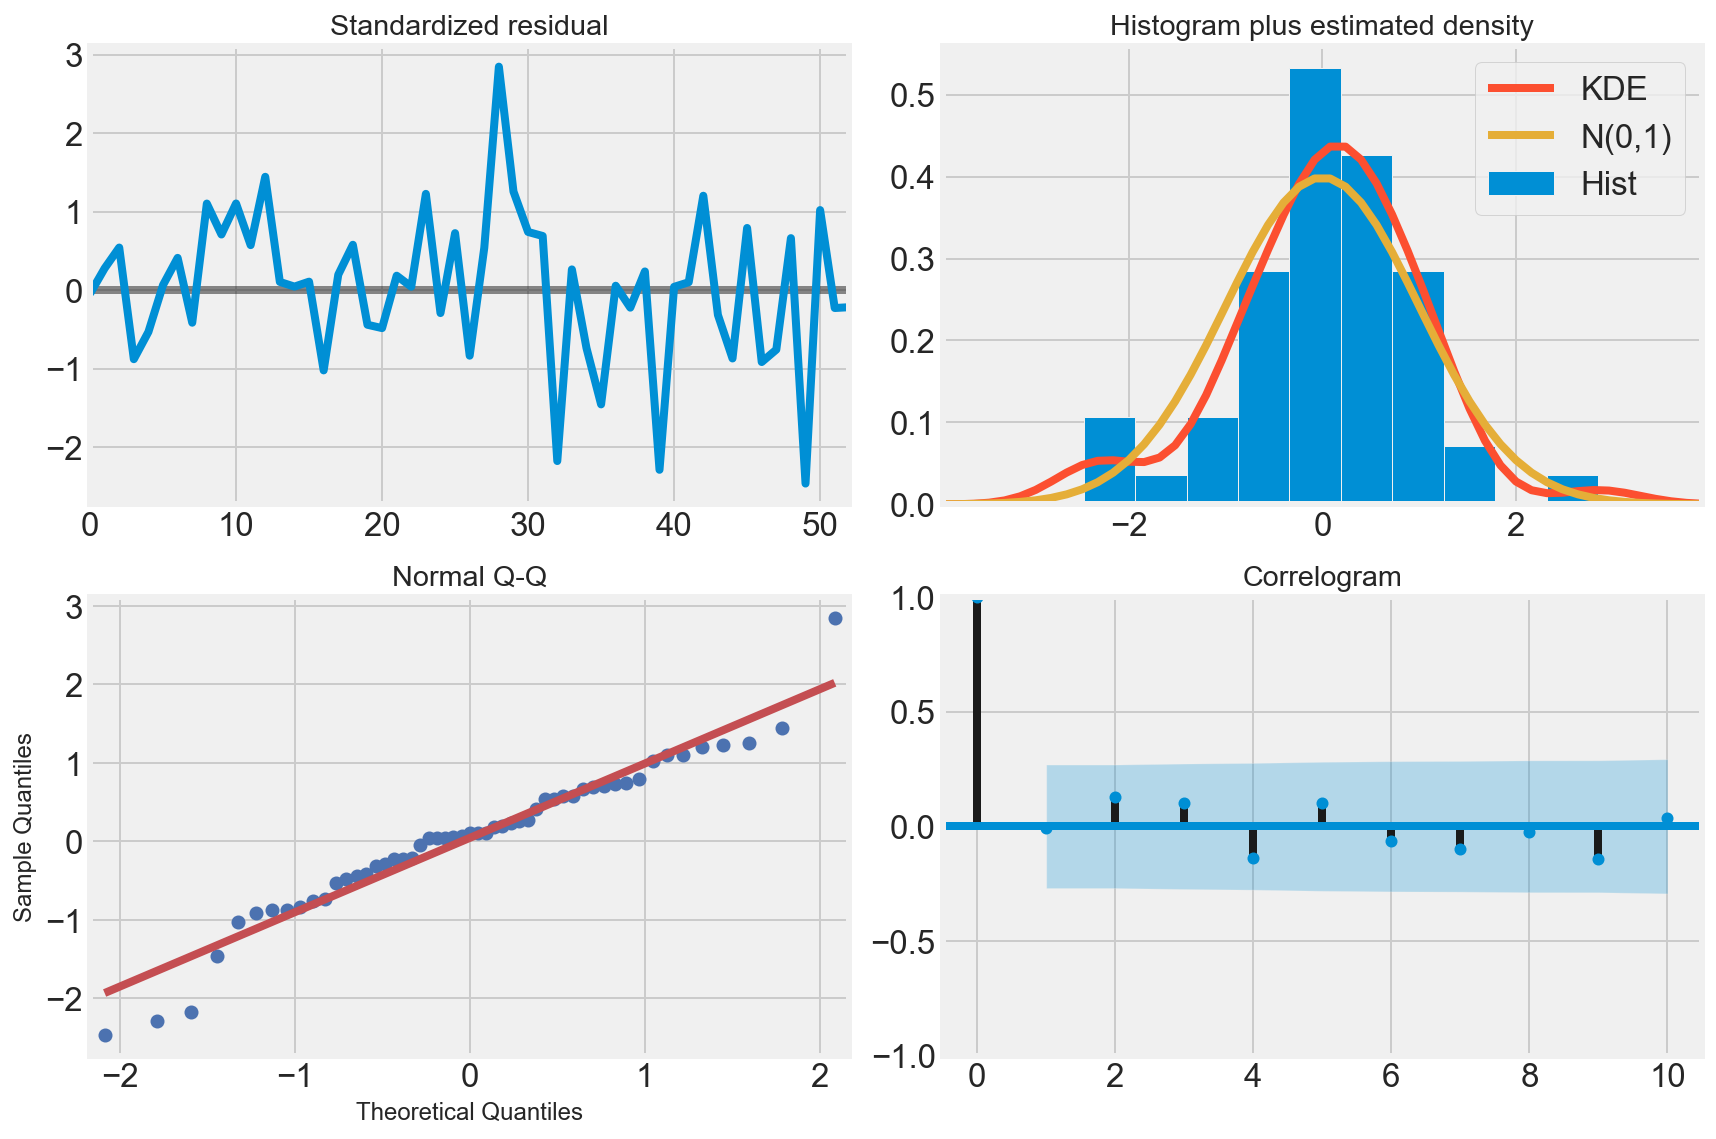



 Model parameters [1. 0. 0. 0.]


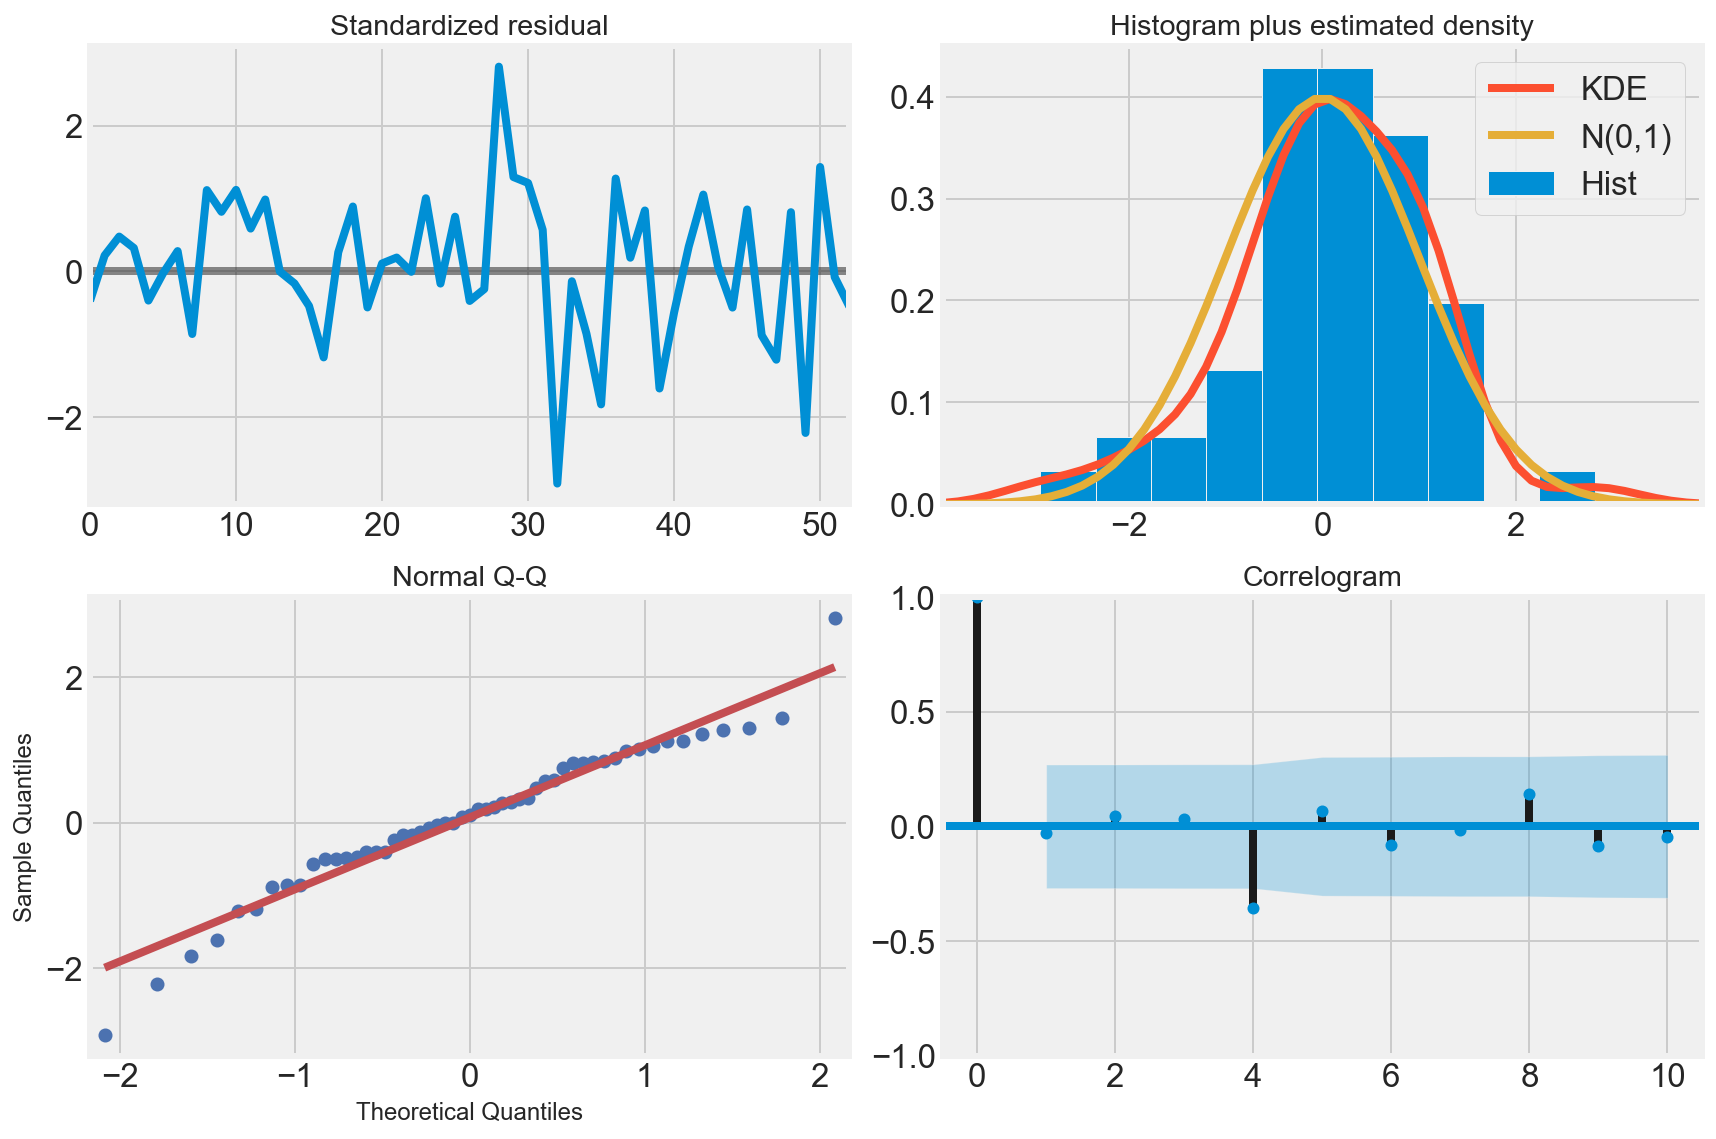



 Model parameters [1. 0. 0. 1.]


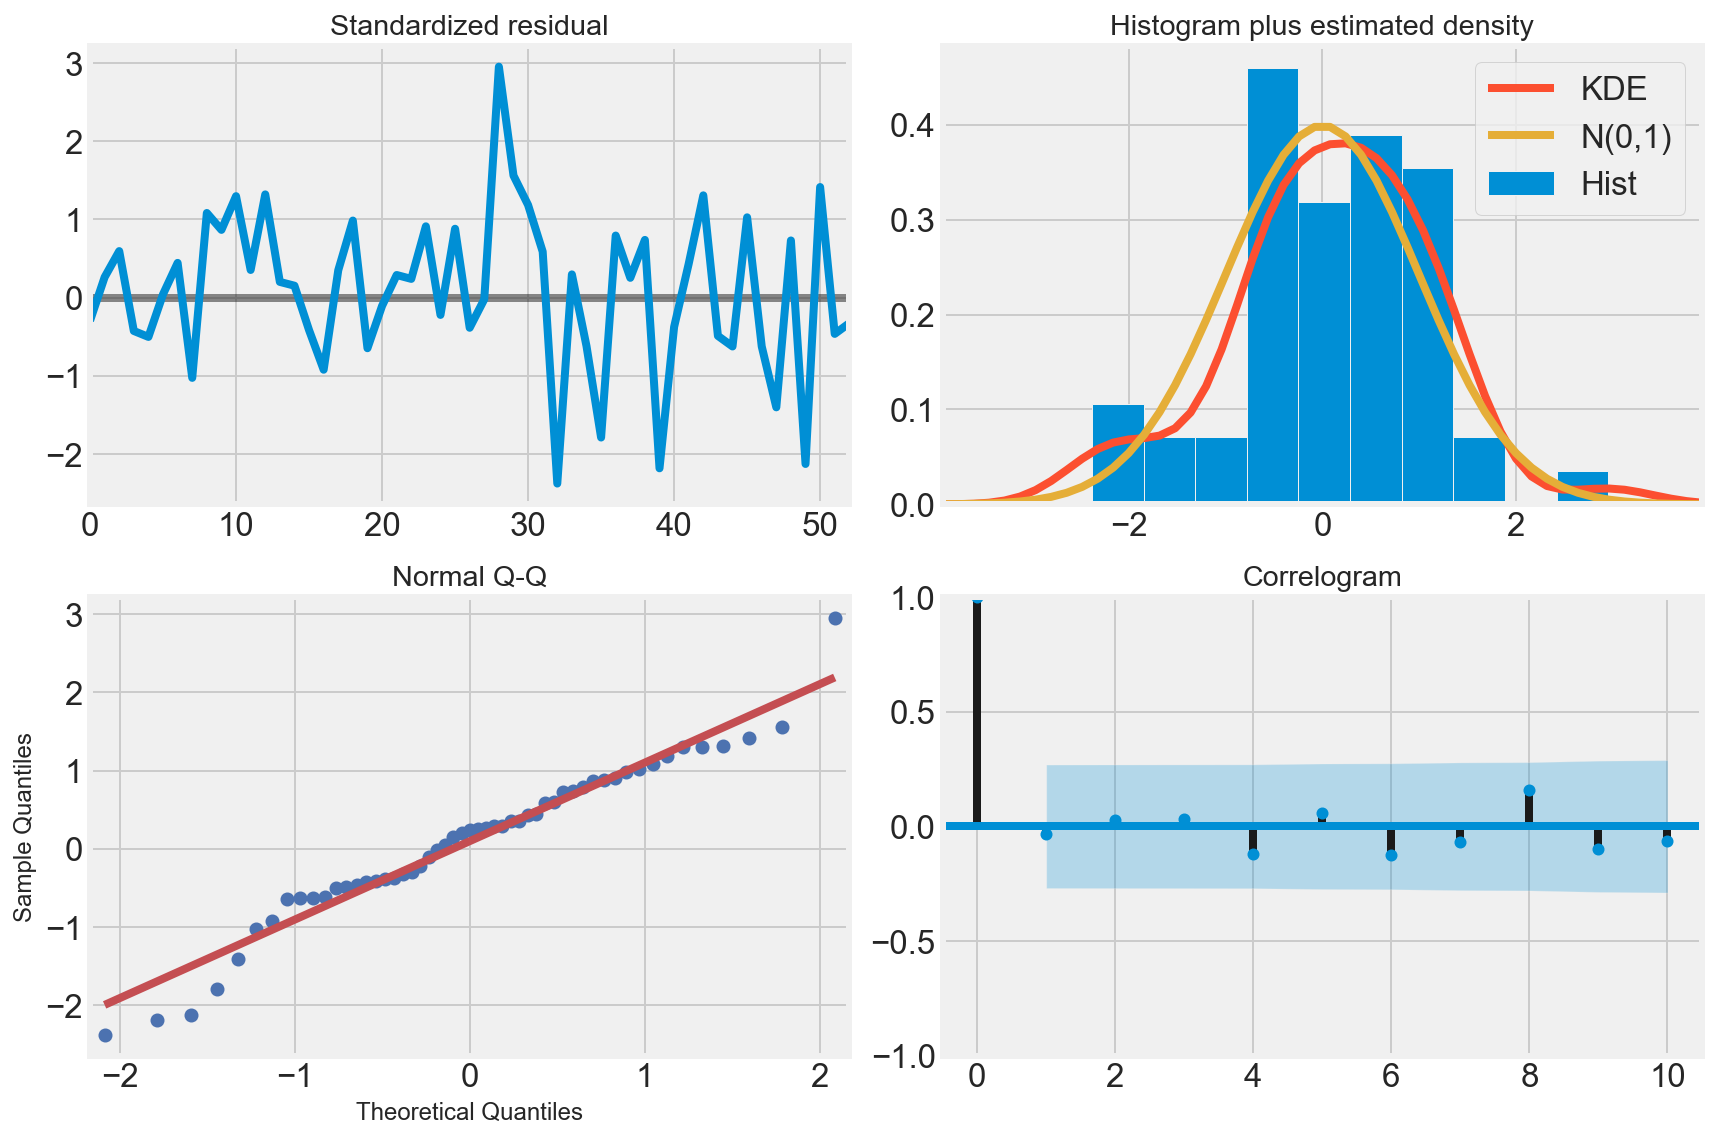



 Model parameters [1. 0. 1. 0.]


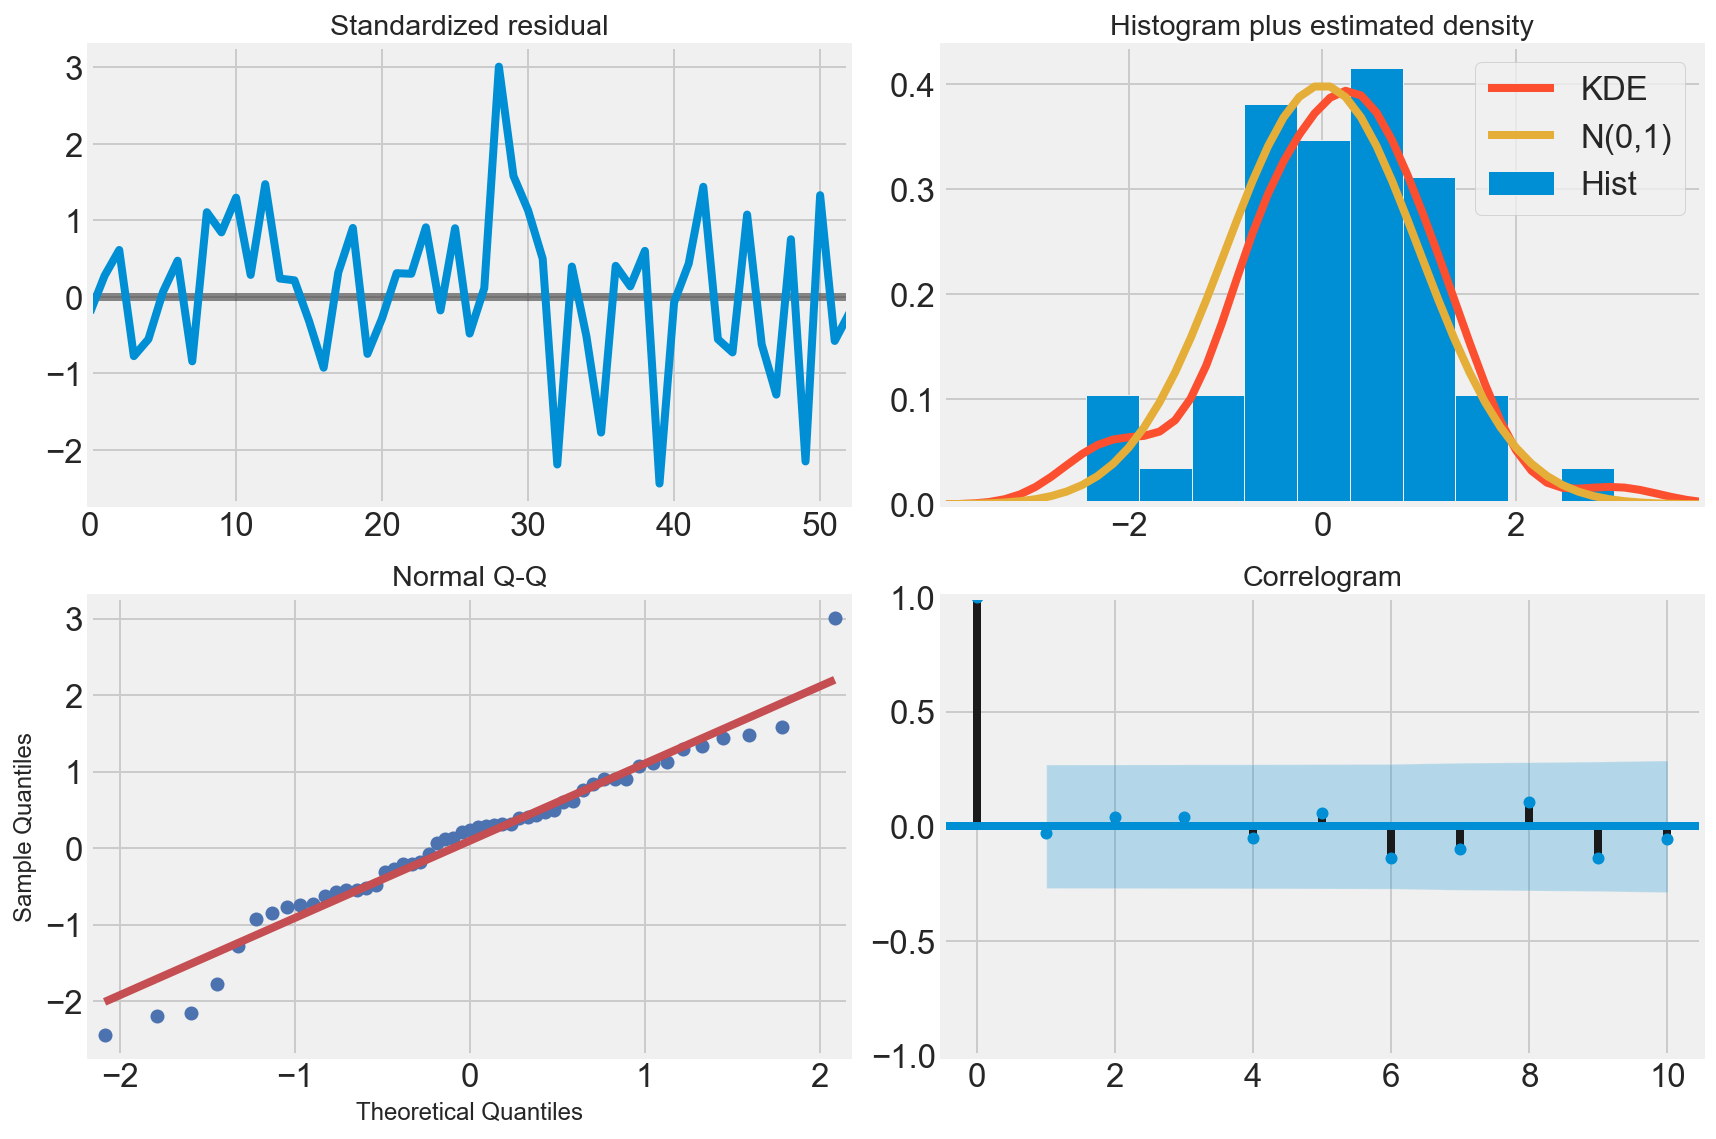



 Model parameters [1. 0. 1. 1.]


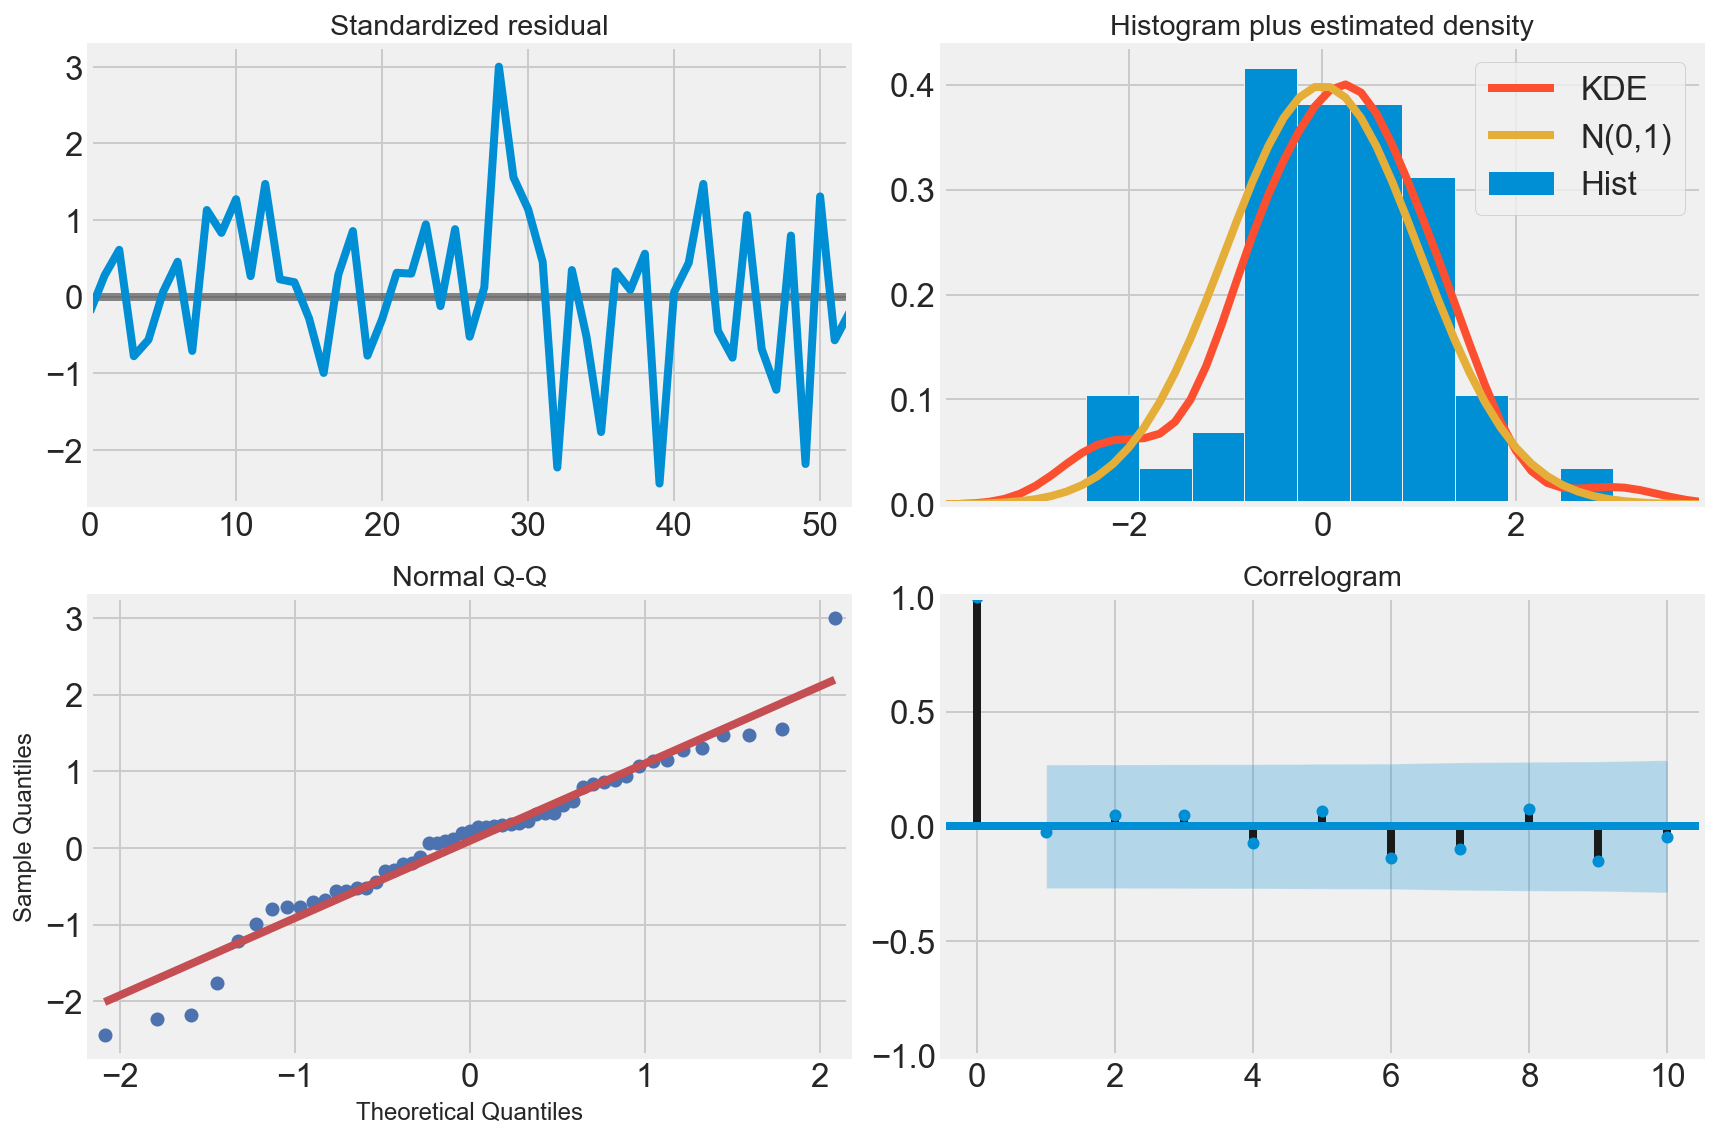



 Model parameters [1. 0. 2. 0.]


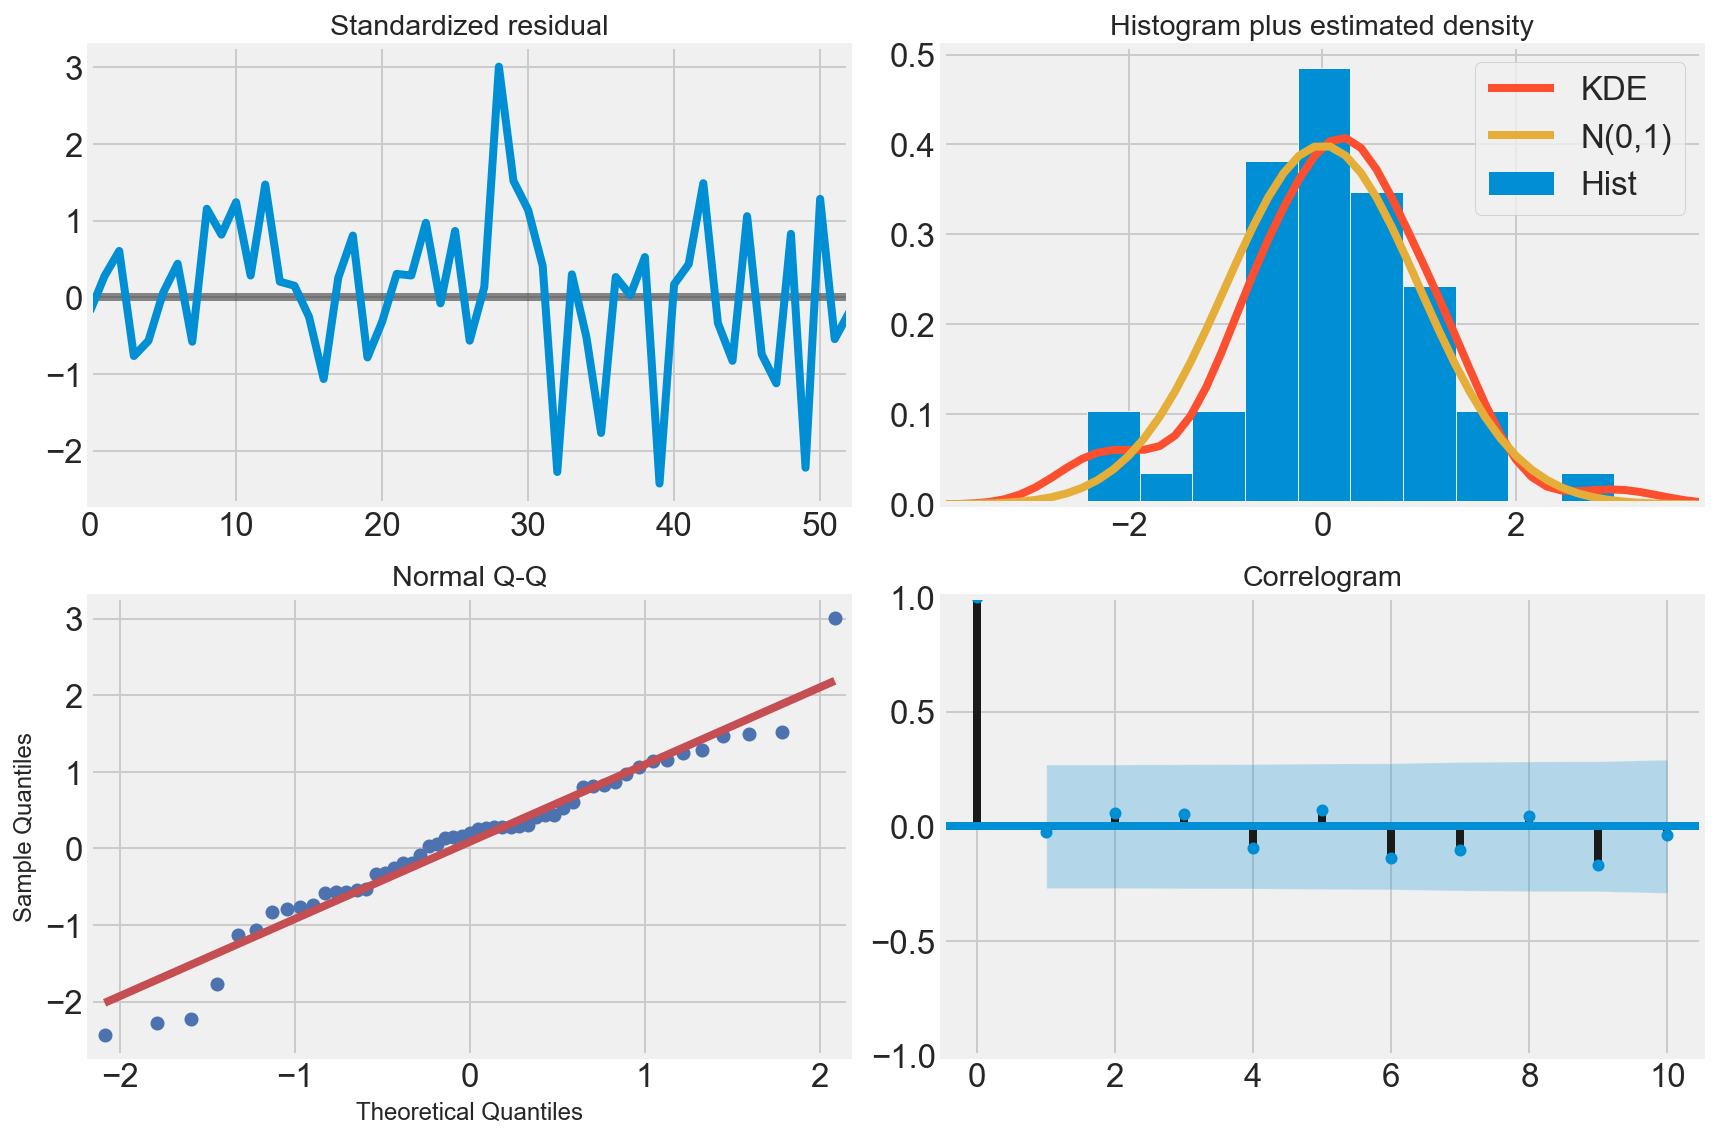



 Model parameters [1. 0. 2. 1.]


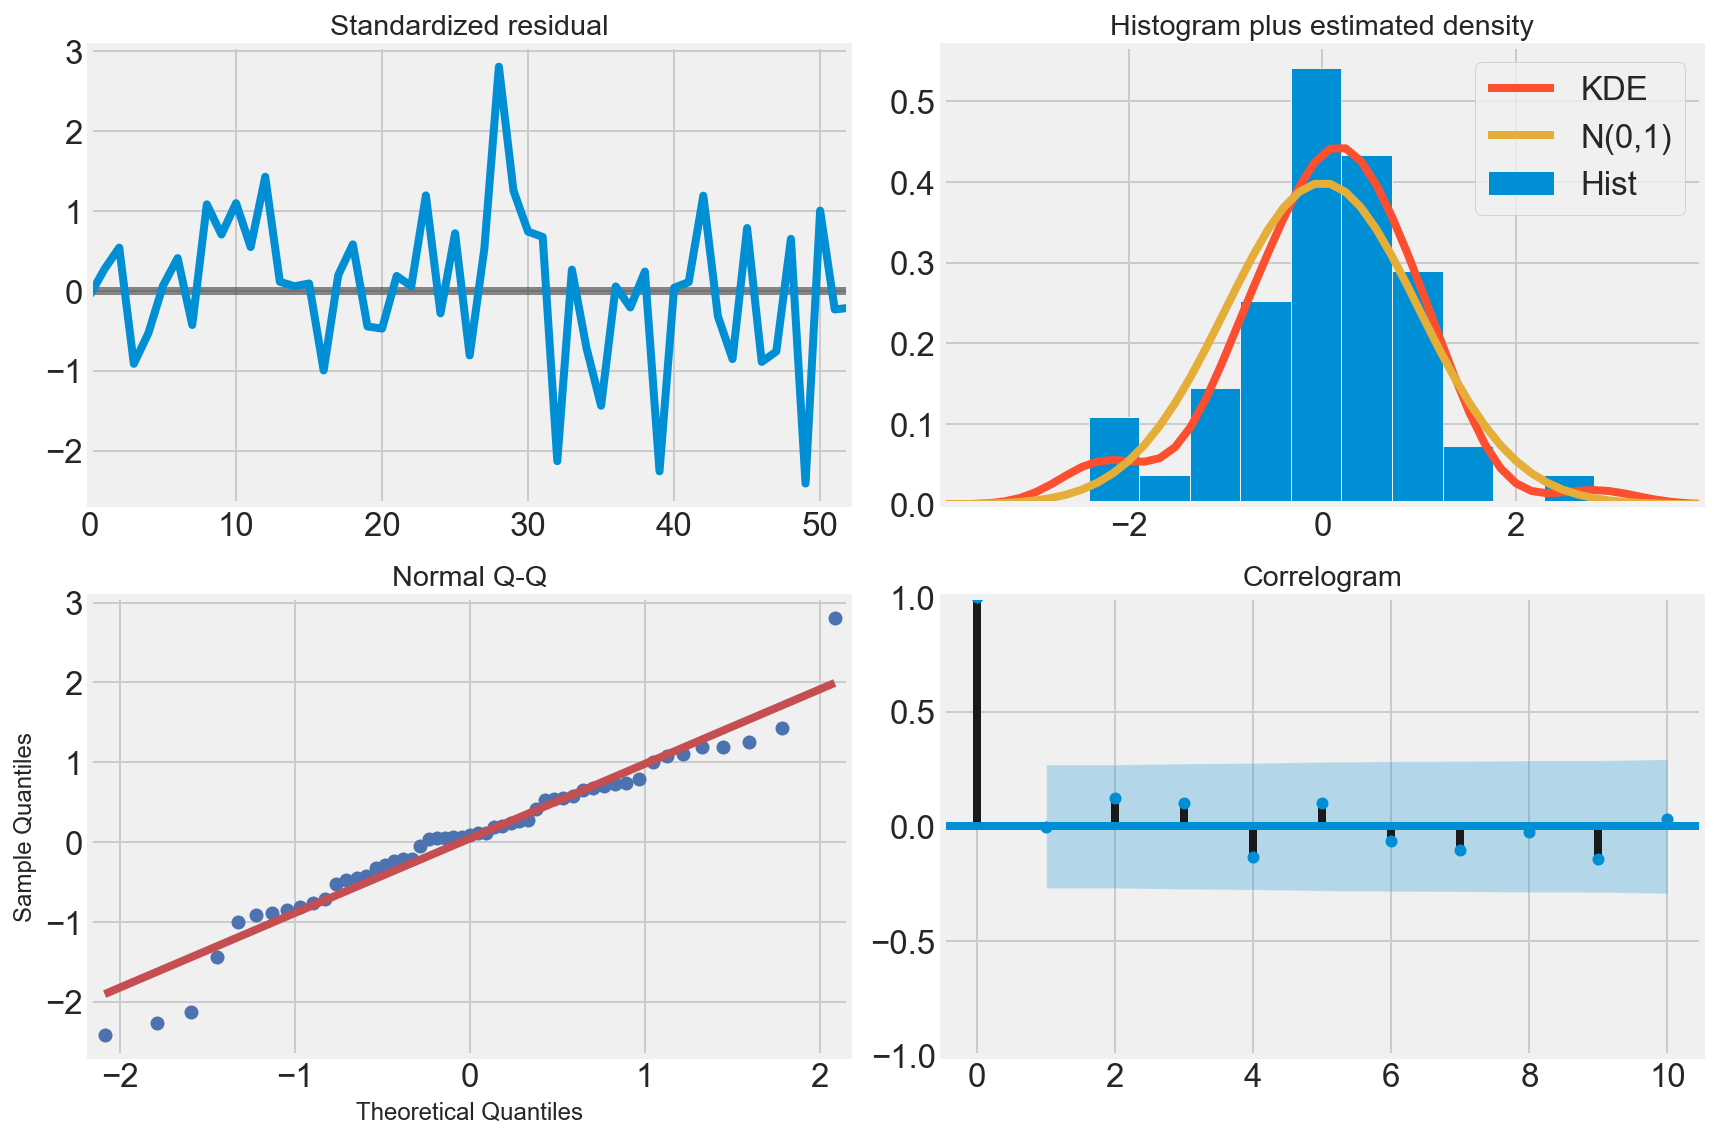



 Model parameters [1. 1. 0. 0.]


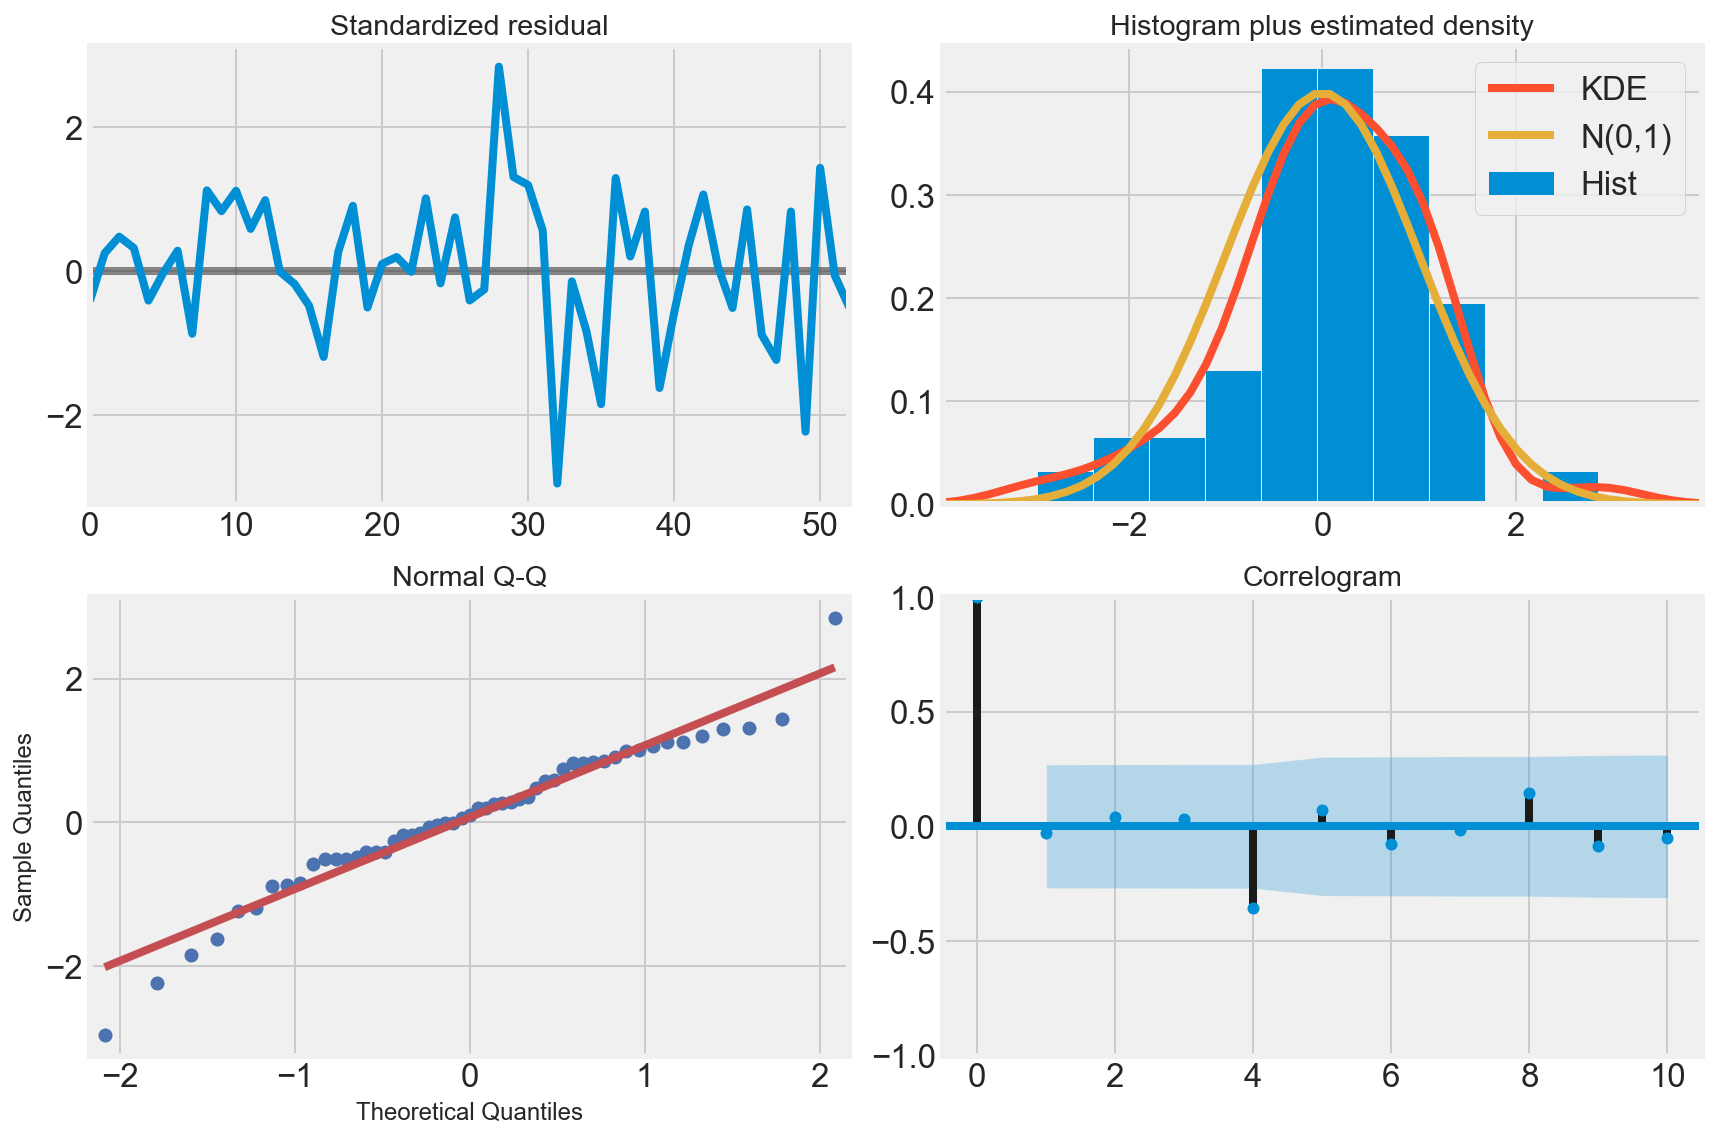



 Model parameters [1. 1. 0. 1.]


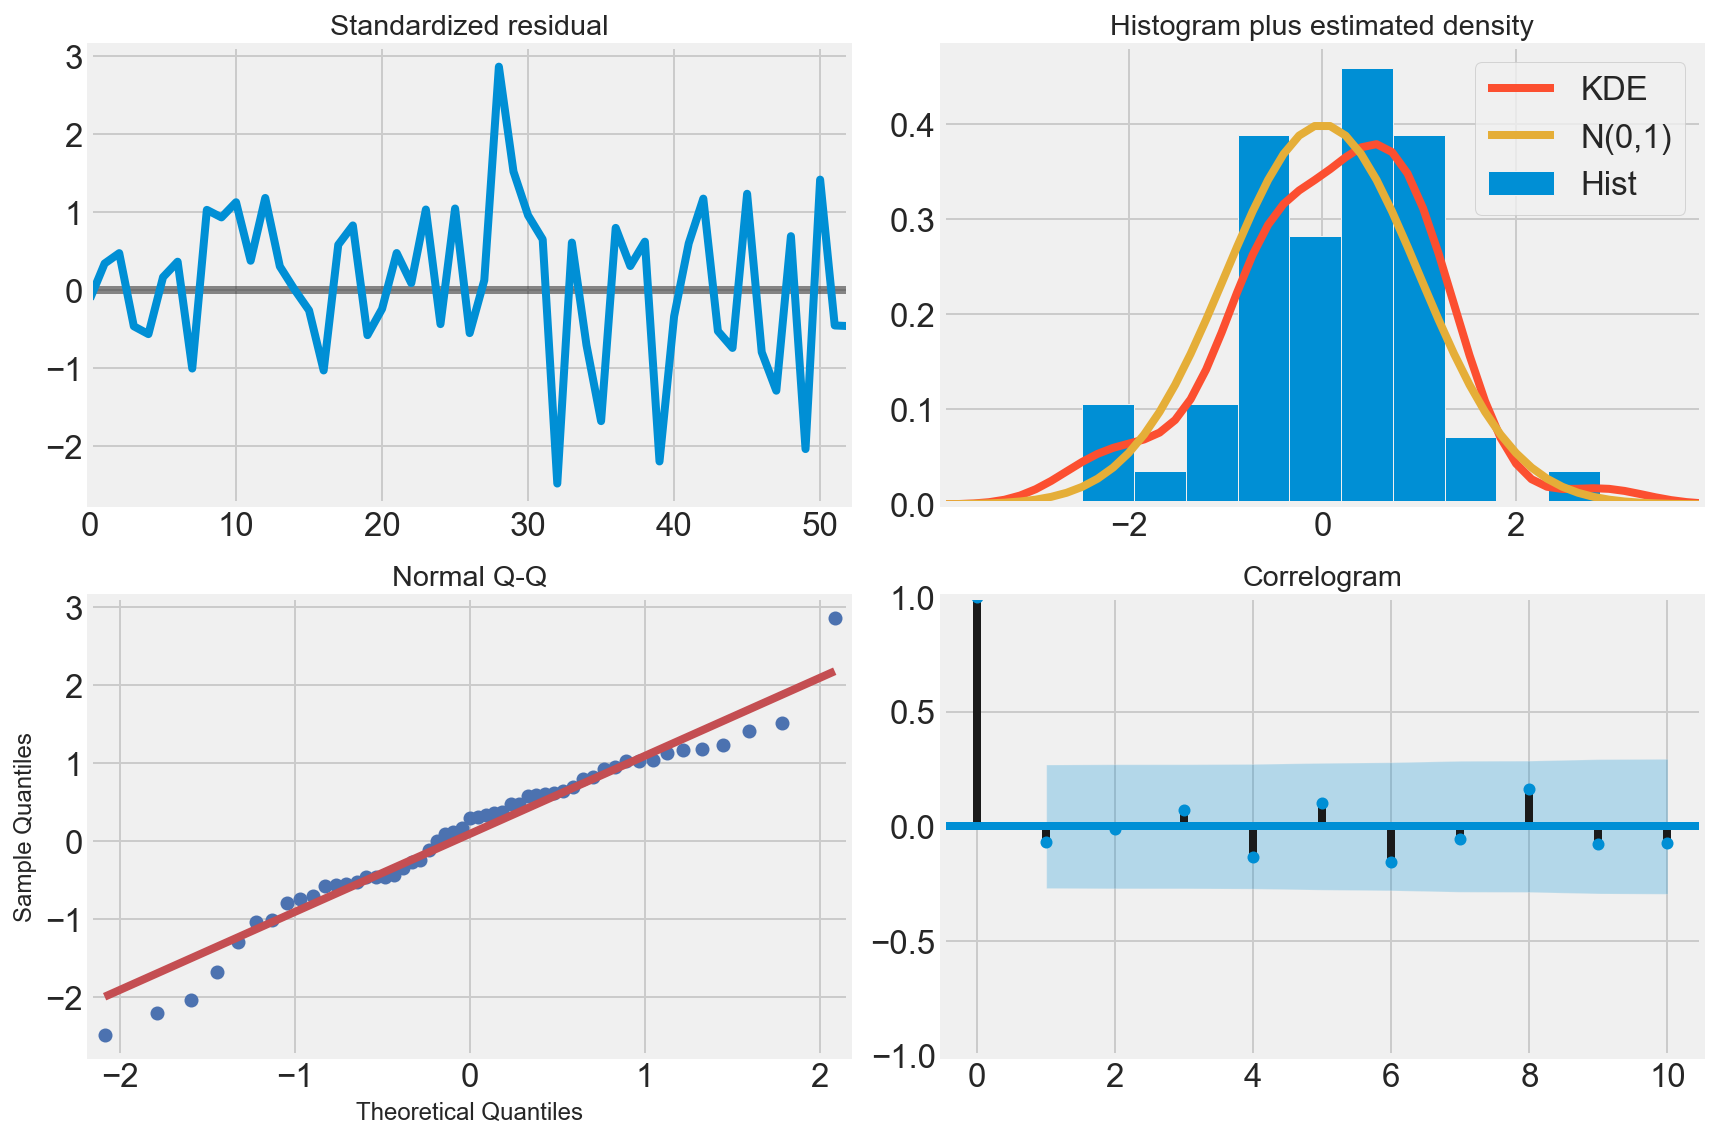



 Model parameters [1. 1. 1. 0.]


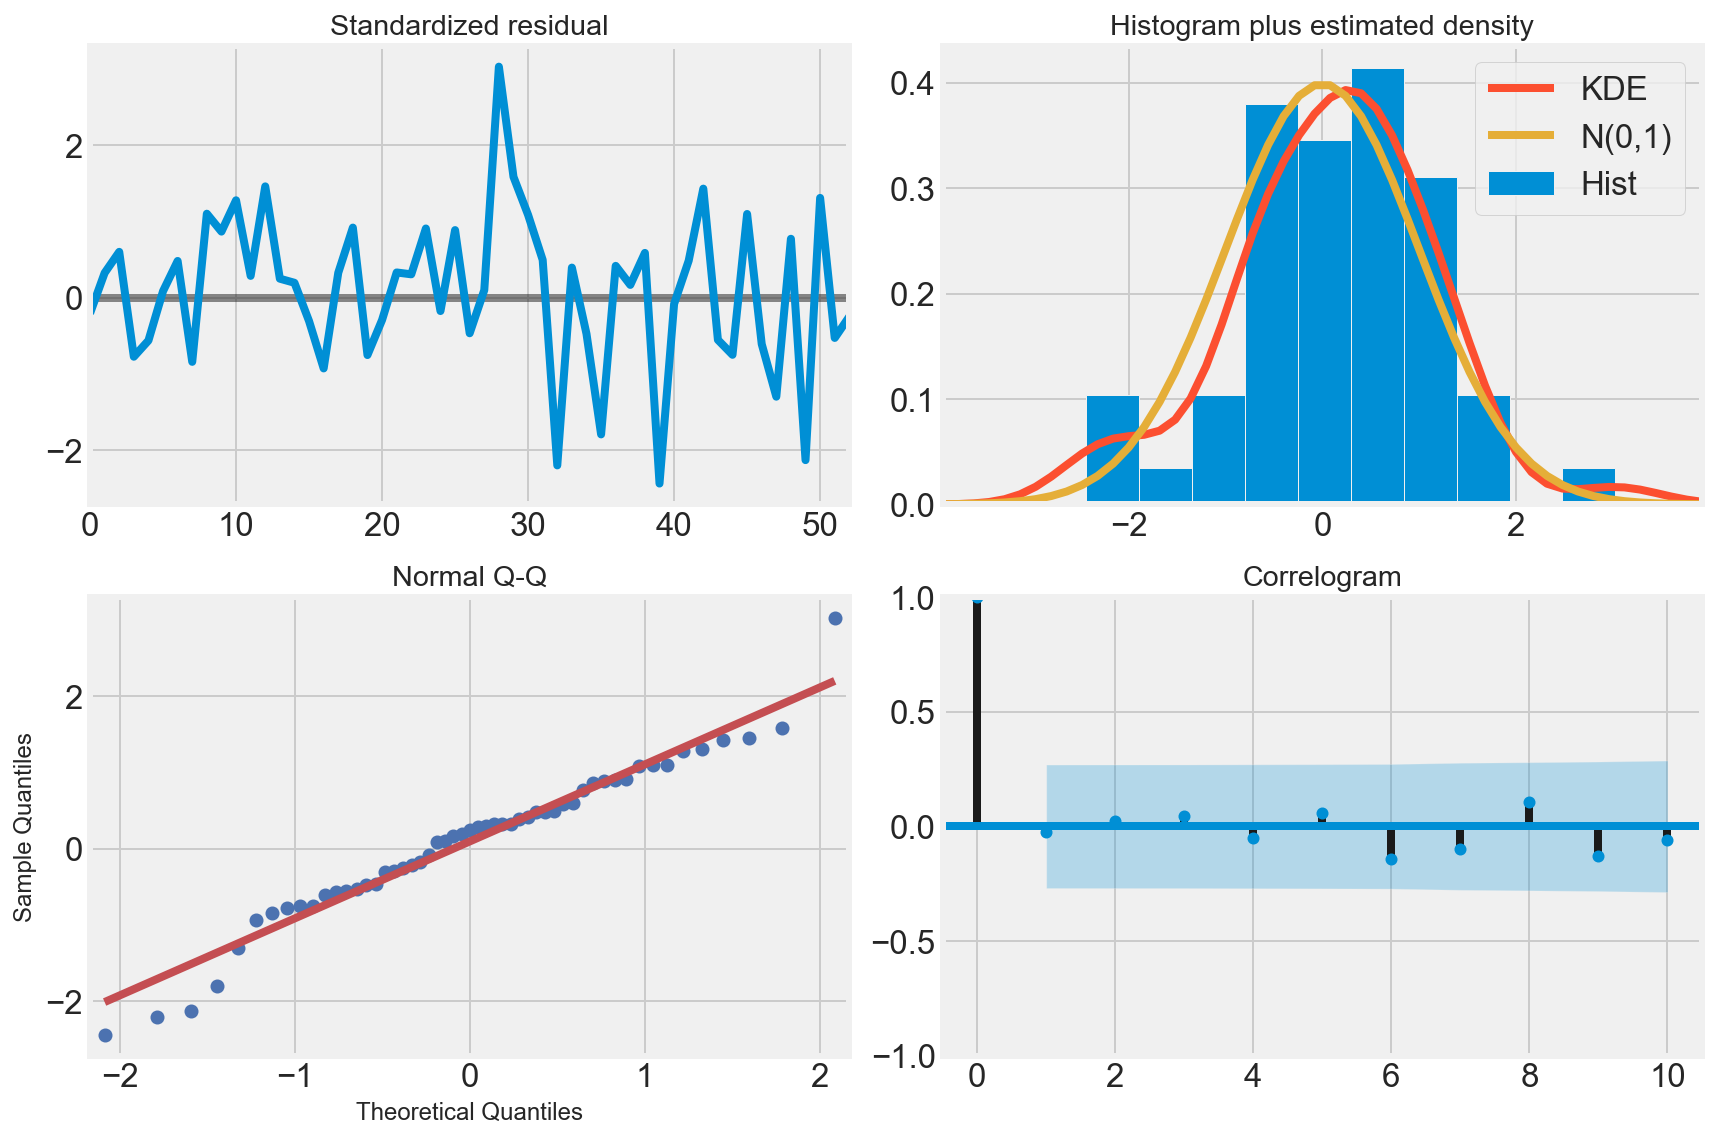



 Model parameters [1. 1. 1. 1.]


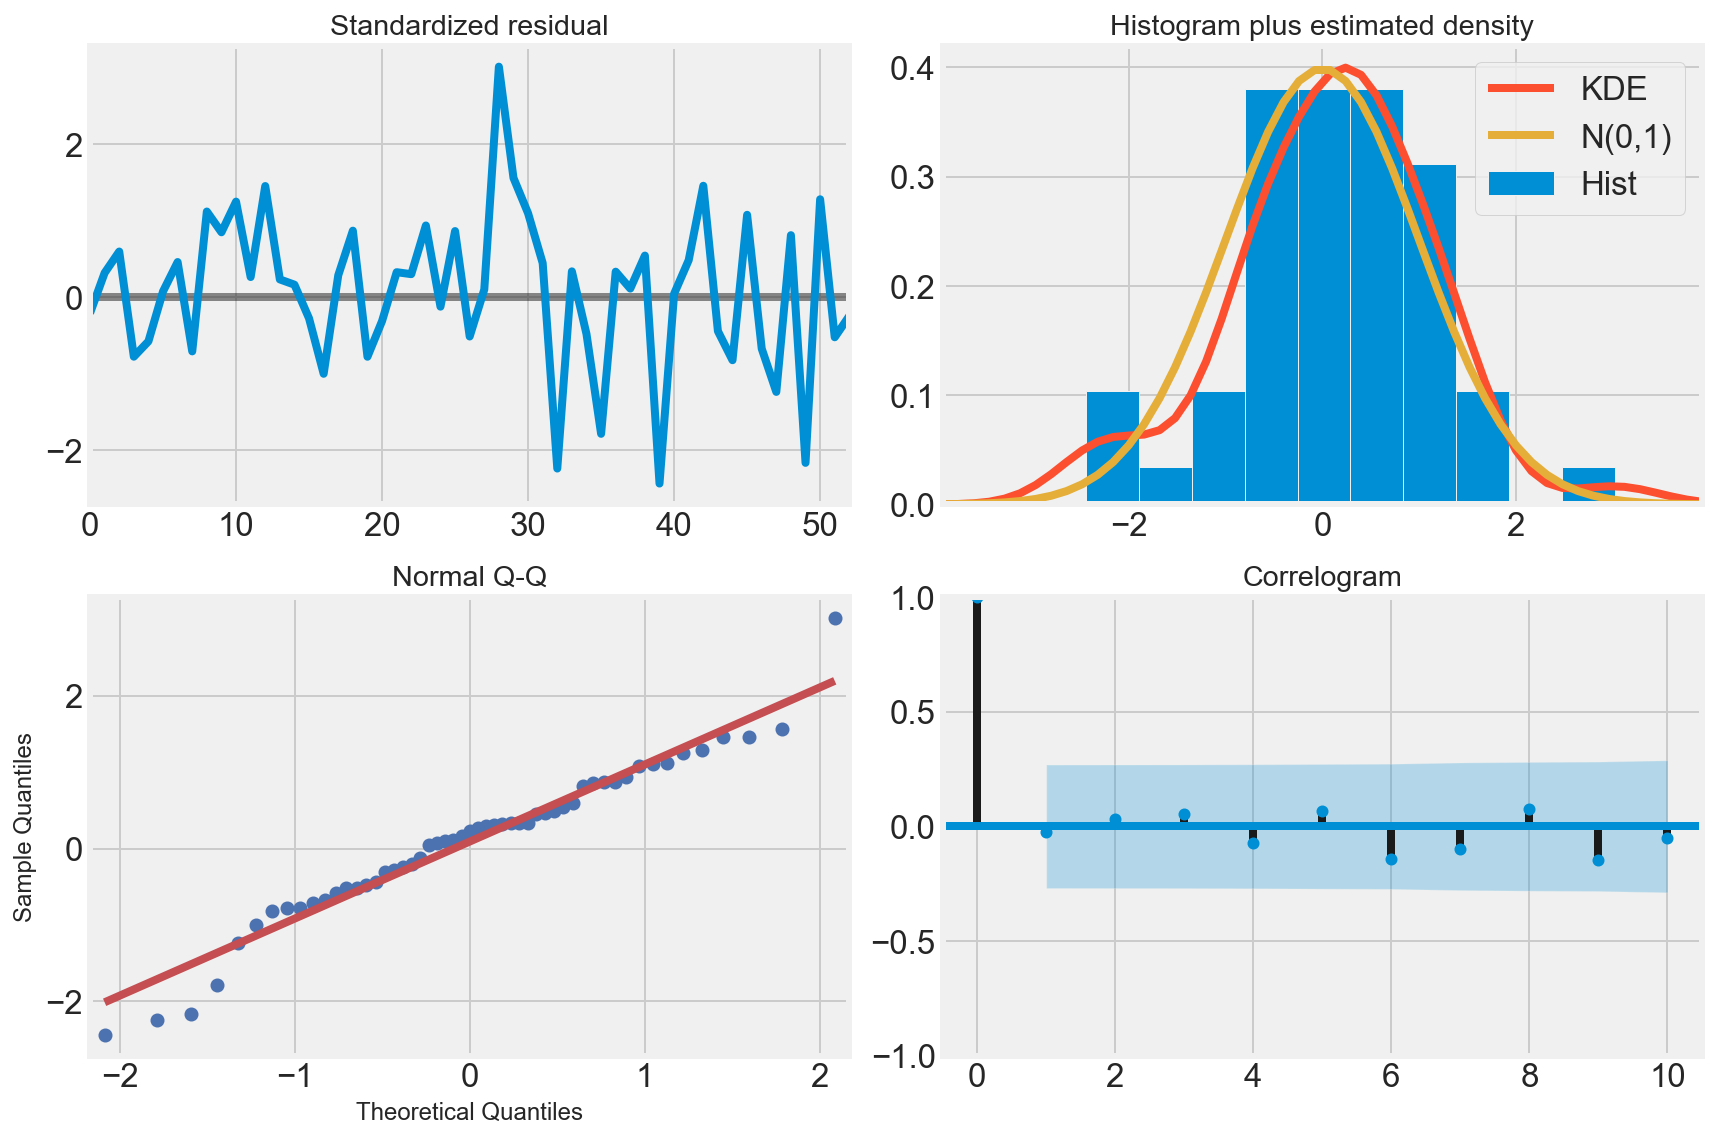



 Model parameters [1. 1. 2. 0.]


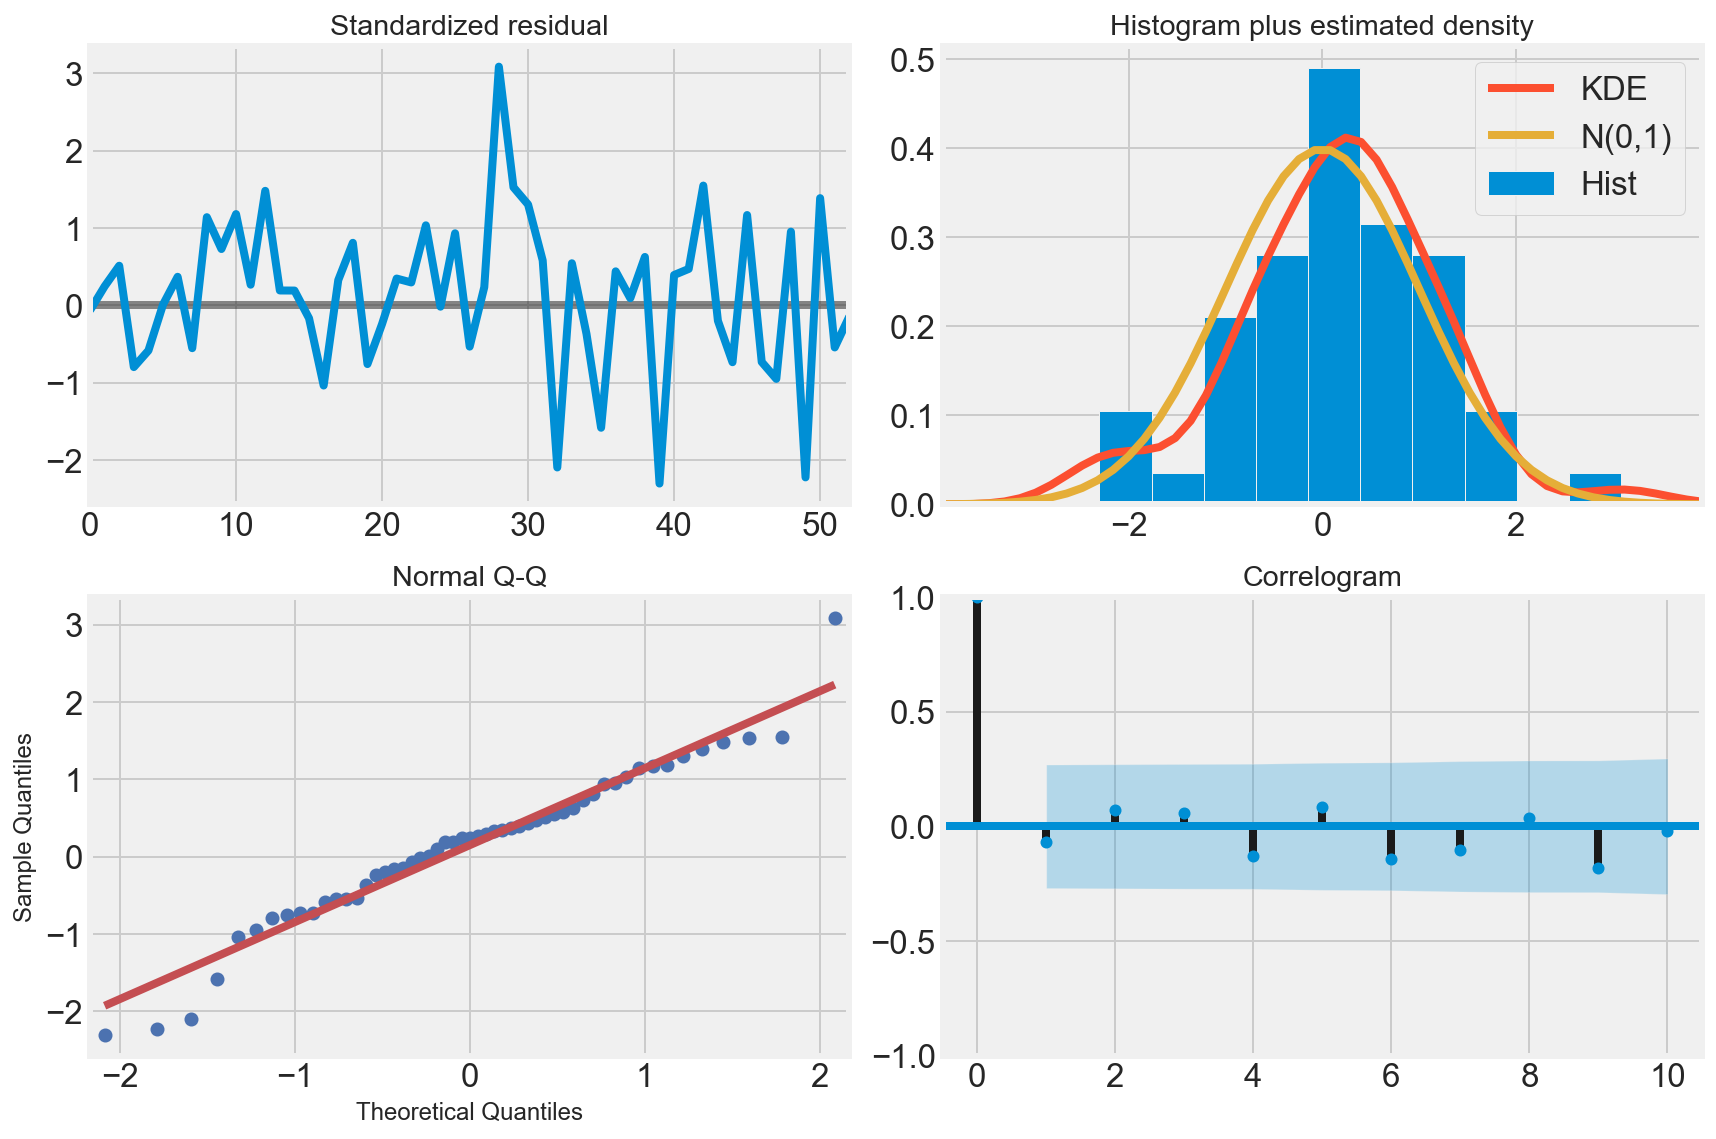



 Model parameters [1. 1. 2. 1.]


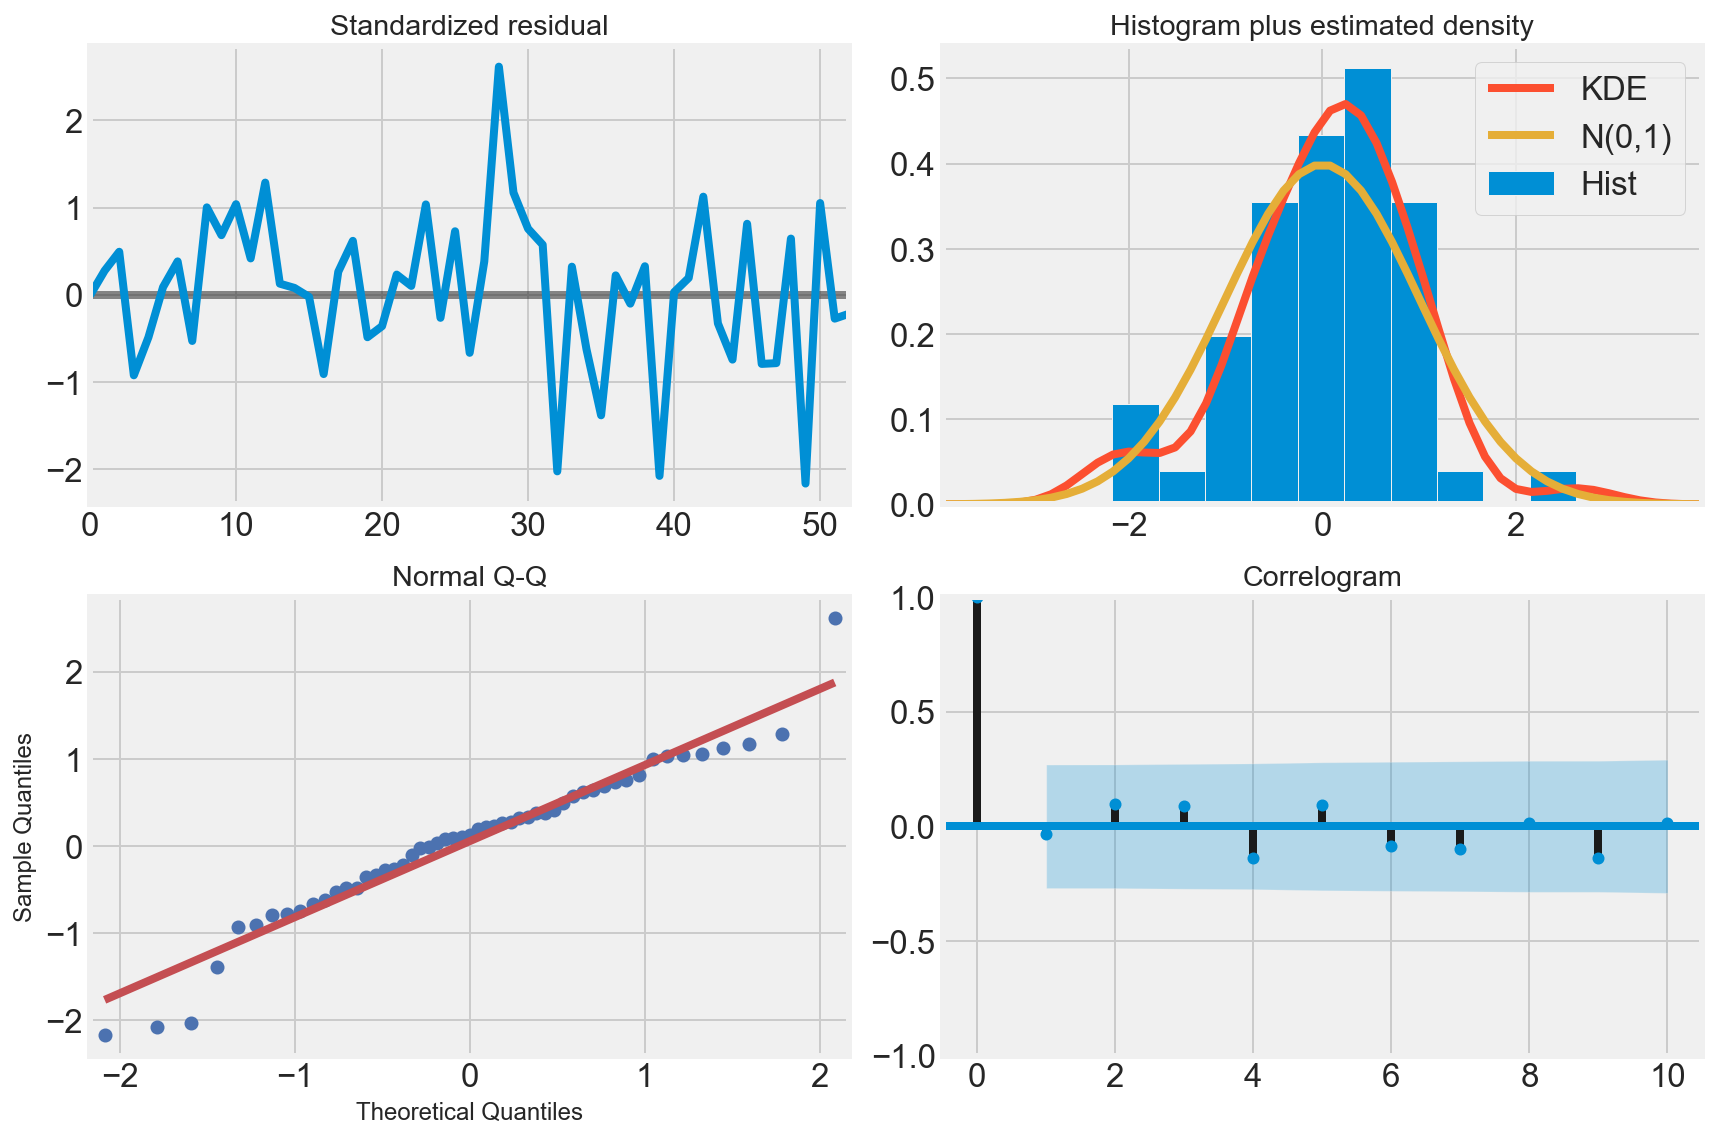



 Model parameters [2. 0. 0. 0.]


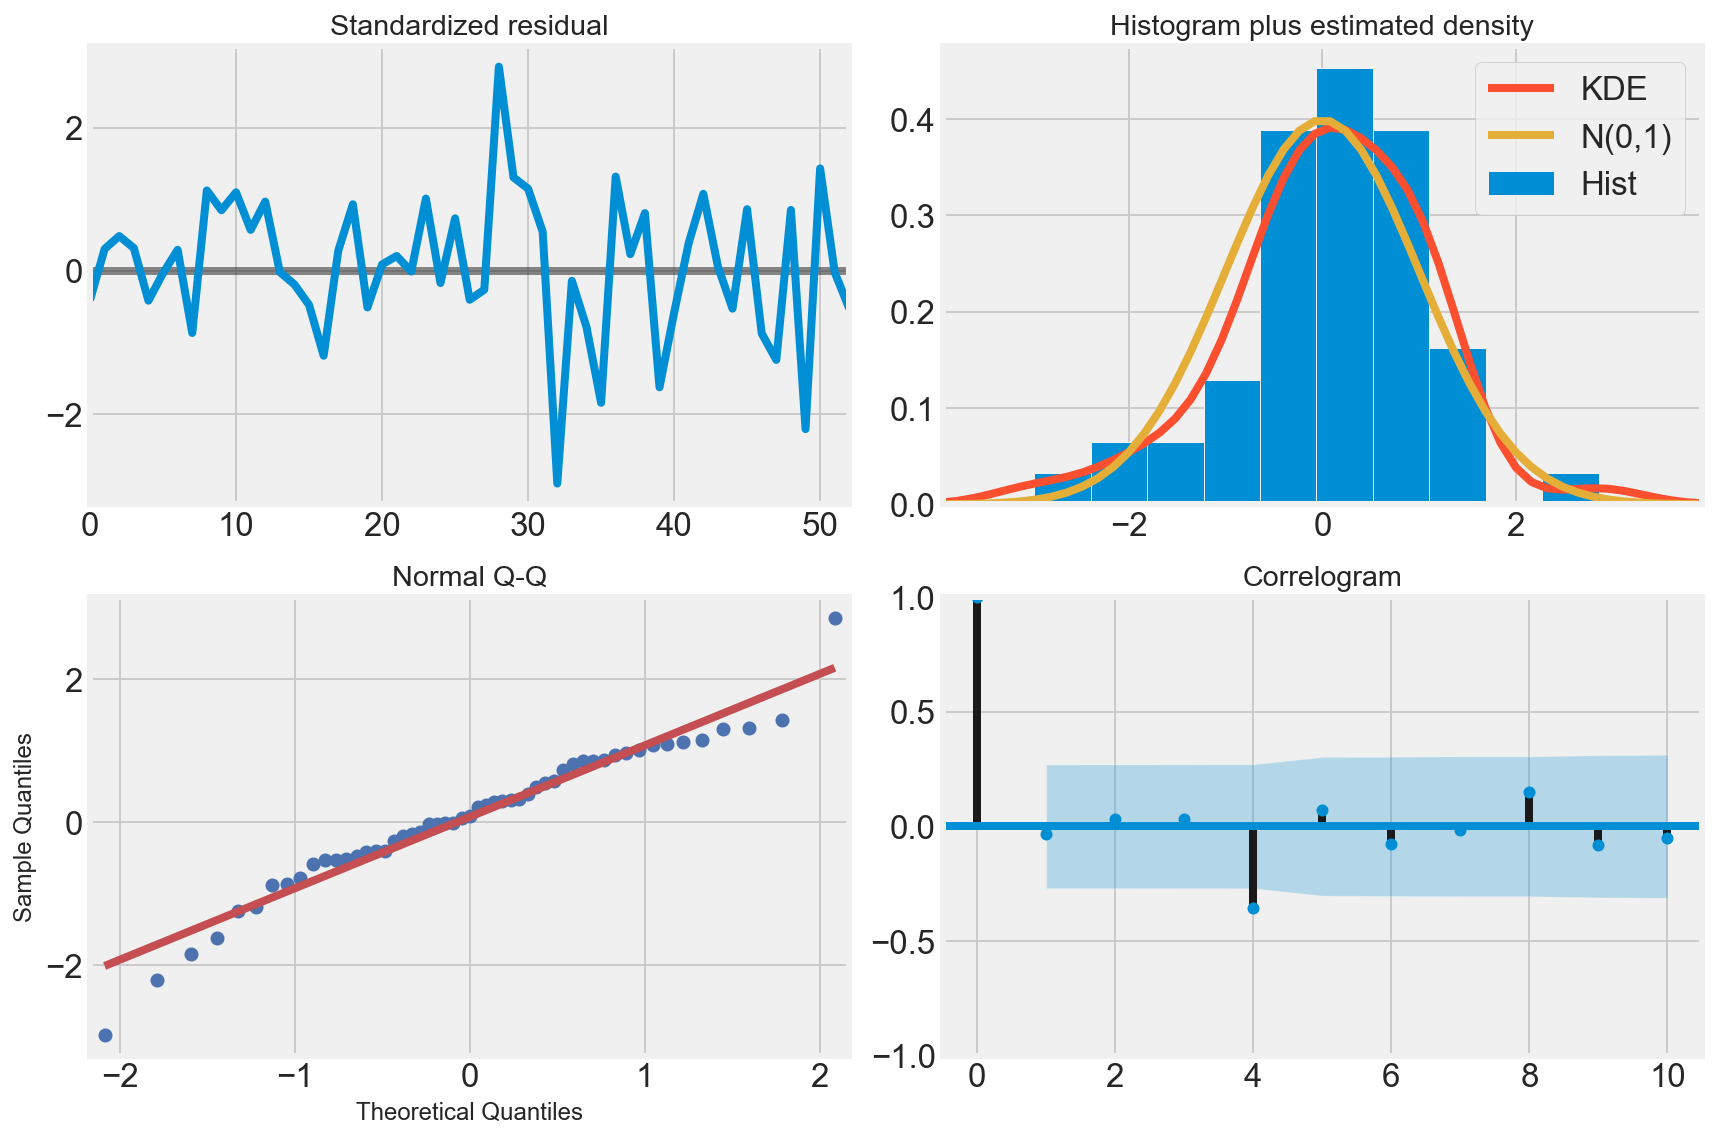



 Model parameters [2. 0. 0. 1.]


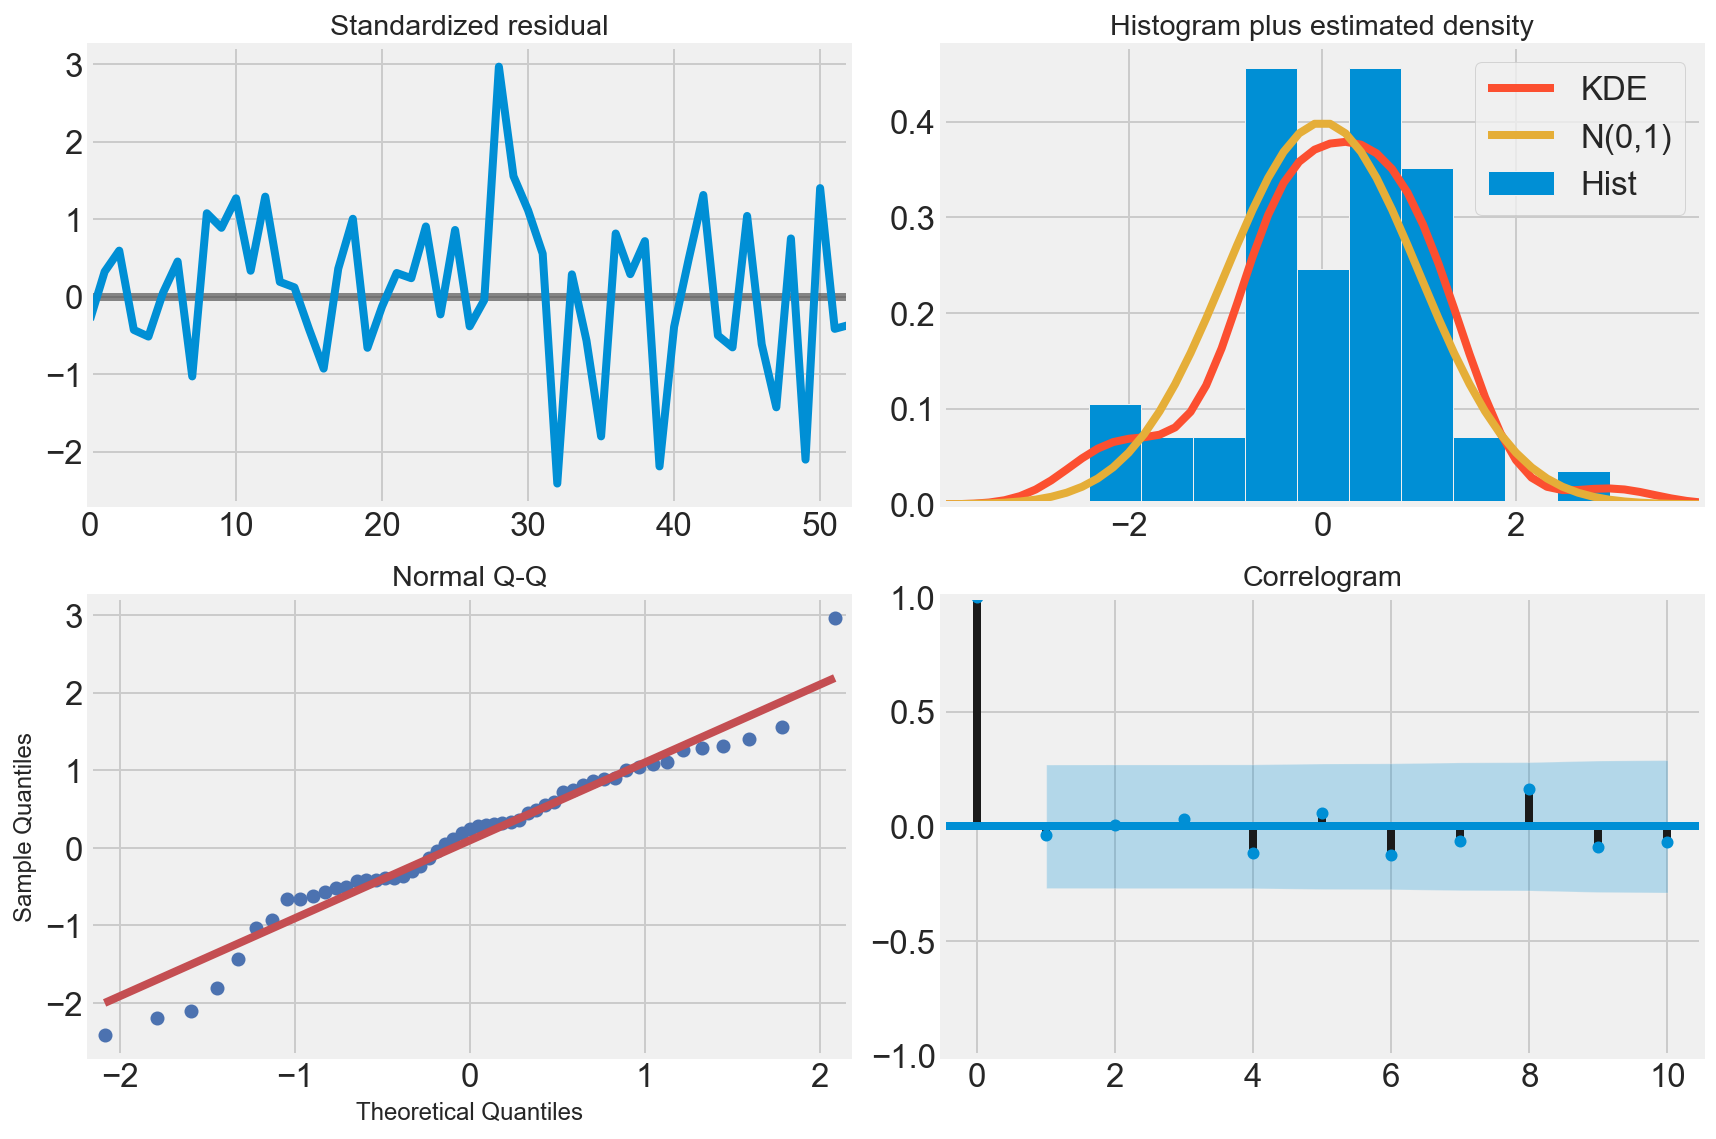



 Model parameters [2. 0. 1. 0.]


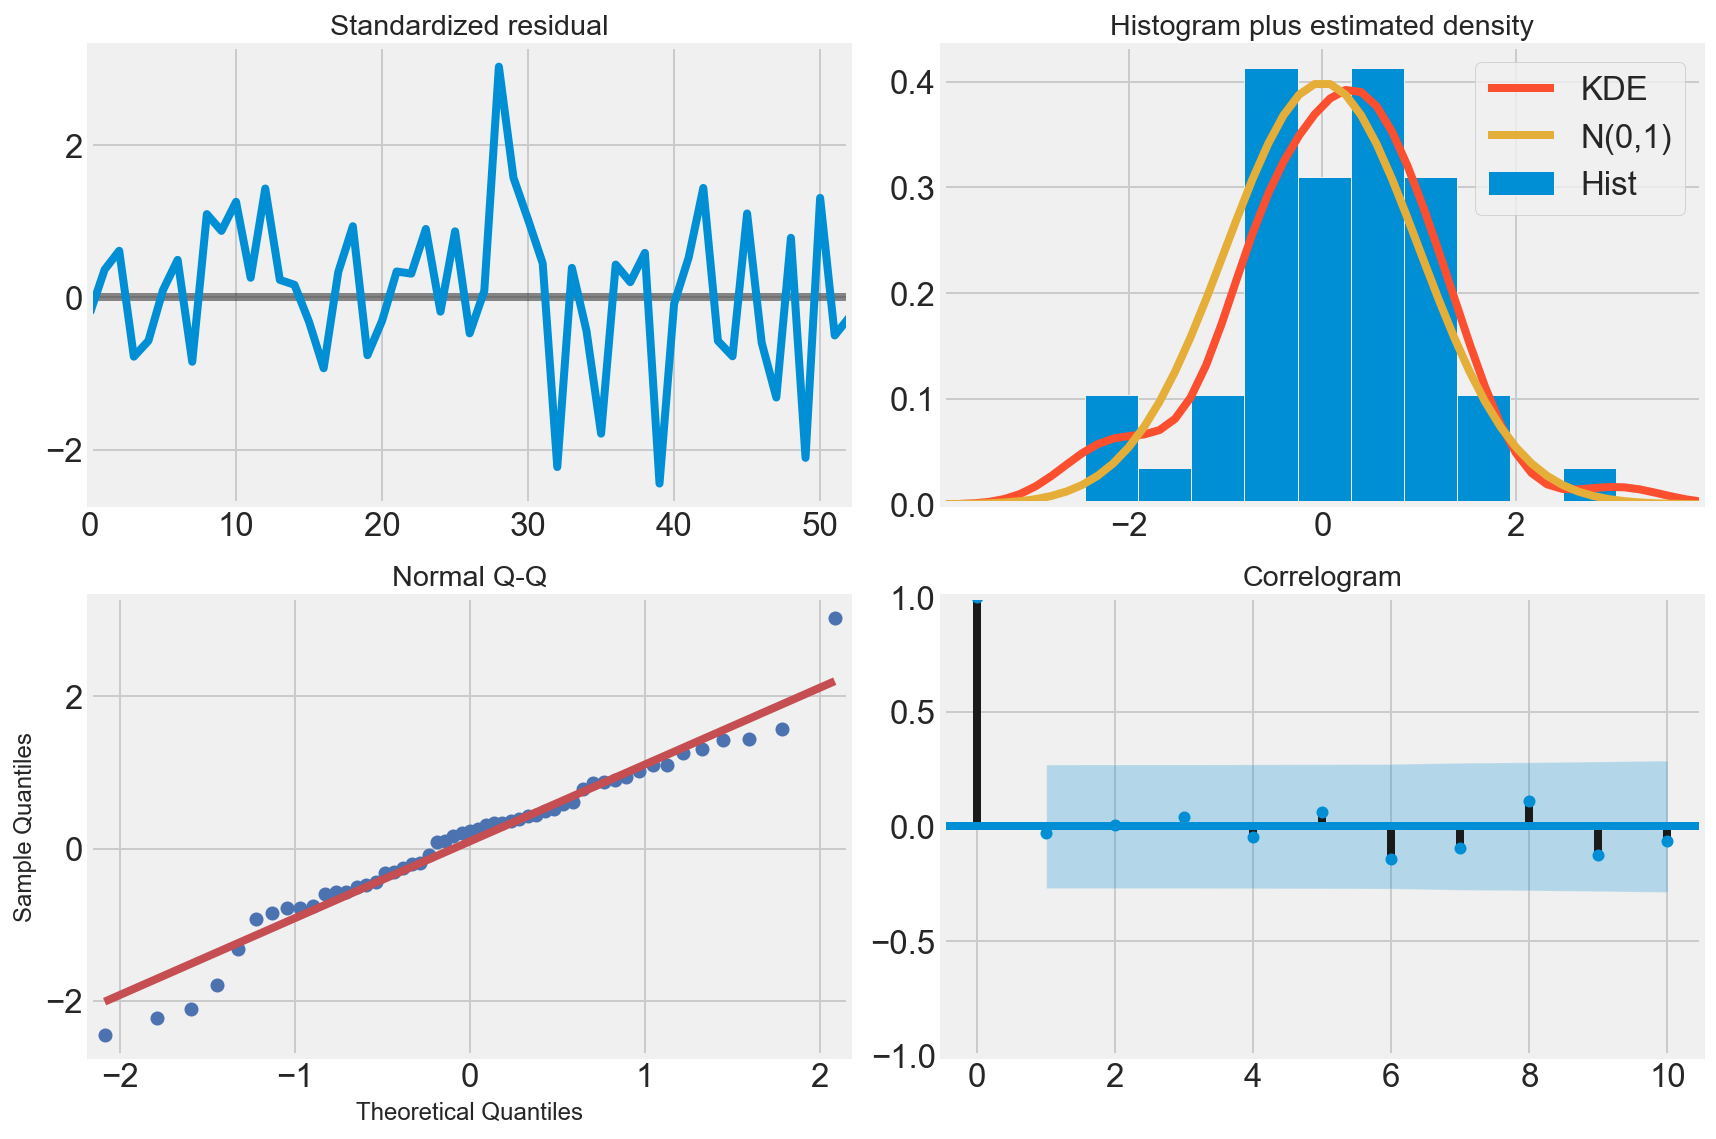



 Model parameters [2. 0. 1. 1.]


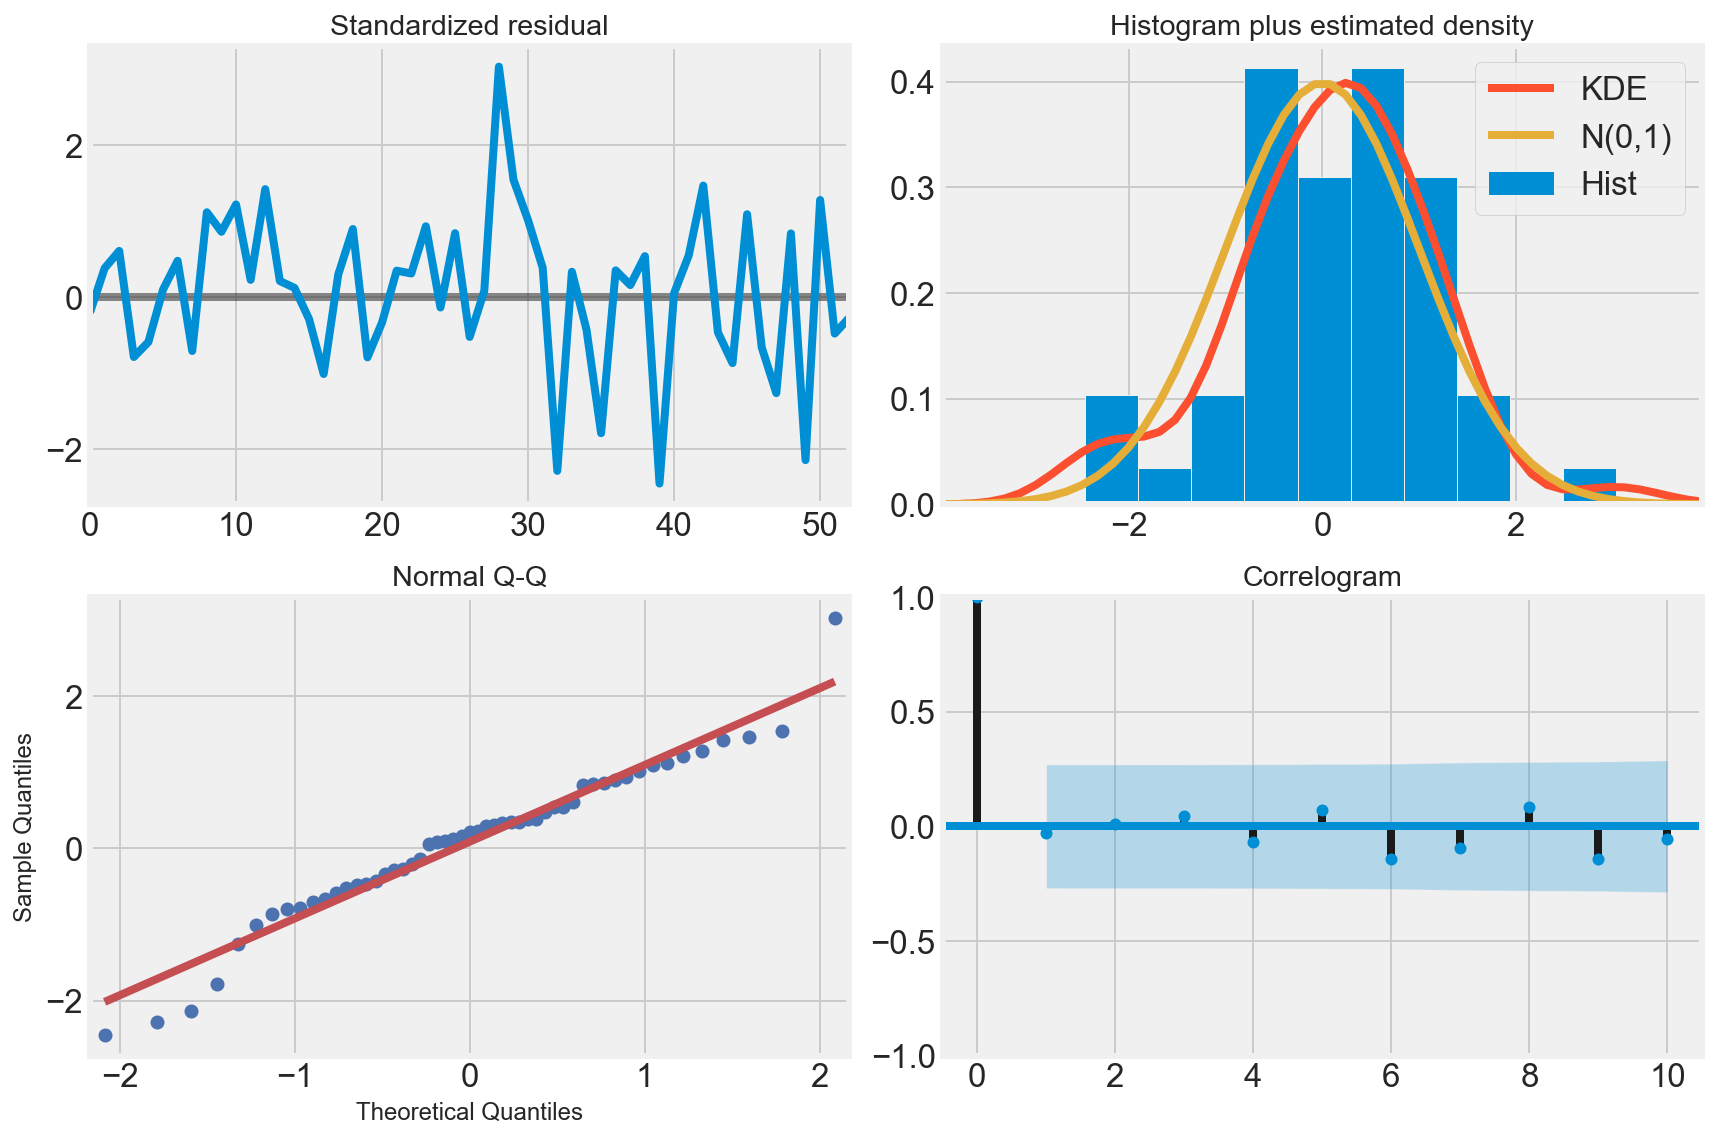



 Model parameters [2. 0. 2. 0.]


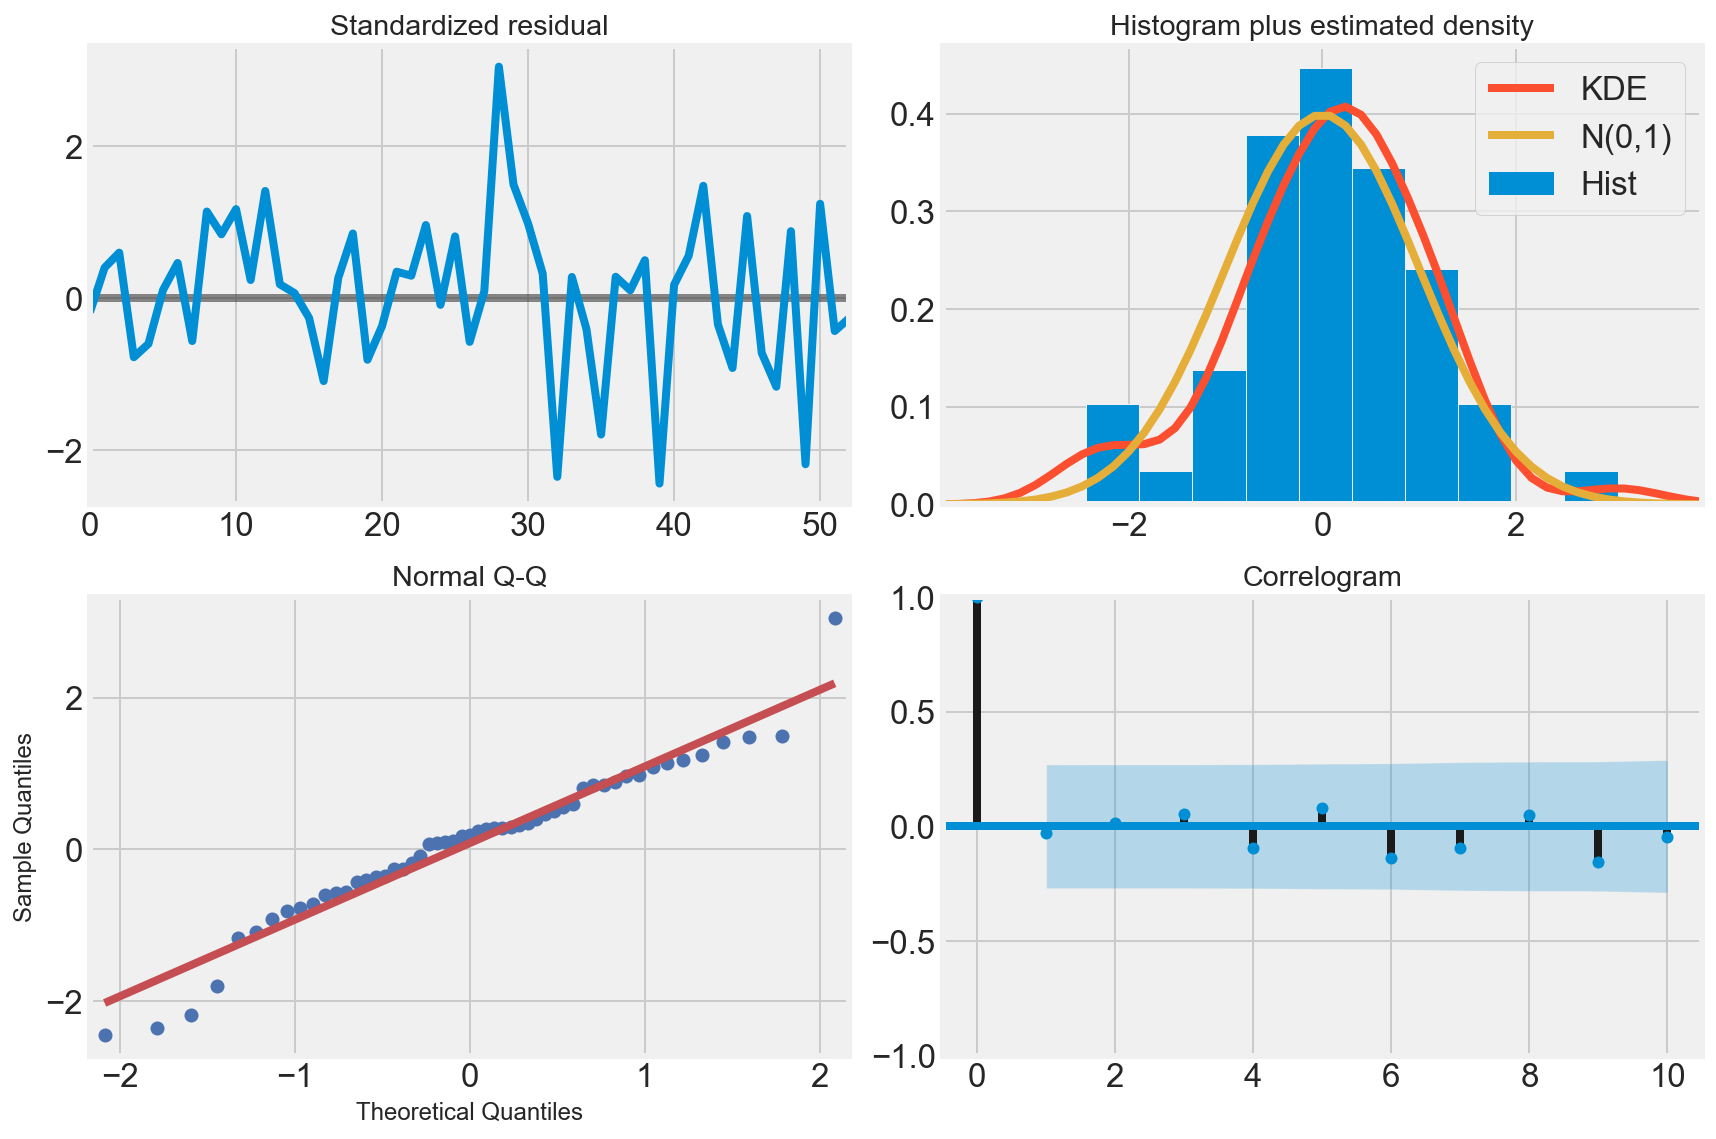



 Model parameters [2. 0. 2. 1.]


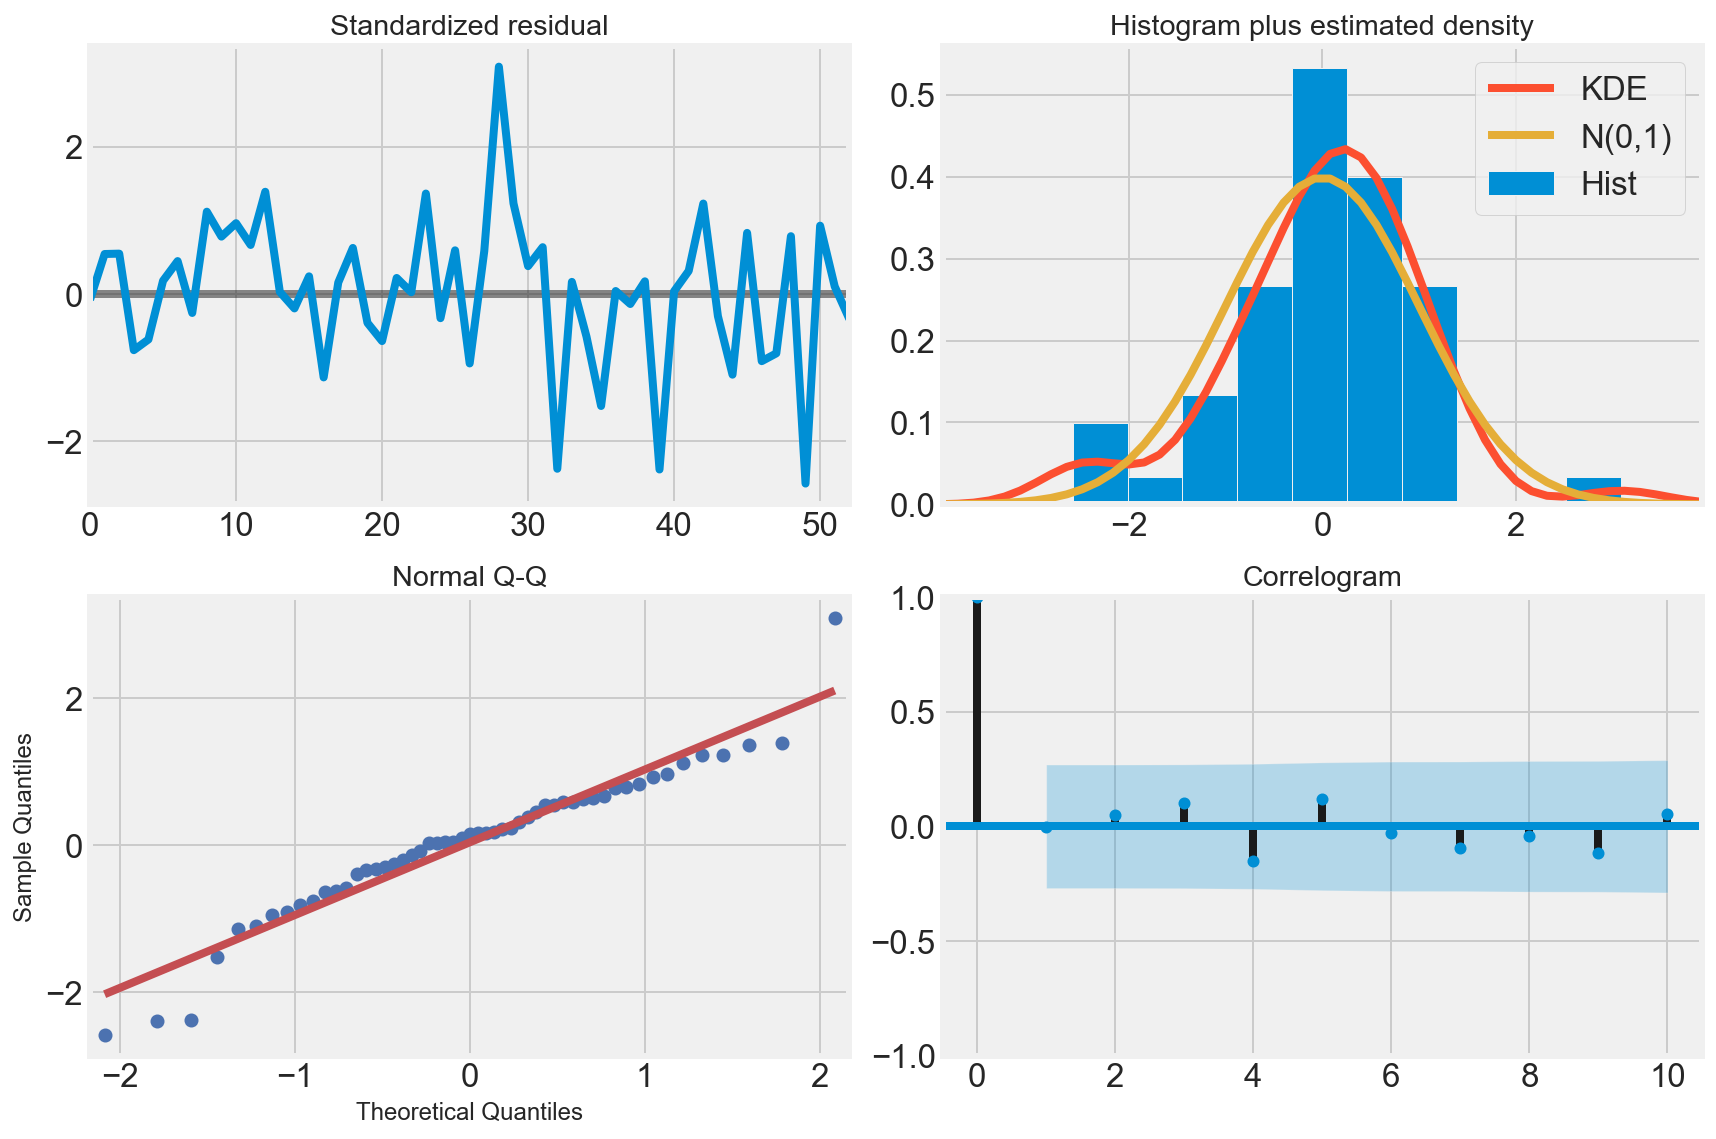

In [33]:
for i in range(len(results)): 
    print("\n\n Model parameters {}".format(results_scores[i][:4]))
    results[i].plot_diagnostics(figsize=(12,8))
    plt.tight_layout()
    plt.show()

### 9. Obtain fitted values with one-step ahead forecasts, in-sample forecasts and out-of sample forecasts. Compare the forecasts of different models.

In [46]:
forecast = results_.forecast()[0]
forecast

52680.15378413543

In [40]:
# line plot of time series
from pandas import Series

In [75]:
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)


    
# load dataset
series = Series.from_csv('IncomeUK.csv', header=None)
# seasonal difference
X = series.values[1:].astype(float)
differenced = difference(X)

print(differenced)

[  782.   386.   571.  -642.   724.   500.   798.  -503.   512.   506.
   936.  -943.  1107.   858.  1460.  -699.  1575.   814.  1382.  -928.
  1009.   996.  1808. -1213.  1089.  1083.  1797.  -713.   960.  1468.
  1560.  -812.  2366.  1983.  2116.  -579.   897.  2050.  1684. -1447.
  1610.  2078.  2097. -2284.  1406.  2265.  2604. -2295.  1160.  2710.
  2127. -2854.  1615.  1566.  2944. -2968.  1386.]


In [78]:

def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

In [80]:
# fit model
model = ARIMA(differenced, order=(1,0,1))
model_fit = model.fit(disp=0)
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast)
print('Forecast: %f' % forecast)

Forecast: 51556.490990
